<a href="https://colab.research.google.com/github/juxewe/DS_Xenia_Welsch/blob/main/Kopie_von_Metabric_Cancer_Analysis_(8).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/juxewe/DS_Xenia_Welsch/blob/main/Project_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# METABRIC Breast Cancer Analysis

Medical professionals utilize tumor grade alongside other cancer-related variables to formulate treatment plans and, in some instances, to predict prognosis. The prognosis provides an estimation of the expected course of the disease. Factors influencing treatment decisions encompass cancer stage, genetic attributes of the tumor, patient age, and general health status. High-grade cancer, characterized by rapid growth and spread, often requires immediate and more intensive treatment approaches. With our study, we aim to analyze data from the METABRIC (Molecular Taxonomy of Breast Cancer International Consortium) dataset which accounts for most of the influencing factors mentioned above, to predict the survival chances of patients with breast cancer.

The METABRIC dataset is the result of a collaborative large-scale project from Canada and the UK. The researchers compiled a selection of more than 2,500 primary fresh-frozen breast cancer specicms that were clinically annotated, sourced from tumor banks in both, Canada and the UK. The data source allows a long-term follow-up of women and includes information on gene expression, clinical data, and mutations (Curtis et al., 2012). Data was collected between 1977 and 2005 (Mukherjee et al., 2018).

For our analysis, we used the data from semau (2012) and enriched it with information retrieved from the website www.cbioportal.org (Curtis et al., 2012). Our dataset compiles cases of 1,904 women, as we filtered for data containing information on mRNA expression and mutations, and includes 41 variables.



## Table of Contents

- [Data Preparation](#data-preparation)
- [Data Exploration](#data-exploration)
- [Data Pre-Processing](#data-pre-processing)
- [Predictive Modelling](#predictive-modelling)


<hr style="border:2px solid gray"> <!-- Thick horizontal line -->

<a id='data-preparation'></a>
# Data Preparation

This section involves the initial steps in the data analysis process, where raw data is collected, cleaned, and organized to prepare it for further analysis

What we did in this section:
- Importing libraries
- Data collection from various sources
- Cleaning data by handling missing values, duplicates, and outliers

In [ ]:
#Install the xgboost package if required
#!pip install xgboost

In [ ]:
# importing the libraries we need for our work

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.impute import SimpleImputer

from scipy.stats import chi2_contingency
from scipy.stats import randint, uniform
from scipy.stats import uniform

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from xgboost import XGBClassifier
import xgboost

pd.set_option('display.max_columns', None)

In [ ]:
# URL of the CSV file
url = "https://raw.githubusercontent.com/semacu/202101-data-science-python/main/data/metabric_clinical_and_expression_data.csv"
df2_url = "https://raw.githubusercontent.com/Charly257/Group05_Project/main/brca_metabric_clinical_data.csv?token=GHSAT0AAAAAACNJYRQMYQSYLLERAWATAMUCZPYYPVQ"

# Load the dataframe from the URL
metabric = pd.read_csv(url)
df2 = pd.read_csv(df2_url)

# Display the first few rows of the dataframe
# metabric.head(3)
# df2.head(3)

In [ ]:
metabric.columns

Index(['Patient_ID', 'Cohort', 'Age_at_diagnosis', 'Survival_time',
       'Survival_status', 'Vital_status', 'Chemotherapy', 'Radiotherapy',
       'Tumour_size', 'Tumour_stage', 'Neoplasm_histologic_grade',
       'Lymph_nodes_examined_positive', 'Lymph_node_status', 'Cancer_type',
       'ER_status', 'PR_status', 'HER2_status', 'HER2_status_measured_by_SNP6',
       'PAM50', '3-gene_classifier', 'Nottingham_prognostic_index',
       'Cellularity', 'Integrative_cluster', 'Mutation_count', 'ESR1', 'ERBB2',
       'PGR', 'TP53', 'PIK3CA', 'GATA3', 'FOXA1', 'MLPH'],
      dtype='object')

In [ ]:
df2.columns

Index(['Study ID', 'Patient ID', 'Sample ID', 'Age at Diagnosis',
       'Type of Breast Surgery', 'Cancer Type', 'Cancer Type Detailed',
       'Cellularity', 'Chemotherapy', 'Pam50 + Claudin-low subtype', 'Cohort',
       'ER status measured by IHC', 'ER Status', 'Neoplasm Histologic Grade',
       'HER2 status measured by SNP6', 'HER2 Status',
       'Tumor Other Histologic Subtype', 'Hormone Therapy',
       'Inferred Menopausal State', 'Integrative Cluster',
       'Primary Tumor Laterality', 'Lymph nodes examined positive',
       'Mutation Count', 'Nottingham prognostic index', 'Oncotree Code',
       'Overall Survival (Months)', 'Overall Survival Status', 'PR Status',
       'Radio Therapy', 'Relapse Free Status (Months)', 'Relapse Free Status',
       'Number of Samples Per Patient', 'Sample Type', 'Sex',
       '3-Gene classifier subtype', 'TMB (nonsynonymous)', 'Tumor Size',
       'Tumor Stage', 'Patient's Vital Status'],
      dtype='object')

In [ ]:
# drop columns from df2 that are also displayed in metabric

df2=df2.drop(columns={"Study ID", "Age at Diagnosis", "Sample ID", "Cohort", "Cancer Type", "Pam50 + Claudin-low subtype", "Chemotherapy", "ER Status", "Neoplasm Histologic Grade", "HER2 status measured by SNP6", "HER2 Status", "Integrative Cluster", "Cellularity", "Lymph nodes examined positive", "Mutation Count", "Nottingham prognostic index", "Radio Therapy", "3-Gene classifier subtype", "Tumor Size", "Tumor Stage", "Patient's Vital Status", "Overall Survival (Months)", "Overall Survival Status", "PR Status", "ER status measured by IHC"})

In [ ]:
df2=df2.rename(columns={"Patient ID": "Patient_ID"})

In [ ]:
# merge both datasets

df = pd.merge(metabric, df2, on='Patient_ID')

In [ ]:
df.columns=df.columns.str.replace(" ", "_")
df=df.rename(columns={"3-gene_classifier": "Three_gene_classifier", "TMB_(nonsynonymous)": "TMB_nonsynonymous", "Relapse_Free_Status_(Months)": "Replapse_Free_Status_Months"})


In [ ]:
df.head(1)

Patient_ID  Cohort  Age_at_diagnosis  Survival_time Survival_status  \
0    MB-0000       1             75.65          140.5          LIVING   

  Vital_status Chemotherapy Radiotherapy  Tumour_size  Tumour_stage  \
0       Living           NO          YES         22.0           2.0   

   Neoplasm_histologic_grade  Lymph_nodes_examined_positive  \
0                        3.0                             10   

   Lymph_node_status                       Cancer_type ER_status PR_status  \
0                  3  Breast Invasive Ductal Carcinoma  Positive  Negative   

  HER2_status HER2_status_measured_by_SNP6        PAM50 Three_gene_classifier  \
0    Negative                      NEUTRAL  claudin-low             ER-/HER2-   

   Nottingham_prognostic_index Cellularity Integrative_cluster  \
0                        6.044         NaN                4ER+   

   Mutation_count      ESR1     ERBB2       PGR      TP53    PIK3CA     GATA3  \
0             NaN  8.929817  9.333972  5.680501  6.338739  5.704157  6.932146   

      FOXA1      MLPH Type_of_Breast_Surgery  \
0  7.953794  9.729728             MASTECTOMY   

               Cancer_Type_Detailed Tumor_Other_Histologic_Subtype  \
0  Breast Invasive Ductal Carcinoma                     Ductal/NST   

  Hormone_Therapy Inferred_Menopausal_State Primary_Tumor_Laterality  \
0             YES                      Post                    Right   

  Oncotree_Code  Replapse_Free_Status_Months Relapse_Free_Status  \
0           IDC                       138.65      0:Not Recurred   

   Number_of_Samples_Per_Patient Sample_Type     Sex  TMB_nonsynonymous  
0                              1     Primary  Female                0.0

In [ ]:
df.columns

Index(['Patient_ID', 'Cohort', 'Age_at_diagnosis', 'Survival_time',
       'Survival_status', 'Vital_status', 'Chemotherapy', 'Radiotherapy',
       'Tumour_size', 'Tumour_stage', 'Neoplasm_histologic_grade',
       'Lymph_nodes_examined_positive', 'Lymph_node_status', 'Cancer_type',
       'ER_status', 'PR_status', 'HER2_status', 'HER2_status_measured_by_SNP6',
       'PAM50', 'Three_gene_classifier', 'Nottingham_prognostic_index',
       'Cellularity', 'Integrative_cluster', 'Mutation_count', 'ESR1', 'ERBB2',
       'PGR', 'TP53', 'PIK3CA', 'GATA3', 'FOXA1', 'MLPH',
       'Type_of_Breast_Surgery', 'Cancer_Type_Detailed',
       'Tumor_Other_Histologic_Subtype', 'Hormone_Therapy',
       'Inferred_Menopausal_State', 'Primary_Tumor_Laterality',
       'Oncotree_Code', 'Replapse_Free_Status_Months', 'Relapse_Free_Status',
       'Number_of_Samples_Per_Patient', 'Sample_Type', 'Sex',
       'TMB_nonsynonymous'],
      dtype='object')

In [ ]:
# Displaying the catagorical variables and their unique values

print("Categories of cohorts=", df.Cohort.unique())
print("Categories of survival status=", df.Survival_status.unique())
print("Categories of vital status", df.Vital_status.unique())
print("Categories of chemotherapy", df.Chemotherapy.unique())
print("Categories of radiotherapy", df.Radiotherapy.unique())
print("Categories of tumour stage", df.Tumour_stage.unique())
print("Categories of neoplasm histologic grade", df.Neoplasm_histologic_grade.unique())
print("Categories of lymph node status", df.Lymph_node_status.unique())
print("Categories of cancer type", df.Cancer_type.unique())
print("Categories of ER status", df.ER_status.unique())
print("Categories of PR status", df.PR_status.unique())
print("Categories of HER2 status", df.HER2_status.unique())
print("Categories of HER2 status 2", df.HER2_status_measured_by_SNP6.unique())
print("Categories of PAM50", df.PAM50.unique())
print("Categories of cellularity", df.Cellularity.unique())
print("Categories of integrative cluster", df.Integrative_cluster.unique())
print("Categories of type of breast surgery", df.Type_of_Breast_Surgery.unique())
print("Categories of type of cancer type detailed", df.Cancer_Type_Detailed.unique())
print("Categories of tumor other histologic subtype", df.Tumor_Other_Histologic_Subtype.unique())
print("Categories of hormonetherapy", df.Hormone_Therapy.unique())
print("Categories of inferred menopausal state", df.Inferred_Menopausal_State.unique())
print("Categories of primary tumor laterality", df.Primary_Tumor_Laterality.unique())
print("Categories of oncotree code", df.Oncotree_Code.unique())
print("Categories of relapse free status", df.Relapse_Free_Status.unique())
print("Categories of number of samples per patient", df.Number_of_Samples_Per_Patient.unique())
print("Categories of sample type", df.Sample_Type.unique())
print("Categories of sex", df.Sex.unique())
print("Categories of TMB nonsynonymous", df.TMB_nonsynonymous.unique())
print("Categories of 3-gene classifier", df.Three_gene_classifier.unique())

Categories of cohorts= [1 2 3 5 4]
Categories of survival status= ['LIVING' 'DECEASED']
Categories of vital status ['Living' 'Died of Disease' 'Died of Other Causes' nan]
Categories of chemotherapy ['NO' 'YES']
Categories of radiotherapy ['YES' 'NO']
Categories of tumour stage [ 2.  1.  4.  3. nan  0.]
Categories of neoplasm histologic grade [ 3.  2.  1. nan]
Categories of lymph node status [3 1 2]
Categories of cancer type ['Breast Invasive Ductal Carcinoma'
 'Breast Mixed Ductal and Lobular Carcinoma'
 'Breast Invasive Lobular Carcinoma'
 'Breast Invasive Mixed Mucinous Carcinoma' 'Breast' nan
 'Metaplastic Breast Cancer']
Categories of ER status ['Positive' 'Negative']
Categories of PR status ['Negative' 'Positive']
Categories of HER2 status ['Negative' 'Positive']
Categories of HER2 status 2 ['NEUTRAL' 'LOSS' 'GAIN' 'UNDEF']
Categories of PAM50 ['claudin-low' 'LumA' 'LumB' 'Her2' 'Normal' 'Basal' 'NC']
Categories of cellularity [nan 'High' 'Moderate' 'Low']
Categories of integrativ

In [ ]:
# Drop redundant columns (containing only one value: sex, number of samples per patient and sample type; cancer type measures the same as cancer type detailed but contains nan)

df = df.drop(columns={"Cancer_type", "Sex", "Sample_Type", "Number_of_Samples_Per_Patient"})

In [ ]:
# Display the dimensions of the dataframe

print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])

Number of rows: 1904
Number of columns: 41


### Checking for missing values

Check for missing values and handle them appropriately (e.g., imputation, removal).

In [ ]:
# Check for missing values
df.isnull().sum()

Patient_ID                          0
Cohort                              0
Age_at_diagnosis                    0
Survival_time                       0
Survival_status                     0
Vital_status                        1
Chemotherapy                        0
Radiotherapy                        0
Tumour_size                        20
Tumour_stage                      501
Neoplasm_histologic_grade          72
Lymph_nodes_examined_positive       0
Lymph_node_status                   0
ER_status                           0
PR_status                           0
HER2_status                         0
HER2_status_measured_by_SNP6        0
PAM50                               0
Three_gene_classifier             204
Nottingham_prognostic_index         0
Cellularity                        54
Integrative_cluster                 0
Mutation_count                     45
ESR1                                0
ERBB2                               0
PGR                                 0
TP53        

In [ ]:
# Drop column "Three_gene_classfier" due to high number of missing values and few added information as covered by other variables (i.e., HER2_status and ER_status)

df=df.drop(columns=("Three_gene_classifier"))

In [ ]:
df_cleaned = df.copy()

# Handle missing values for numerical features
numerical_features = ['Tumour_size', 'Mutation_count']
for feature in numerical_features:
    df_cleaned[feature].fillna(df_cleaned[feature].median(), inplace=True)

# Handle missing values for ordinal features
ordinal_features = ['Neoplasm_histologic_grade']
for feature in ordinal_features:
    df_cleaned[feature].fillna(df_cleaned[feature].median(), inplace=True)

# Handle missing values for nominal features
nominal_features = ['Vital_status', 'Cellularity', "Primary_Tumor_Laterality", "Tumor_Other_Histologic_Subtype", "Type_of_Breast_Surgery", "Relapse_Free_Status"]
for feature in nominal_features:
    df_cleaned[feature].fillna('Unknown', inplace=True)


# Handle missing values for Tumour Stage by calculation (using formula for Nottingham prognostic index with no missing values: NPI= (0.2*Tumour Size)+Tumour Stage+Lymph Node Status)
df_cleaned["Tumour_stage"].fillna((df_cleaned["Nottingham_prognostic_index"]-df_cleaned["Lymph_node_status"]-(0.2*(df_cleaned["Tumour_size"]/100))),inplace=True)

# Check if there are any missing values left
if df_cleaned.isnull().sum().any():
    print("There are still missing values in the cleaned dataframe.")
else:
    print("All missing values have been handled.")

# Display the first few rows of the cleaned dataframe
df_cleaned.head()

All missing values have been handled.


Patient_ID  Cohort  Age_at_diagnosis  Survival_time Survival_status  \
0    MB-0000       1             75.65     140.500000          LIVING   
1    MB-0002       1             43.19      84.633333          LIVING   
2    MB-0005       1             48.87     163.700000        DECEASED   
3    MB-0006       1             47.68     164.933333          LIVING   
4    MB-0008       1             76.97      41.366667        DECEASED   

      Vital_status Chemotherapy Radiotherapy  Tumour_size  Tumour_stage  \
0           Living           NO          YES         22.0           2.0   
1           Living           NO          YES         10.0           1.0   
2  Died of Disease          YES           NO         15.0           2.0   
3           Living          YES          YES         25.0           2.0   
4  Died of Disease          YES          YES         40.0           2.0   

   Neoplasm_histologic_grade  Lymph_nodes_examined_positive  \
0                        3.0                             10   
1                        3.0                              0   
2                        2.0                              1   
3                        2.0                              3   
4                        3.0                              8   

   Lymph_node_status ER_status PR_status HER2_status  \
0                  3  Positive  Negative    Negative   
1                  1  Positive  Positive    Negative   
2                  2  Positive  Positive    Negative   
3                  2  Positive  Positive    Negative   
4                  3  Positive  Positive    Negative   

  HER2_status_measured_by_SNP6        PAM50  Nottingham_prognostic_index  \
0                      NEUTRAL  claudin-low                        6.044   
1                      NEUTRAL         LumA                        4.020   
2                      NEUTRAL         LumB                        4.030   
3                      NEUTRAL         LumB                        4.050   
4                      NEUTRAL         LumB                        6.080   

  Cellularity Integrative_cluster  Mutation_count       ESR1      ERBB2  \
0     Unknown                4ER+             5.0   8.929817   9.333972   
1        High                4ER+             2.0  10.047059   9.729606   
2        High                   3             2.0  10.041281   9.725825   
3    Moderate                   9             1.0  10.404685  10.334979   
4        High                   9             2.0  11.276581   9.956267   

        PGR      TP53    PIK3CA      GATA3      FOXA1       MLPH  \
0  5.680501  6.338739  5.704157   6.932146   7.953794   9.729728   
1  7.505424  6.192507  5.757727  11.251197  11.843989  12.536570   
2  7.376123  6.404516  6.751566   9.289758  11.698169  10.306115   
3  6.815637  6.869241  7.219187   8.667723  11.863379  10.472181   
4  7.331223  6.337951  5.817818   9.719781  11.625006  12.161961   

  Type_of_Breast_Surgery                       Cancer_Type_Detailed  \
0             MASTECTOMY           Breast Invasive Ductal Carcinoma   
1      BREAST CONSERVING           Breast Invasive Ductal Carcinoma   
2             MASTECTOMY           Breast Invasive Ductal Carcinoma   
3             MASTECTOMY  Breast Mixed Ductal and Lobular Carcinoma   
4             MASTECTOMY  Breast Mixed Ductal and Lobular Carcinoma   

  Tumor_Other_Histologic_Subtype Hormone_Therapy Inferred_Menopausal_State  \
0                     Ductal/NST             YES                      Post   
1                     Ductal/NST             YES                       Pre   
2                     Ductal/NST             YES                       Pre   
3                          Mixed             YES                       Pre   
4                          Mixed             YES                      Post   

  Primary_Tumor_Laterality Oncotree_Code  Replapse_Free_Status_Months  \
0                    Right           IDC                       138.65   
1                    Right           

In [ ]:
# Round the calculated tumour stage to no decimal place as the original tumour stage doesn't have any as well

df_cleaned["Tumour_stage"] = df_cleaned["Tumour_stage"].round(0)

In [ ]:
#df_cleaned.isnull().sum()

<hr style="border:2px solid gray"> <!-- Thick horizontal line -->


<a id='data-exploration'></a>
# Data Exploration


In this section, we focus on collectively examining and understanding the characteristics of our dataset through visualization and statistical analysis. Our goal is to gain insights into the underlying patterns, distributions, and relationships within the data, which can guide our subsequent analysis and modeling decisions.

We start by visualizing the data using techniques such as **histograms, scatter plots, and box plots** to **understand the distributions of individual variables and explore potential correlations between them**. Through these visualizations, we collectively identify any outliers, anomalies, or interesting patterns that may exist in the dataset. Additionally, we calculate descriptive statistics such as **mean, median, standard deviation, and quartiles** to **summarize the central tendencies and variability of our data.** These statistics provide us with a quantitative understanding of the dataset's characteristics and help us identify any potential issues or areas of interest. Furthermore, we perform **exploratory data analysis (EDA)** to **investigate specific aspects of the data relevant to our analysis goals. This may involve examining relationships between variables, identifying trends over time or across different groups, and exploring the impact of various factors on the target variable.**

Overall, the "Data Exploration" section serves as a crucial step in our analysis process, allowing us to collectively gain a deeper understanding of the dataset and uncover valuable insights that inform our subsequent modeling and decision-making processes

### Descriptive Statistics

In [ ]:
# Summary statistics for numerical variables
summary_stats = df_cleaned.describe()
print(summary_stats)

            Cohort  Age_at_diagnosis  Survival_time  Tumour_size  \
count  1904.000000       1904.000000    1904.000000  1904.000000   
mean      2.643908         61.087054     125.121324    26.204706   
std       1.228615         12.978711      76.334148    15.084713   
min       1.000000         21.930000       0.000000     1.000000   
25%       1.000000         51.375000      60.825000    17.000000   
50%       3.000000         61.770000     115.616667    23.000000   
75%       3.000000         70.592500     184.716667    30.000000   
max       5.000000         96.290000     355.200000   182.000000   

       Tumour_stage  Neoplasm_histologic_grade  Lymph_nodes_examined_positive  \
count   1904.000000                1904.000000                    1904.000000   
mean       1.883403                   2.438025                       2.002101   
std        0.717661                   0.647842                       4.079993   
min        0.000000                   1.000000                 

Exploring the distribution of numerical variables using histograms, box plots, etc.

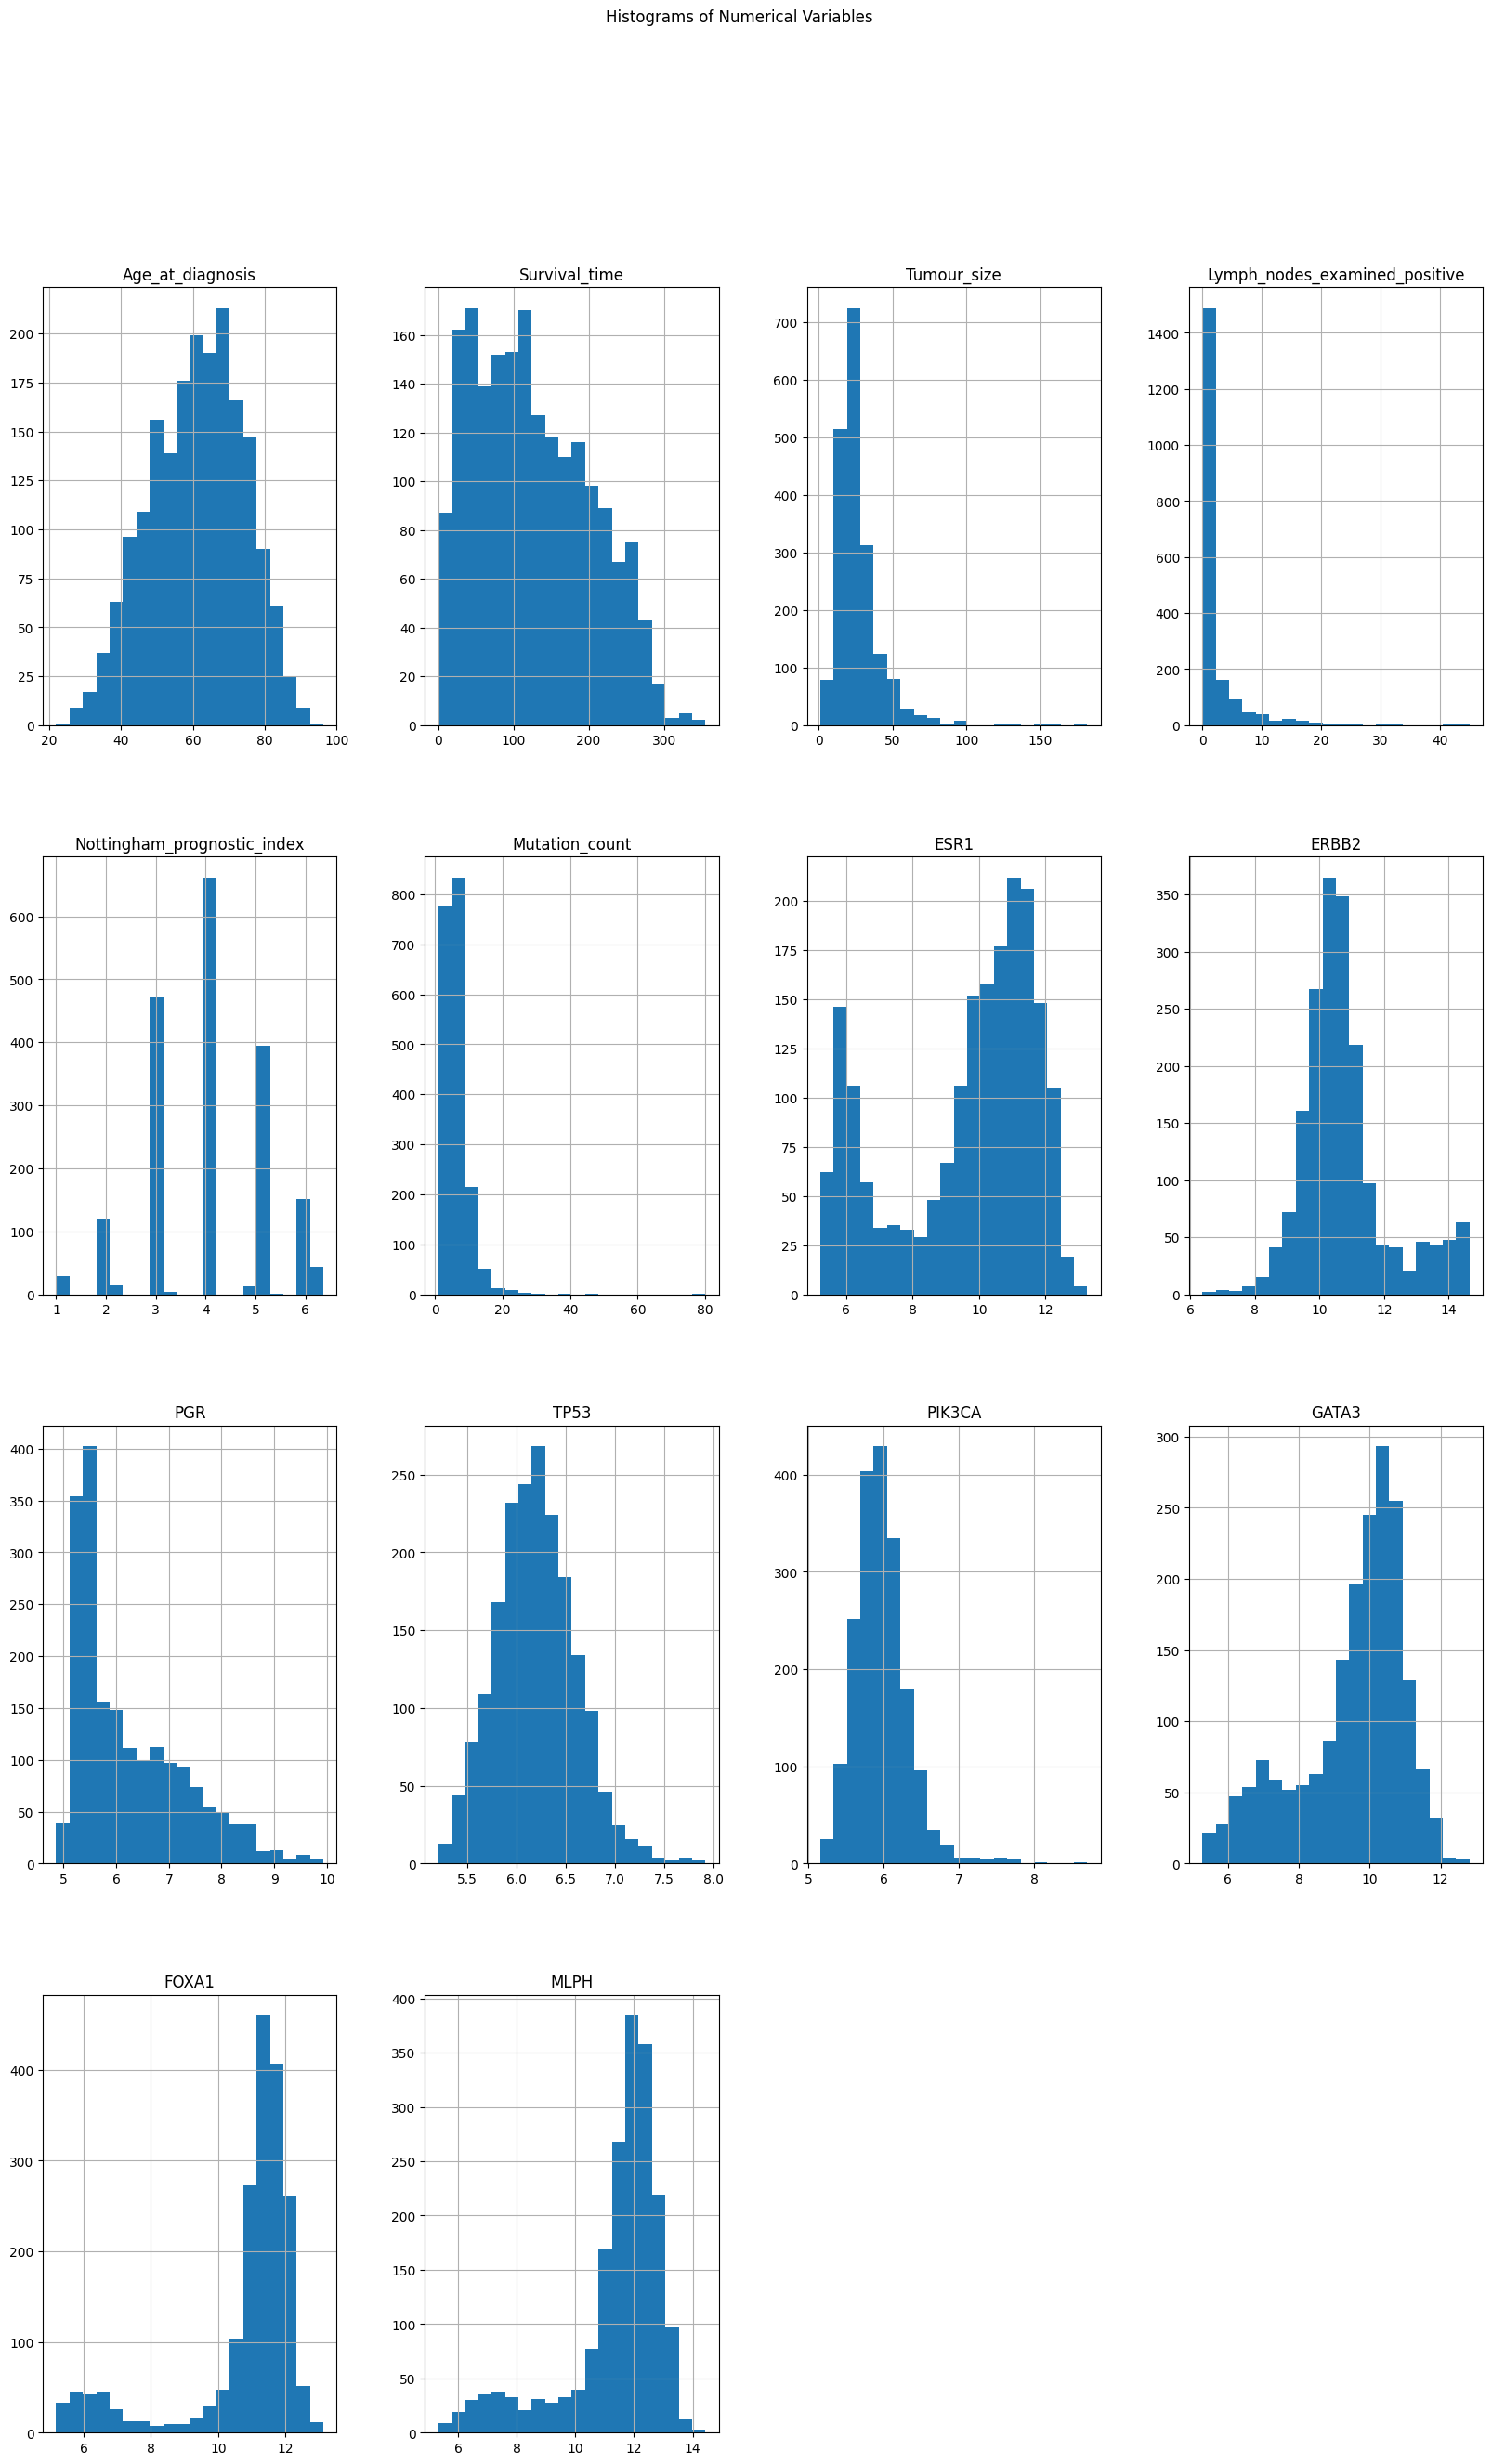

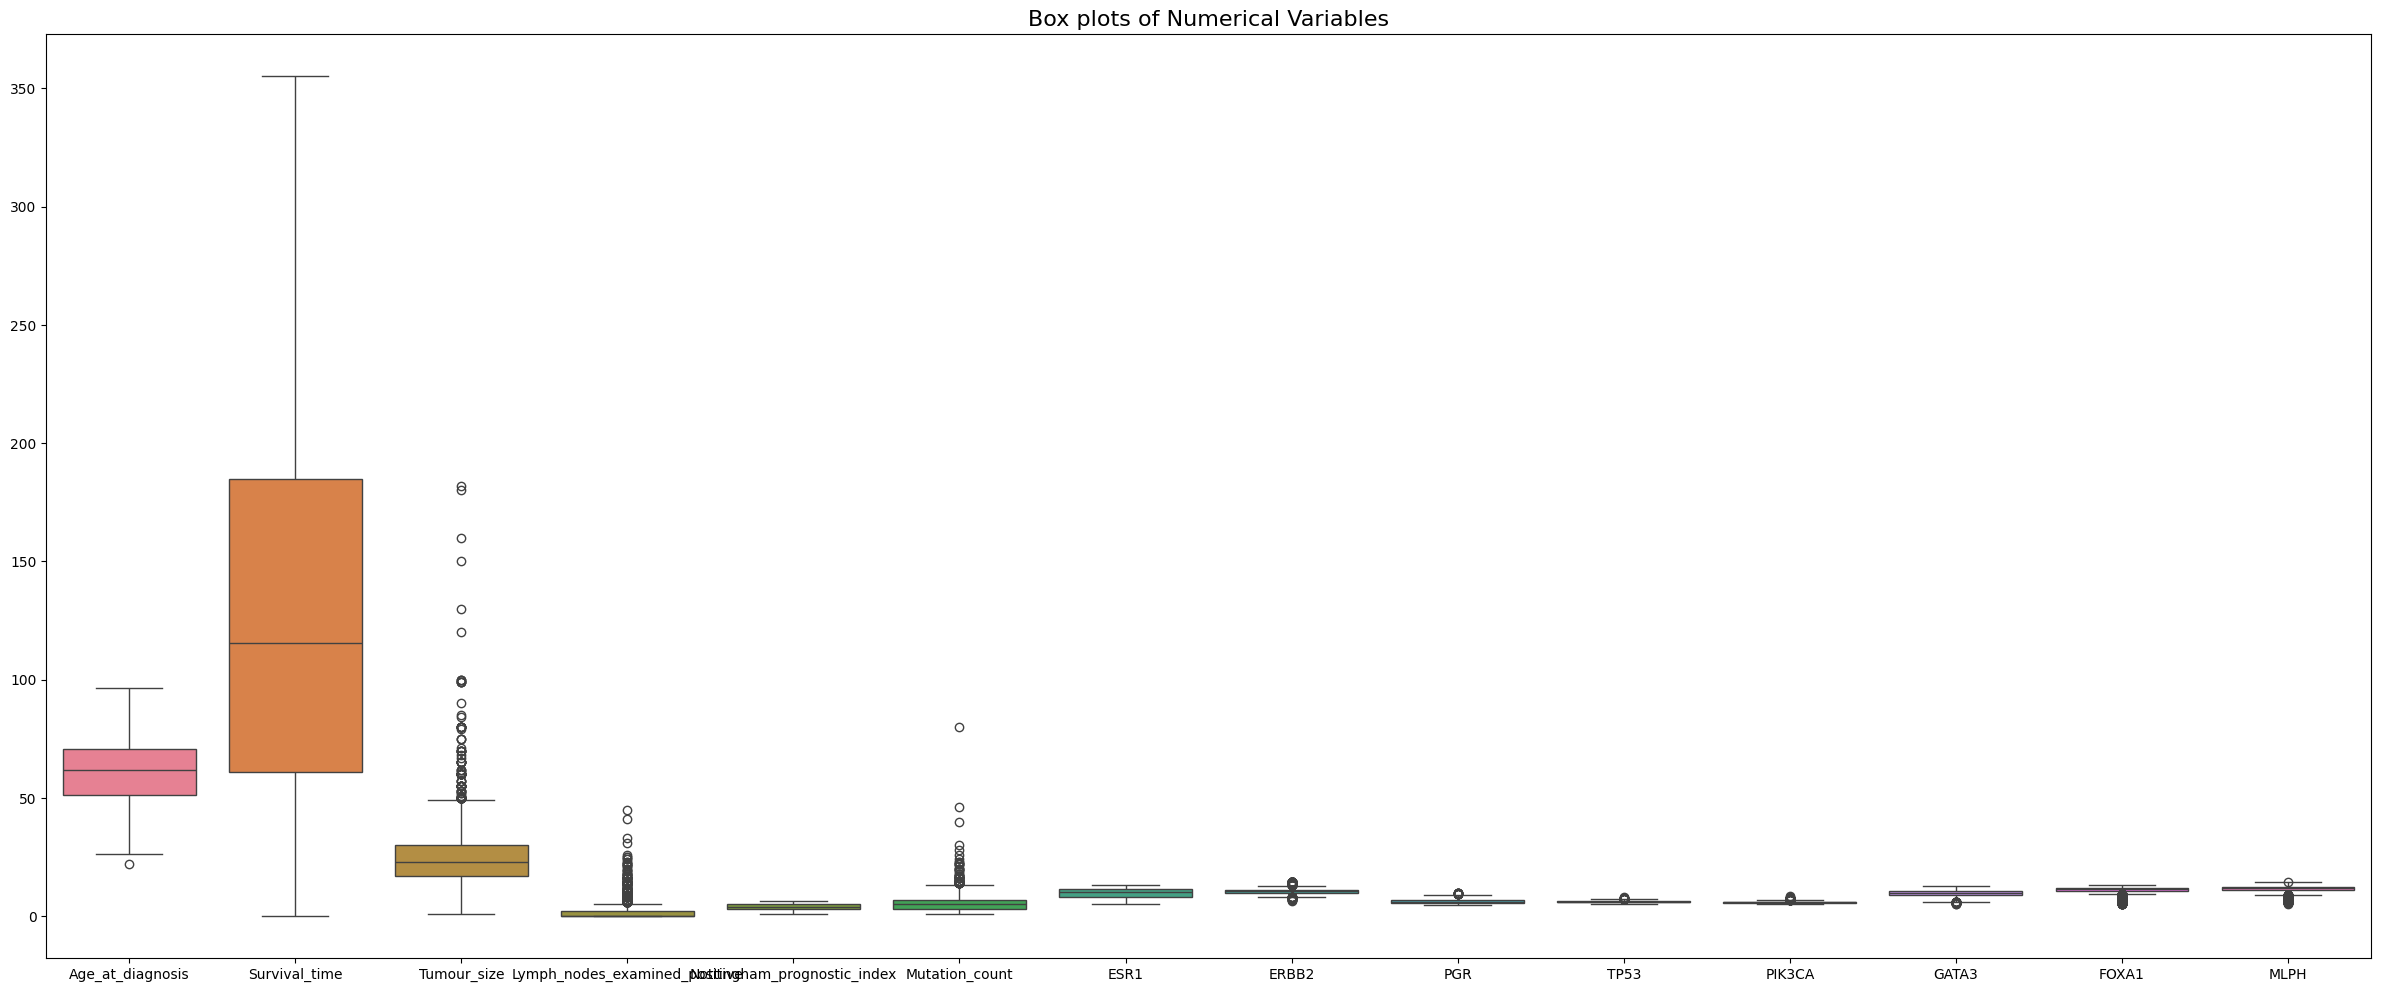

In [ ]:
# Plot histograms for numerical variables
numerical_vars = ['Age_at_diagnosis', 'Survival_time', 'Tumour_size', 'Lymph_nodes_examined_positive', 'Nottingham_prognostic_index', 'Mutation_count', 'ESR1', 'ERBB2', 'PGR', 'TP53', 'PIK3CA', 'GATA3', 'FOXA1', 'MLPH']
df_cleaned[numerical_vars].hist(bins=20, figsize=(20, 30))
plt.suptitle("Histograms of Numerical Variables", fontsize=12)
plt.show()

# Plot box plots for numerical variables
plt.figure(figsize=(30, 12))
sns.boxplot(data=df_cleaned[numerical_vars])
plt.title("Box plots of Numerical Variables", fontsize=16)
plt.show()

The women represented in the dataset are predominantly older, with an average age of 61.1 years. Only a quarter of the patients are younger than or equal to 51.4 years old. The youngest patient recorded was 21 years old, while the eldest was 96.3 years old. The youngest patient is an outlier.
On average, patients survived approximately 10.4 years (median: 9.6 years), with only a minority surpassing 15.4 years. The histogram depicting the prognosis (in months) of women with breast cancer reveals a right-skewed distribution, indicating comparatively poorer outcomes.
The age, the gene expression of the gene TP53, and the Nottingham prognostic index are the only variables that are normally distributed. All other variables show either more complex distributions (esp. the gene expressions) or are, just as the survival time, right-skewed.
Besides the gene expressions, tumor size, the number of lymph nodes examined positive and the mutation count have many outliers in the upper ranges. It can be expected that these patients have a rather bad prognosis.

Analyze categorical variables by calculating frequencies and percentages for each category.

In [ ]:
# List of categorical variables
categorical_vars = ['Vital_status', 'Chemotherapy', 'Radiotherapy', 'Type_of_Breast_Surgery', 'Hormone_Therapy', 'Tumour_stage', 'Neoplasm_histologic_grade',
                    'Lymph_node_status', 'Cancer_Type_Detailed', 'ER_status', 'PR_status', 'HER2_status', 'HER2_status_measured_by_SNP6',
                   'PAM50', 'Cellularity', 'Integrative_cluster', 'Tumor_Other_Histologic_Subtype', 'Inferred_Menopausal_State', 'Primary_Tumor_Laterality', 'Oncotree_Code', 'Relapse_Free_Status']

# Calculate frequencies and percentages for each category
for var in categorical_vars:
    print("Variable:", var)
    print(df_cleaned[var].value_counts(normalize=True) * 100)
    print()

Variable: Vital_status
Living                  42.069328
Died of Disease         32.668067
Died of Other Causes    25.210084
Unknown                  0.052521
Name: Vital_status, dtype: float64

Variable: Chemotherapy
NO     79.201681
YES    20.798319
Name: Chemotherapy, dtype: float64

Variable: Radiotherapy
YES    59.716387
NO     40.283613
Name: Radiotherapy, dtype: float64

Variable: Type_of_Breast_Surgery
MASTECTOMY           59.191176
BREAST CONSERVING    39.653361
Unknown               1.155462
Name: Type_of_Breast_Surgery, dtype: float64

Variable: Hormone_Therapy
YES    61.659664
NO     38.340336
Name: Hormone_Therapy, dtype: float64

Variable: Tumour_stage
2.0    52.836134
1.0    27.731092
3.0    17.542017
0.0     1.313025
4.0     0.577731
Name: Tumour_stage, dtype: float64

Variable: Neoplasm_histologic_grade
3.0    52.468487
2.0    38.865546
1.0     8.665966
Name: Neoplasm_histologic_grade, dtype: float64

Variable: Lymph_node_status
1    52.153361
2    31.722689
3    16.12

Exploring the distribution of categorical variables using bar charts

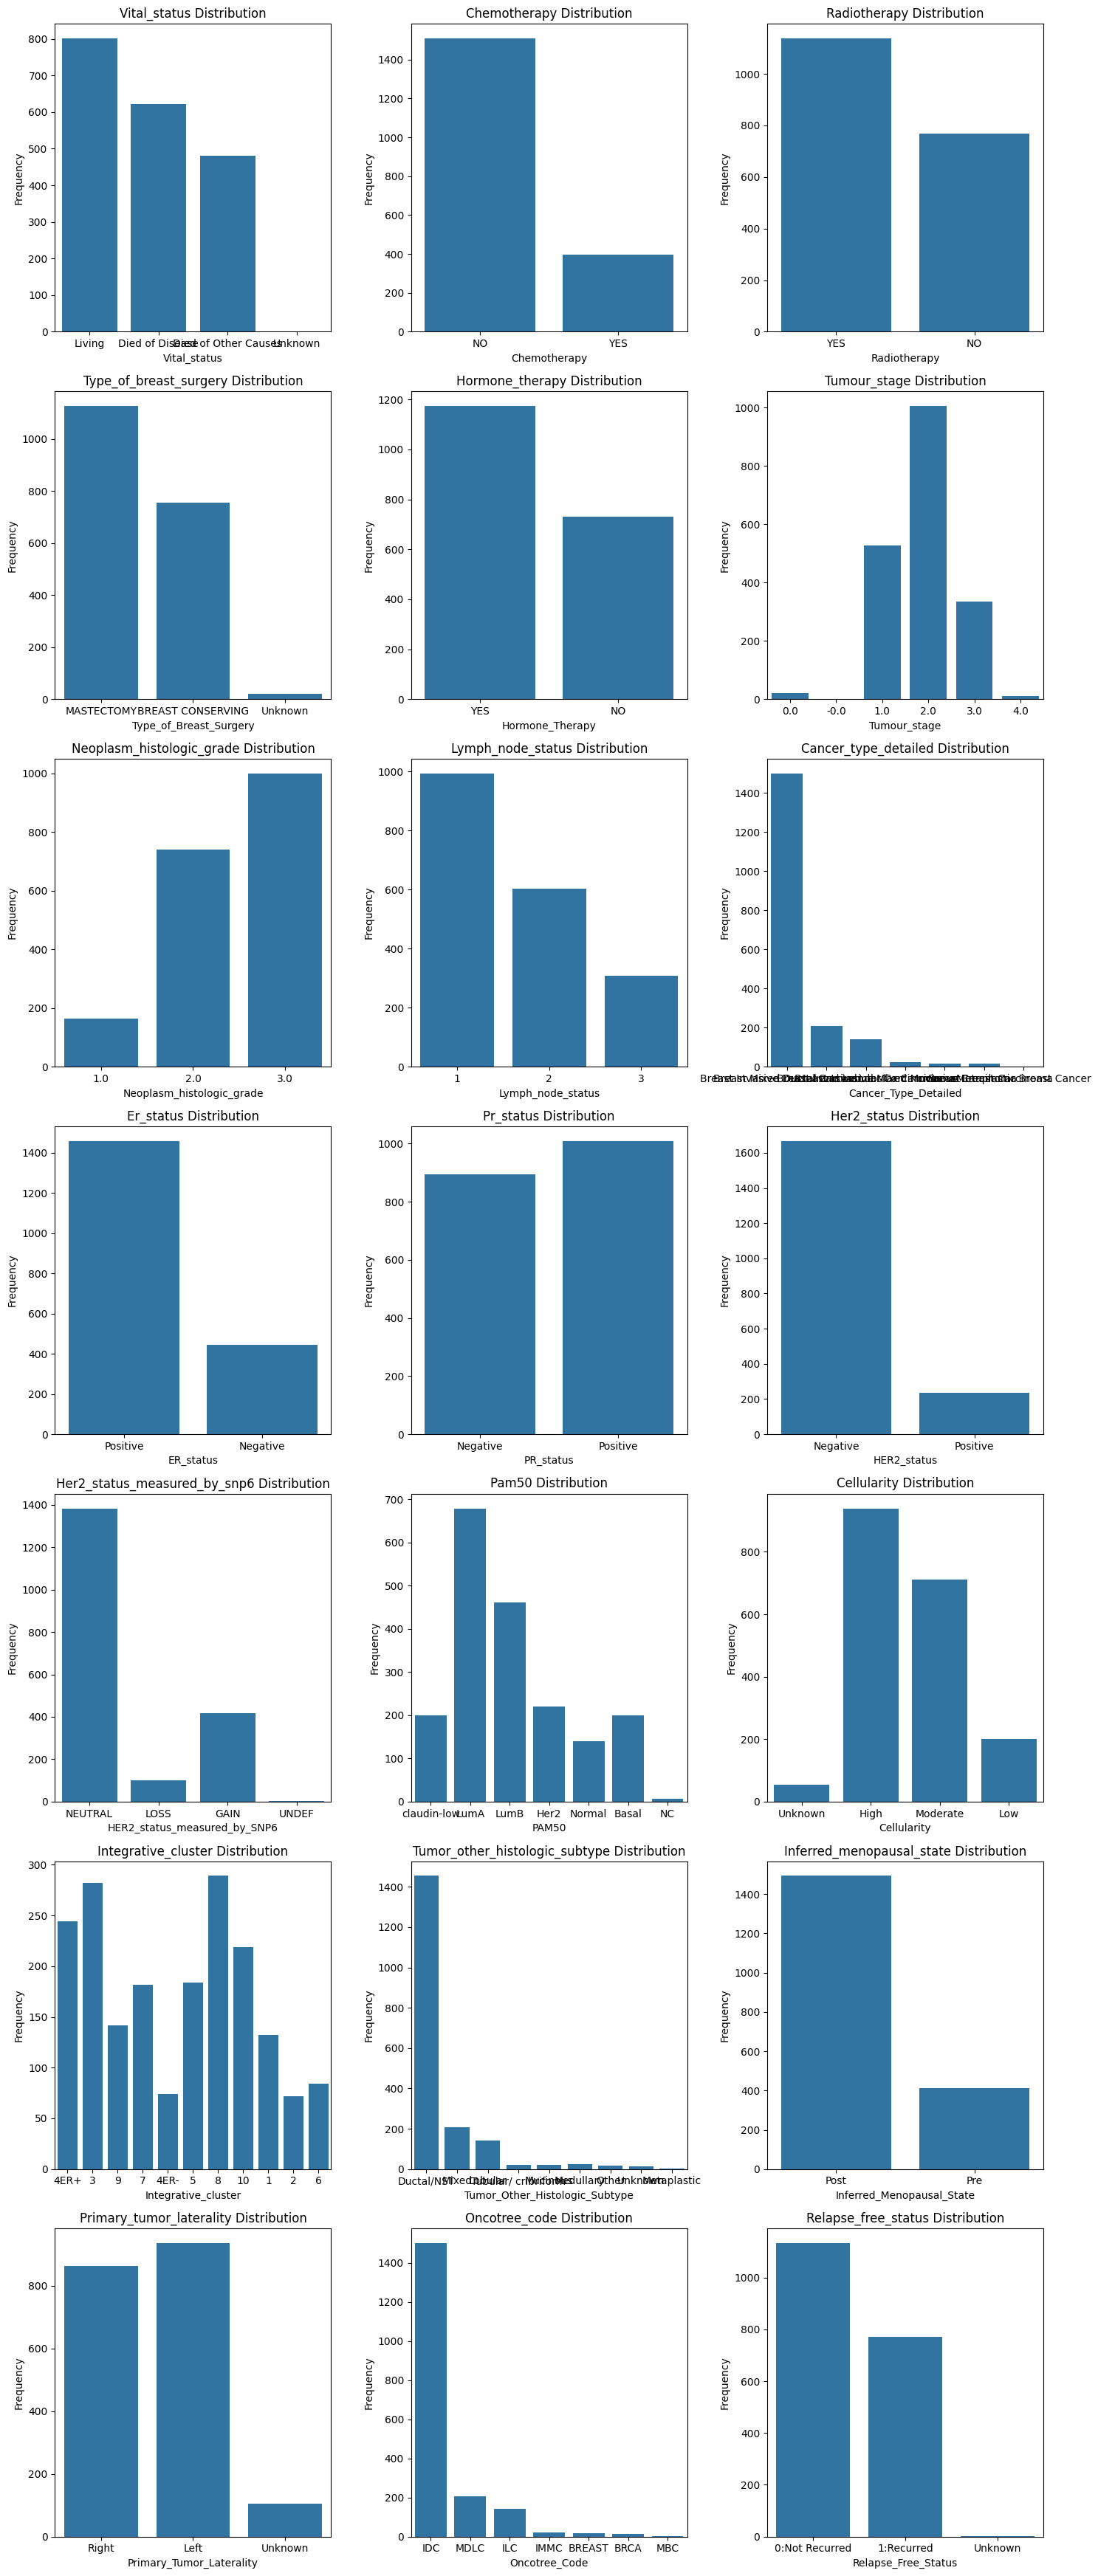

In [ ]:
# Calculate the number of rows and columns for the grid layout
num_vars = len(categorical_vars)
num_cols = 3  # Number of columns
num_rows = (num_vars - 1) // num_cols + 1  # Number of rows

# Set up the plot grid
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 5*num_rows))

# Iterate over each categorical variable and create a bar plot
for i, var in enumerate(categorical_vars):
    row_idx = i // num_cols
    col_idx = i % num_cols
    sns.countplot(x=var, data=df_cleaned, ax=axes[row_idx, col_idx])
    axes[row_idx, col_idx].set_title(f"{var.capitalize()} Distribution")
    axes[row_idx, col_idx].set_xlabel(var)
    axes[row_idx, col_idx].set_ylabel("Frequency")

# Remove any empty subplot if the number of variables is not a multiple of num_cols
if num_vars % num_cols != 0:
    for j in range(num_vars % num_cols, num_cols):
        fig.delaxes(axes[num_rows-1, j])

plt.tight_layout()
plt.show()

The majority of patients are post-menopausal (78.4%), a trend that can be attributed to their relatively older age, as discussed in the preceding section.

The proportion of patients who survived is relatively balanced with the proportion of those who died, albeit with a slight majority of deceased women. However, upon closer examination of patients who succumbed to cancer, the scenario shifts: While the distribution still remains relatively balanced, a greater percentage of women actually survived cancer compared to those who did not (43.1% versus 32.7%).

The relapse-free status indicates that cancer did not recur in the majority of patients (59.5%). Thus, there is a slight imbalance in the distribution between patients who experienced recurrence and those who did not.

The variables Oncotree and the detailed cancer type are equal and reveal that the vast majority of patients within the METABRIC cohort suffer from breast invasive ductal carcinoma (78.8%), followed by mixed ductal and lobular carcinoma (10.9%). The other cancer types account for less than 7.5%.

The tumor stage reflects both the size of the tumor and its spread from the original site, while the grade pertains to the visual characteristics of the cancer cells. The stages of cancer range from 0 to 4. In stage 0, the cancer remains localized and hasn't spread. Stage 1 indicates a small cancer that hasn't spread beyond its original site. In stage 2, the cancer has grown but hasn't metastasized. Stage 3 suggests a larger tumor with possible spread to nearby tissues or lymph nodes. Stage 4, also known as metastatic cancer, involves the spread of cancer from its original site to other organs in the body (NHS, 2021). In the METABRIC dataset, the majority of women are diagnosed with stage 2 tumors (52.8%), followed by 27.7% with stage 1 tumors and 17.5% with stage 3 tumors. Stage 0 tumors are represented by only 1.3% of patients, while the most severe type, stage 4 tumors, accounts for just 0.6%.
The lymph node status refers to whether cancer has spread to nearby lymph nodes or not. Regardingn the staging of lymph node involvement in cancer, N0 indicates the absence of regional lymph node metastasis, N1 signifies cancer spreading to nearby lymph nodes, albeit restricted in number and location, N2 denotes cancer spreading to more lymph nodes or those situated farther from the primary tumor site, and N3 indicates extensive cancer spread to nearby lymph nodes or those distant from the primary tumor site (Dietrich et al., 2023) The METABRIC cases reveal status 1-3, hence, cancer has metastasized in all patients. The observed distribution is relatively balanced between cases where (1) the tumor has spread to more than one lymph node or has spread extensively and where (status 2: 31.7%, status 3: 16.1%; a total of 47.8%) (2) the extent of lymph node involvement appears restricted in terms of number and location and more widespread dissemination (status 1: 52.2%).

The HER2 status indicates the presence or absence of the HER2 protein in breast carcinomas. A positive HER2 status (HER2+) means that the cancer cells carry the hormone receptor HER-2. HER2 positivity is associated with increased tumor growth and a more aggressive course of cancer. Two other important indicators that influence the growth of breast cancer cells are the sex hormones estrogen (ER = estrogen receptors) if they possess binding sites and progesterone (PR = progesterone receptors) for hormone docking. These hormone receptors transmit growth signals into the interior of the tumor cell, thus promoting tumor growth (Gottfried, 2022).
As observed in real-world scenarios outside the METABRIC study, the majority of cases have a negative HER2 status, accounting for 87.6%. Although the distribution of ER status is also imbalanced, with 76.6% being ER positive (possessing binding sites), the distribution of PR status is relatively balanced among patients, with 53% testing positive and 47% testing negative.
PAM50 refers to a 50-gene signature used to categorize breast cancer into five molecular intrinsic subtypes: Luminal A, Luminal B, human epidermal growth factor receptor 2 (HER2)-enriched, Basal-like, and Normal-like. Each of these subtypes exhibits distinct biological properties and prognoses. Luminal A subtype typically presents the best prognosis, while HER2-enriched and Basal-like subtypes are considered more aggressive diseases. Additionally, less common subtypes such as Claudin-low, Interferon-rich, and Molecular Apocrine have been identified using other gene expression profiling assays (Kensler et al., 2019).
Within the METABRIC cohort, 35.7% of patients are classified as having the luminal A subtype, while 24.2% are categorized as luminal B. As anticipated, a minority fall into other subtypes. Surprisingly, the HER2-positive subtype represents 11.6% of cases, slightly differing from the previously mentioned finding of 12.4% HER2-positive patients. This variance may be attributed to the utilization of different classification methods, which are not entirely standardized (Kensler et al., 2019).
Advances in sequencing have enhanced the understanding of molecular profiles in breast cancer. Researchers used the METABRIC dataset to identify ten distinct breast cancer subtypes, called integrative clusters, based on copy number and expression data. These subtypes show varied survival outcomes and responses to neoadjuvant chemotherapy. The integrative clusters 3, 4, 7, and 8 have the best prognosis, while clusters 1, 6, and 9 show intermediate prognosis. The remaining (2, 5, and 10) have poorer outcomes. Integrative cluster 4 is split into 4ER+ and 4ER-, thus including both, ER-positive and -negative tumors (Mukherjee, et al., 2018).
The integrative clusters with the best favorable prognosis (i.e., 8, 3, 4) are prominently represented within the METABRIC cohort and are fairly evenly distributed (8 - 15.2%, 3 - 14.8%, 4ER+ - 12.8%, 4ER- - 3.9%). Clusters 10 (11.5%) and 5 (9.7%) with the worst prognosis are the next most represented. All other clusters exhibit distributions of less than 9.6%. This distribution might contribute to the balance observed in the vital status variable

In terms of therapy, hormone therapy emerges as the most prevalent, administered to 61.6% of patients, followed closely by radiotherapy, which is received by 59.7% of patients. Chemotherapy, on the other hand, is utilized in only 20.7% of cases, suggesting a relatively lower efficacy. The majority of patients, accounting for 59.2%, undergo mastectomy as part of their treatment.8






### EDA

#### Age
*Are there any differences between young and old people?*

In [ ]:
#Create new column whether "Age_at_diagnosis" is below or above median
median_age = df_cleaned['Age_at_diagnosis'].median()
df_cleaned['Is_Age_below_Median'] = df_cleaned['Age_at_diagnosis'] >= median_age
#Convert Bool to Yes/No
df_cleaned['Is_Age_below_Median'] = df_cleaned['Is_Age_below_Median'].map({True: 'No', False: 'Yes'})

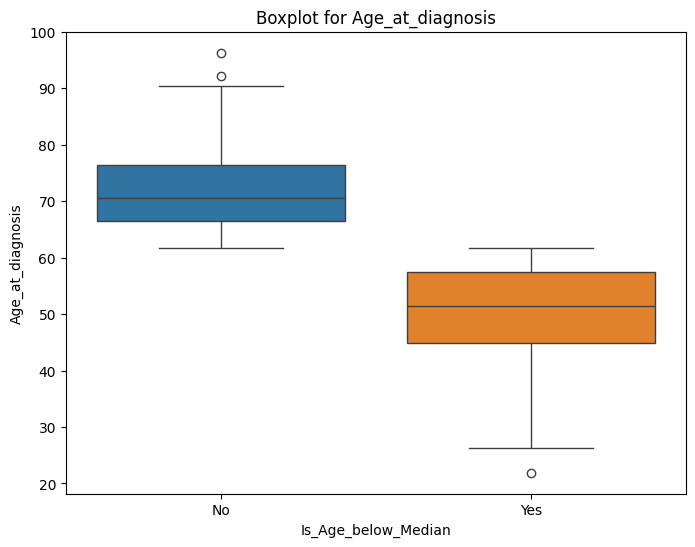

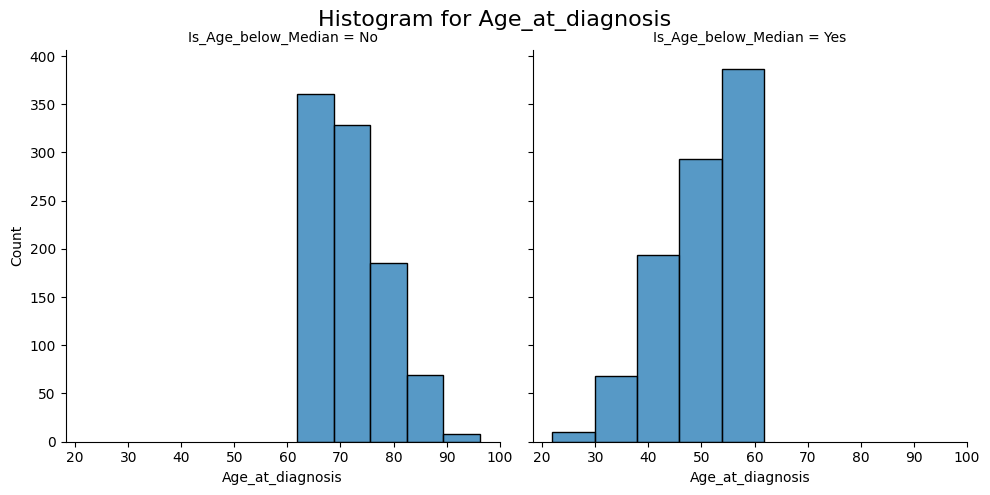

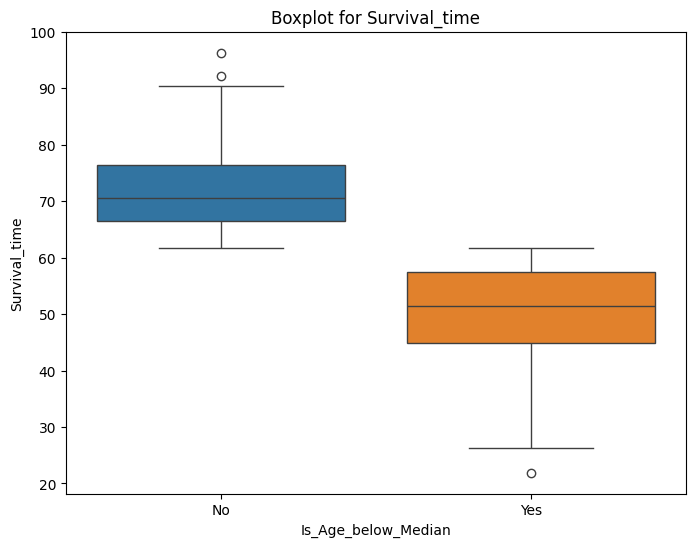

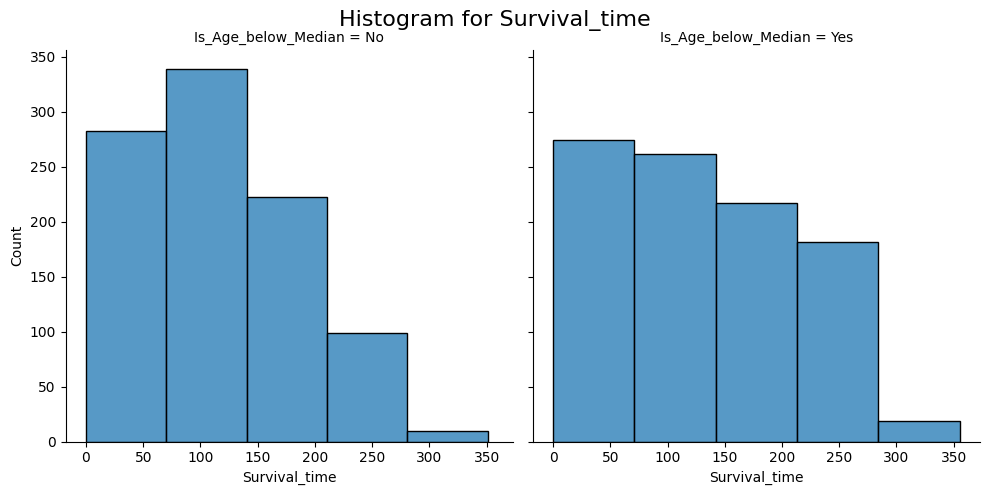

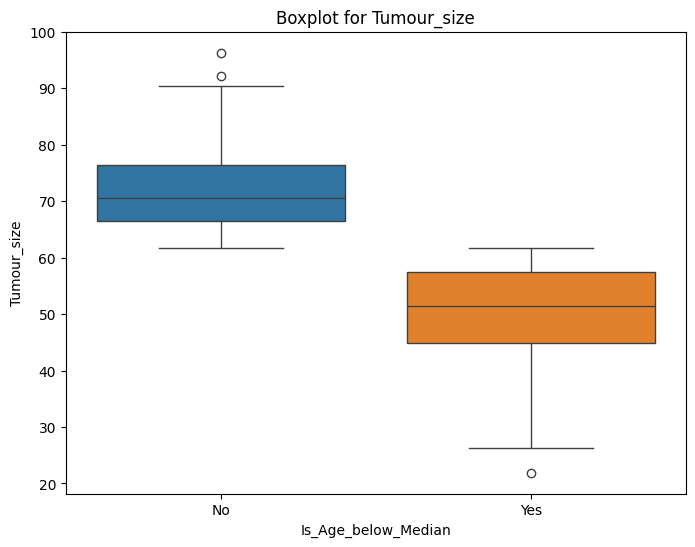

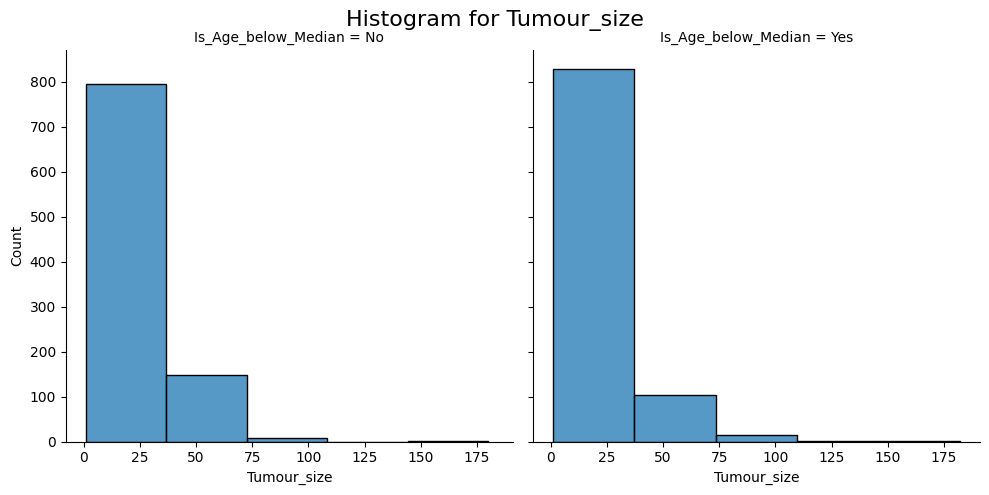

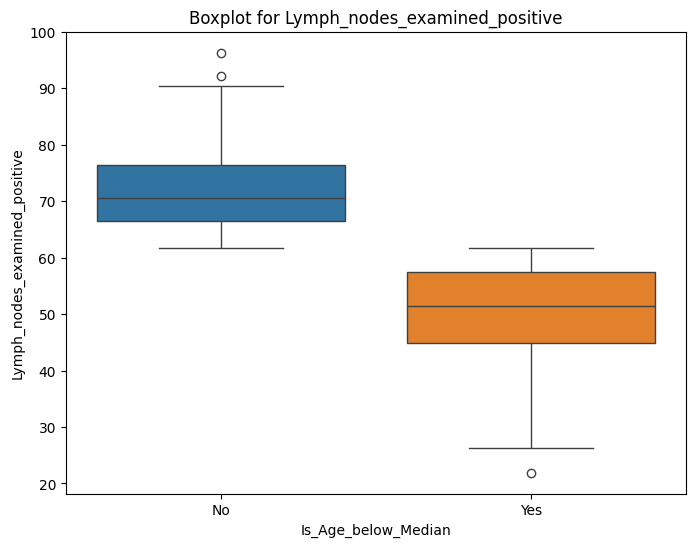

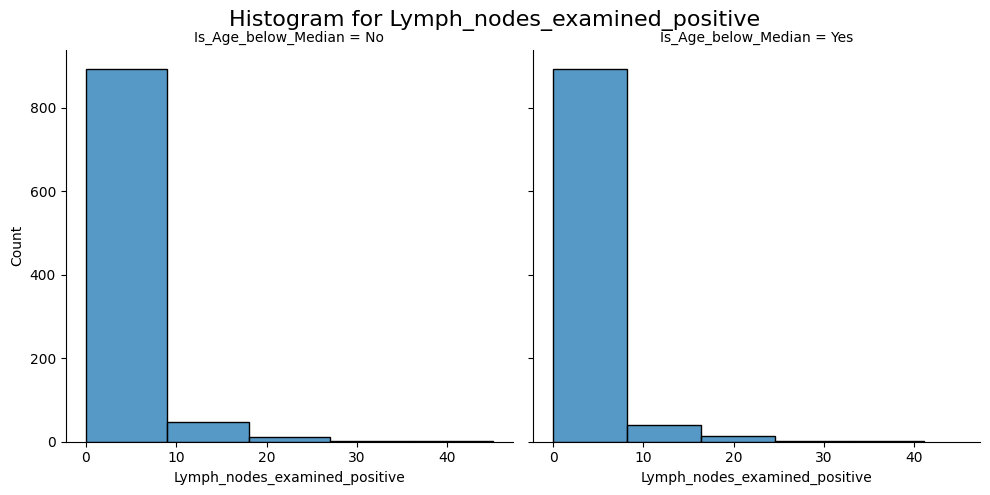

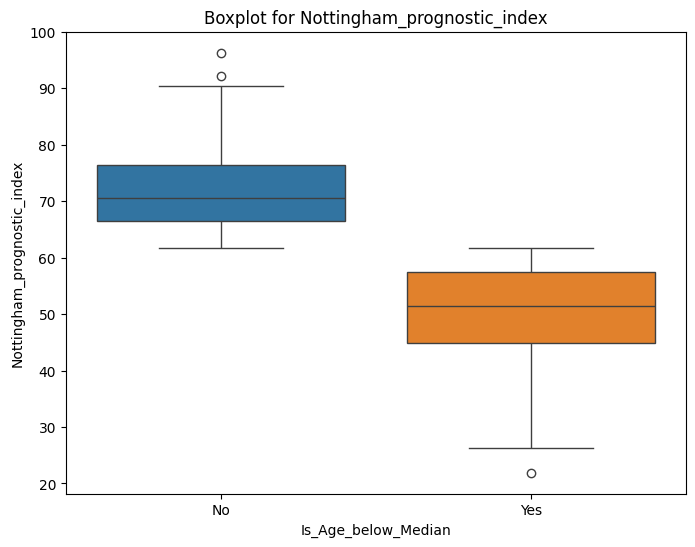

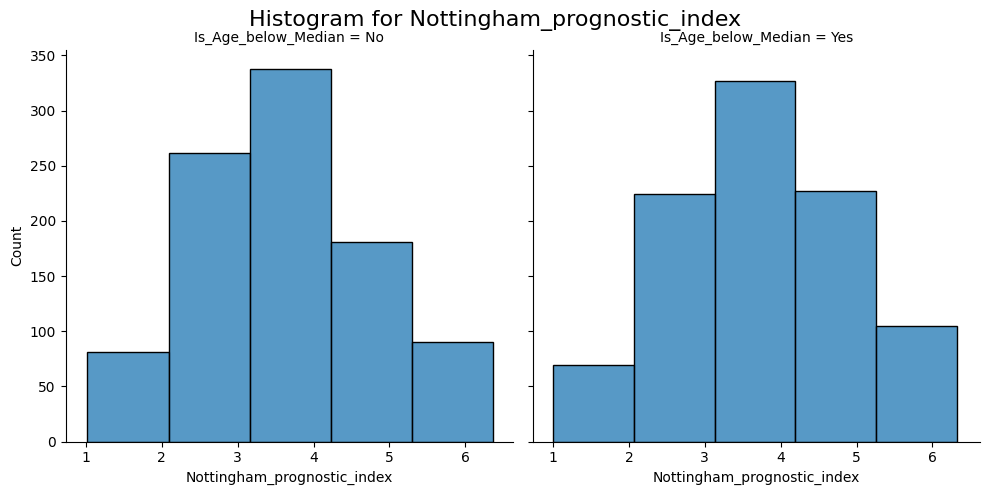

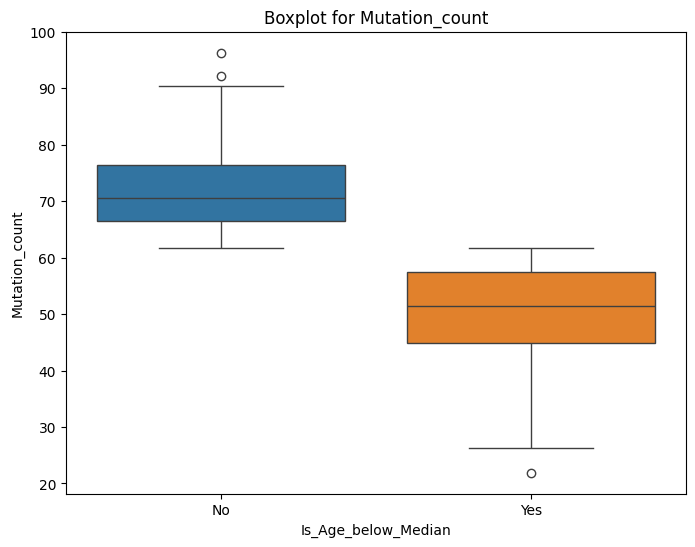

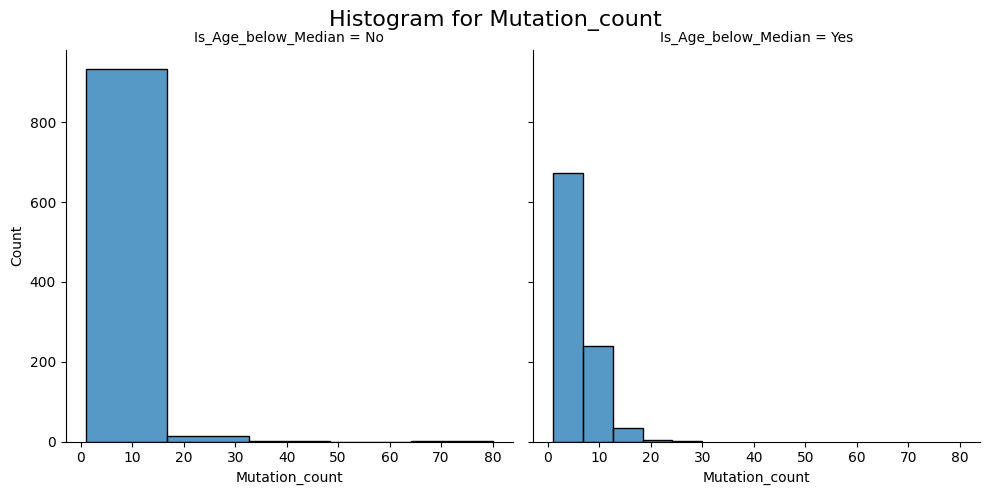

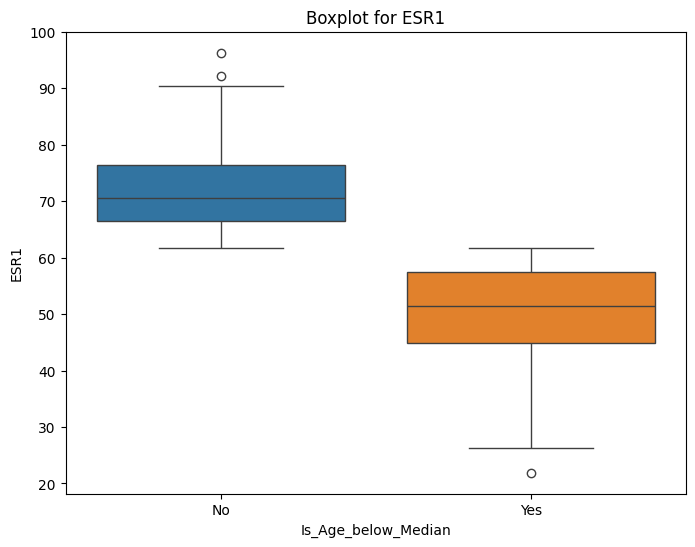

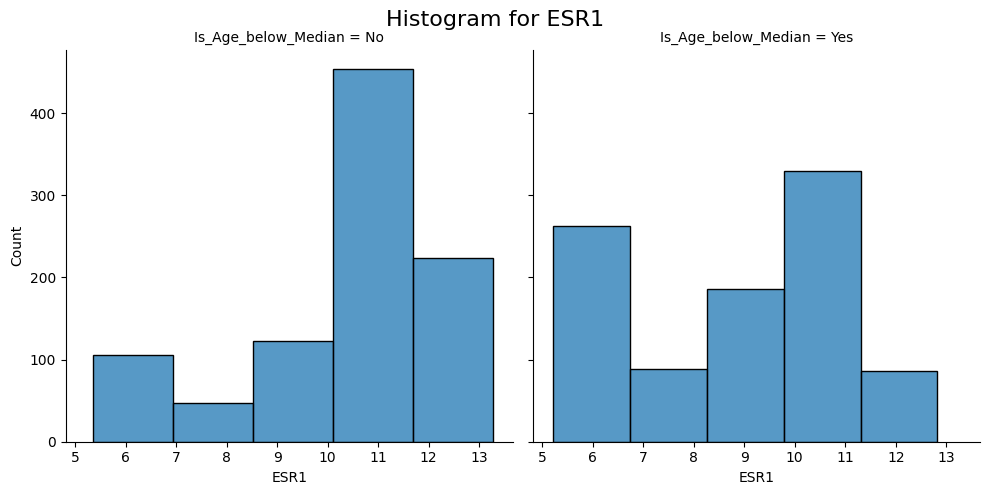

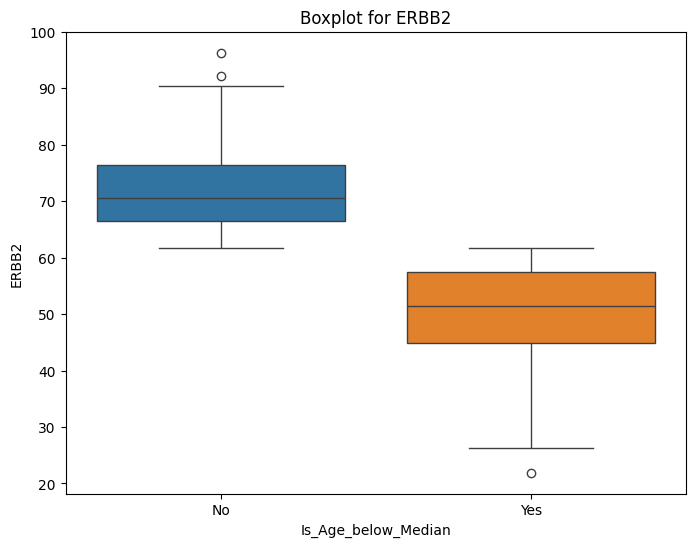

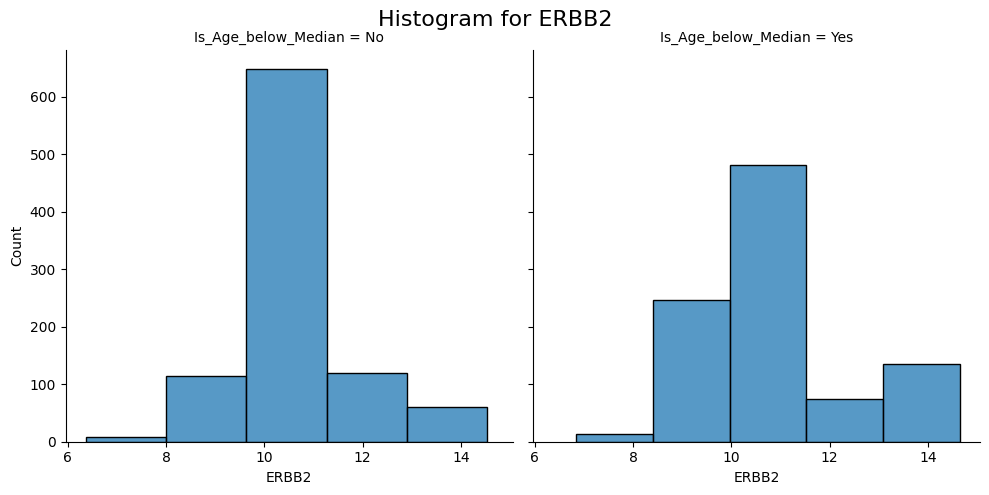

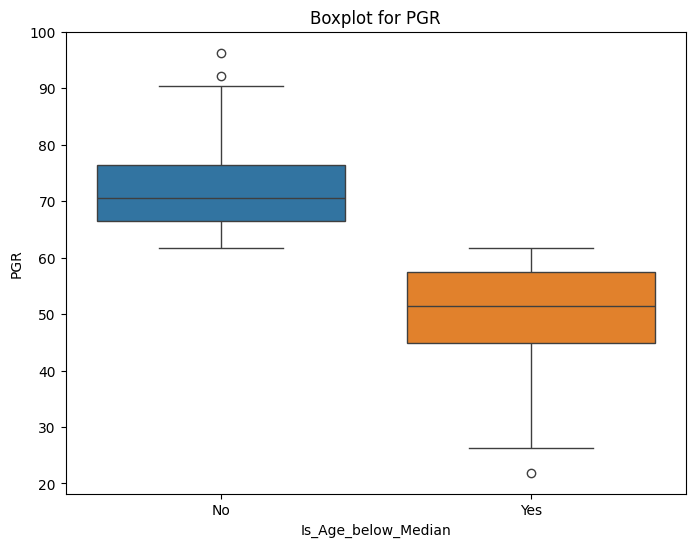

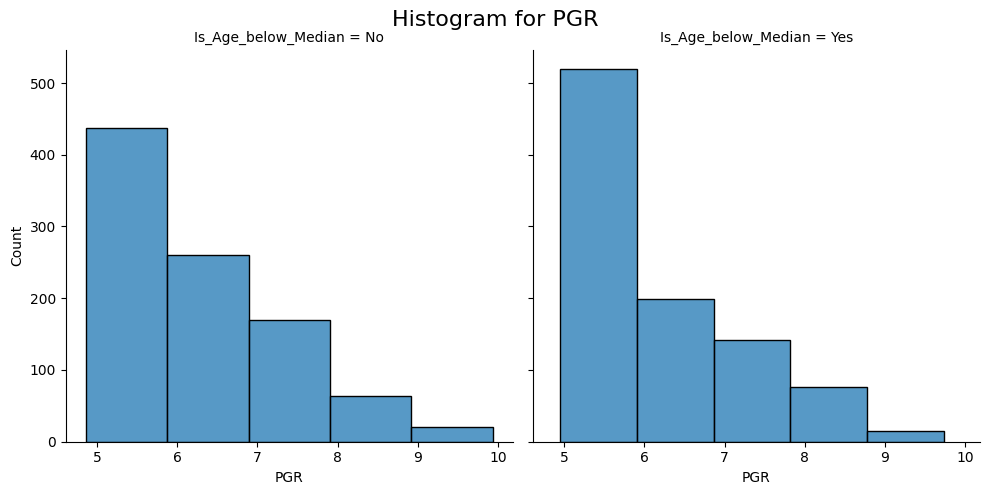

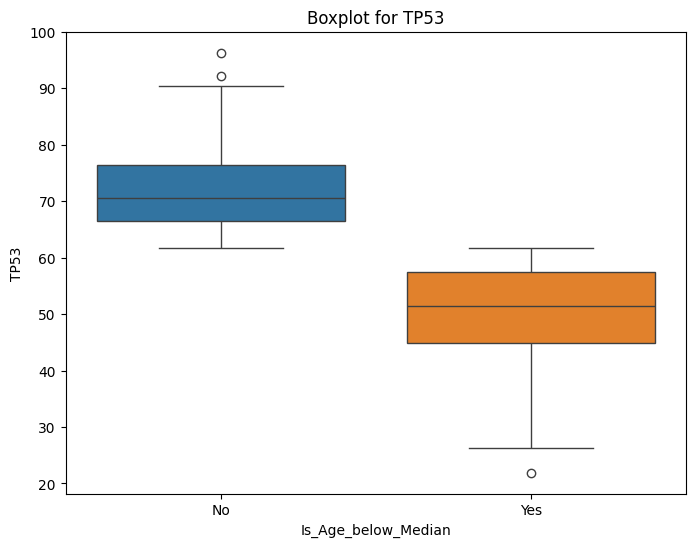

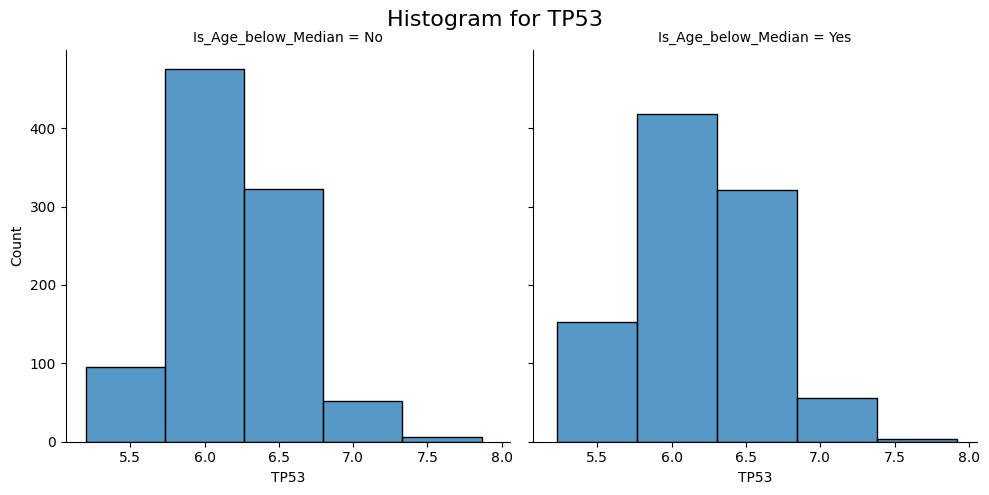

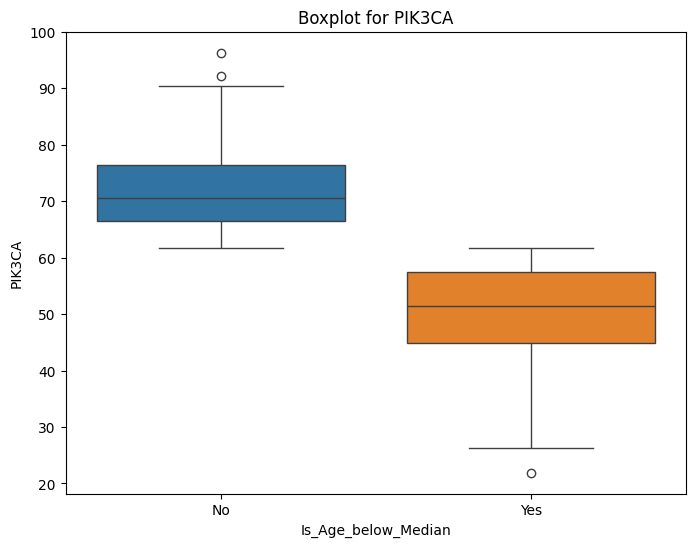

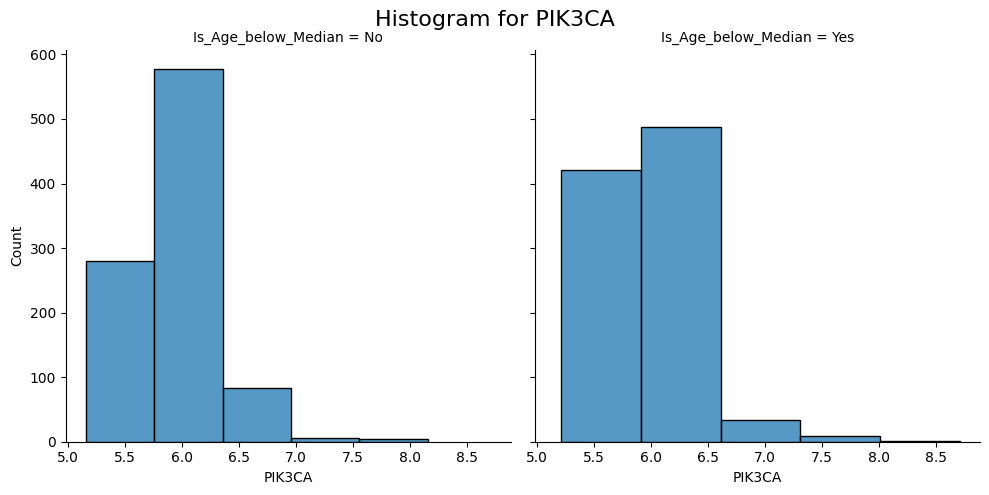

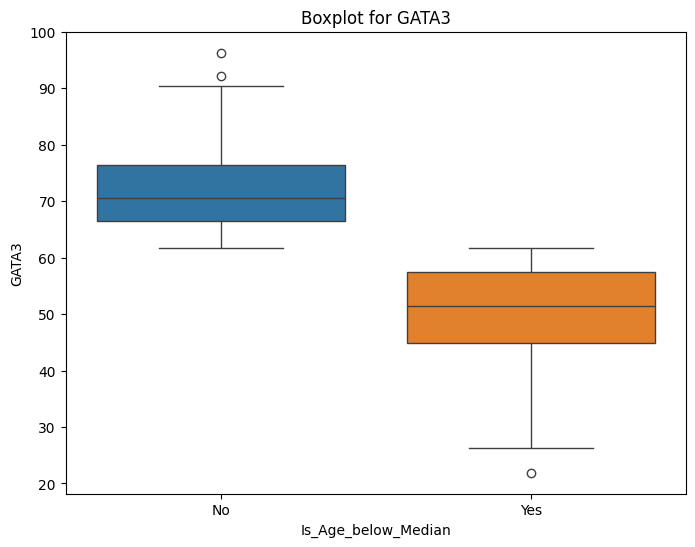

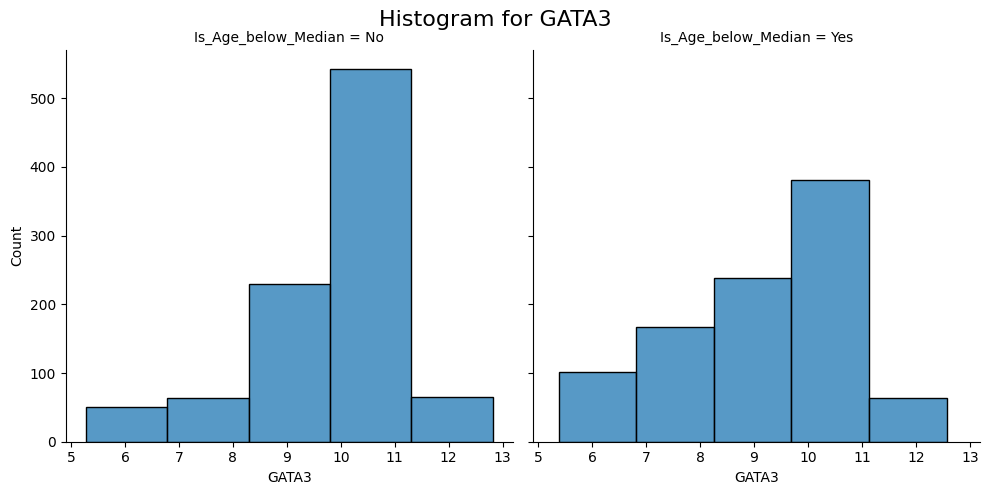

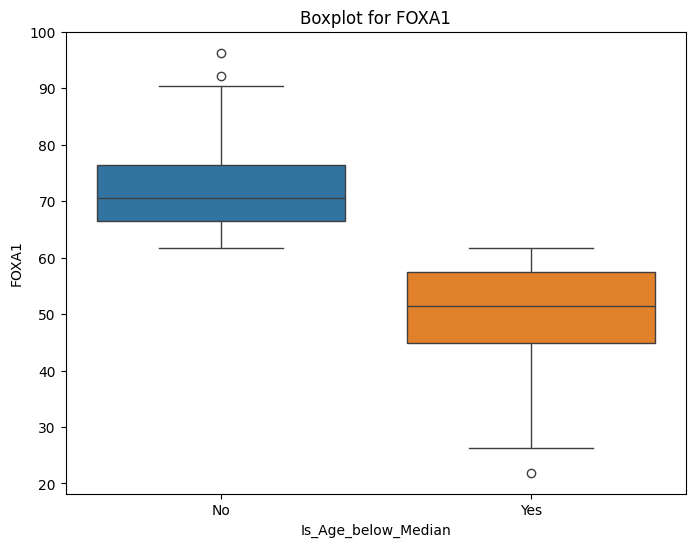

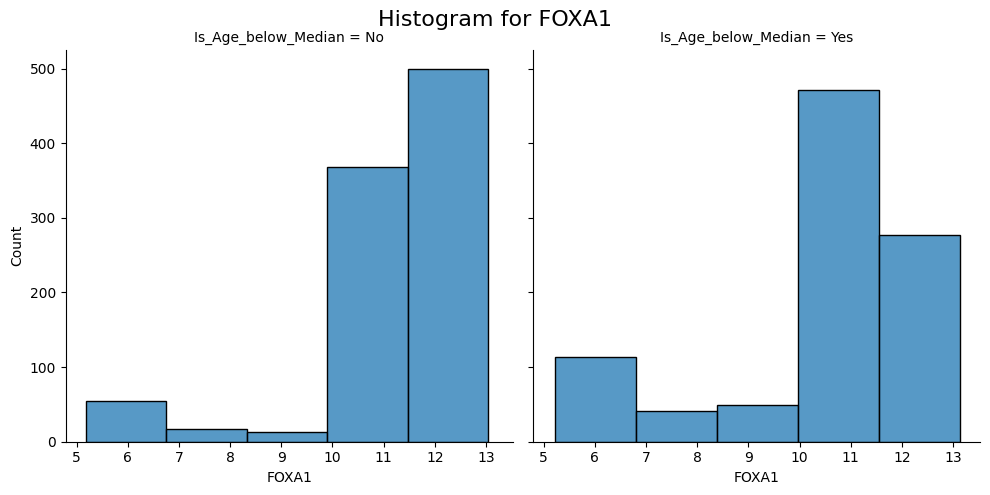

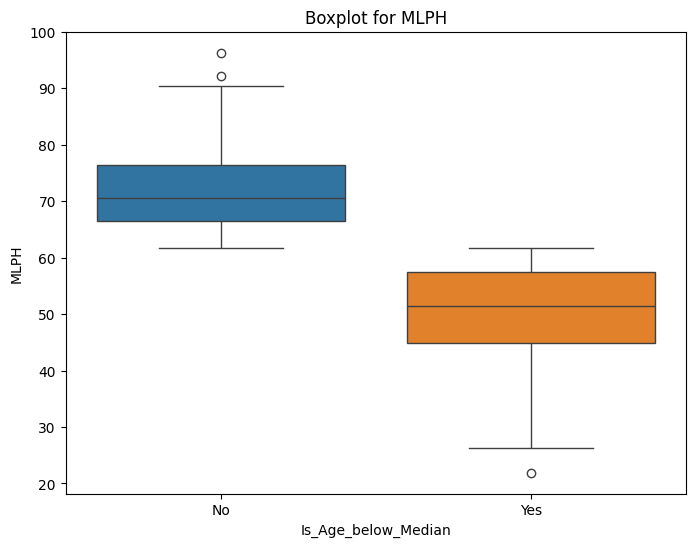

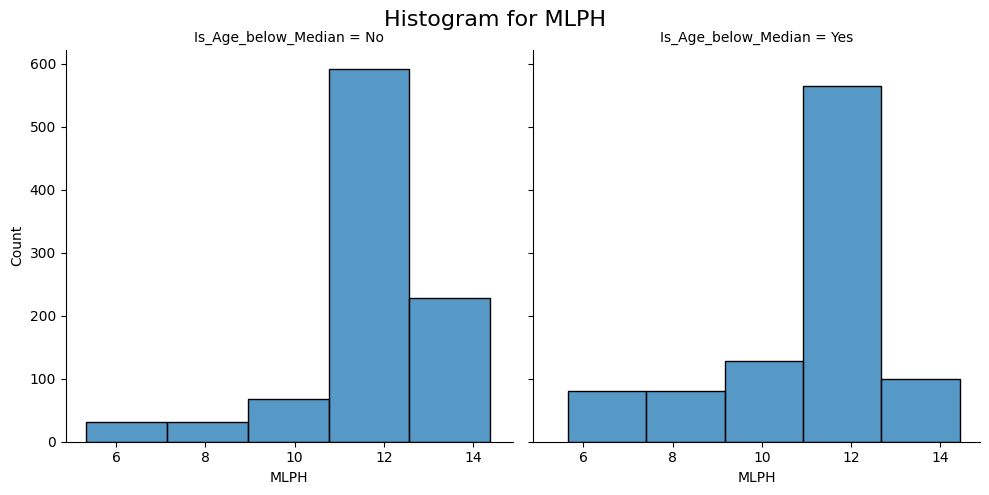

In [ ]:
for i in numerical_vars:
    #create boxplot for numerical_vars
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Is_Age_below_Median', y='Age_at_diagnosis', data=df_cleaned, hue='Is_Age_below_Median')
    plt.title(f"Boxplot for {i}")
    plt.xlabel('Is_Age_below_Median')
    plt.ylabel(i)

    #create histogram for numerical_vars
    g = sns.FacetGrid(df_cleaned, col='Is_Age_below_Median', col_wrap=2, height=5)
    g.map(sns.histplot, i, bins=5)
    plt.subplots_adjust(top=0.9)
    g.fig.suptitle(f"Histogram for {i}", fontsize=16)

    plt.show()

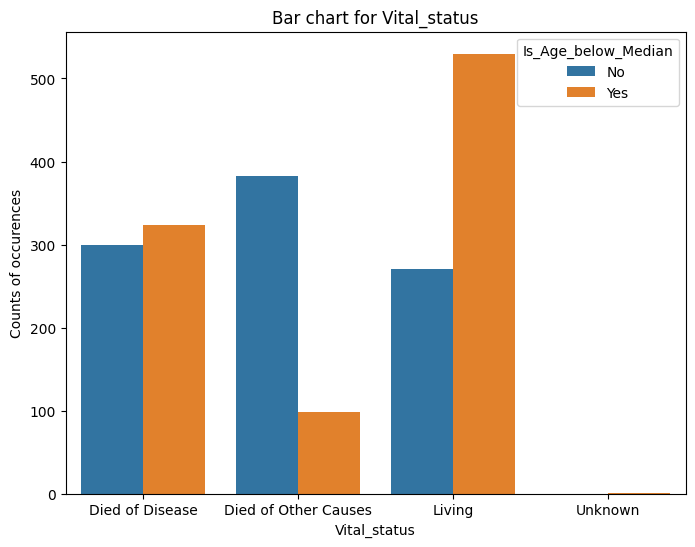

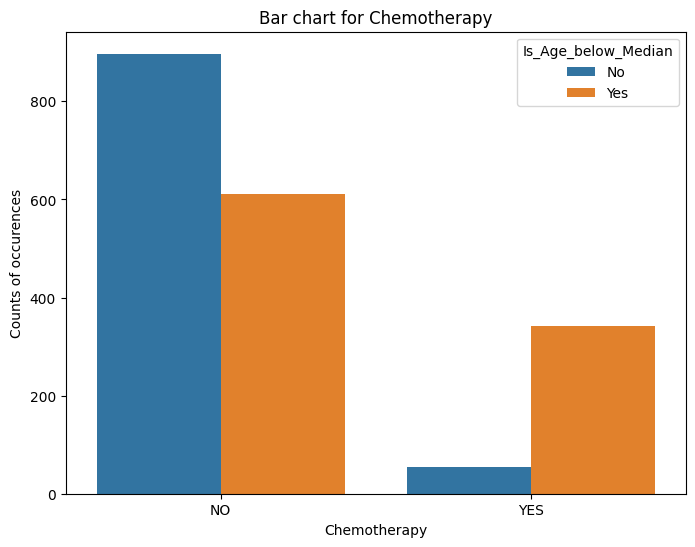

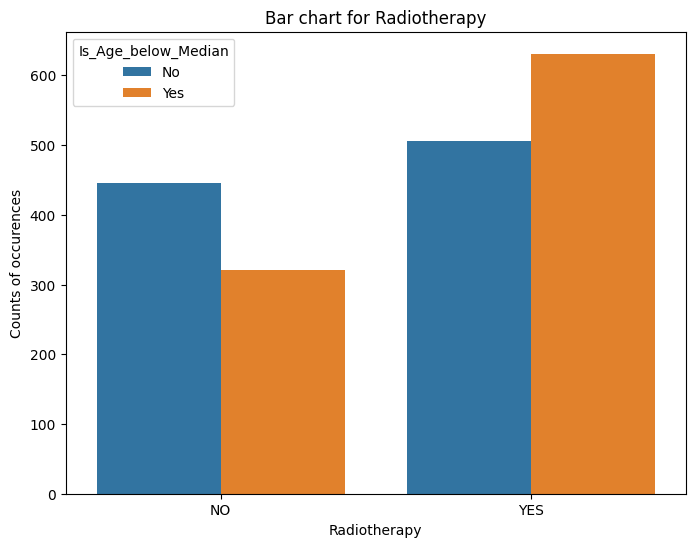

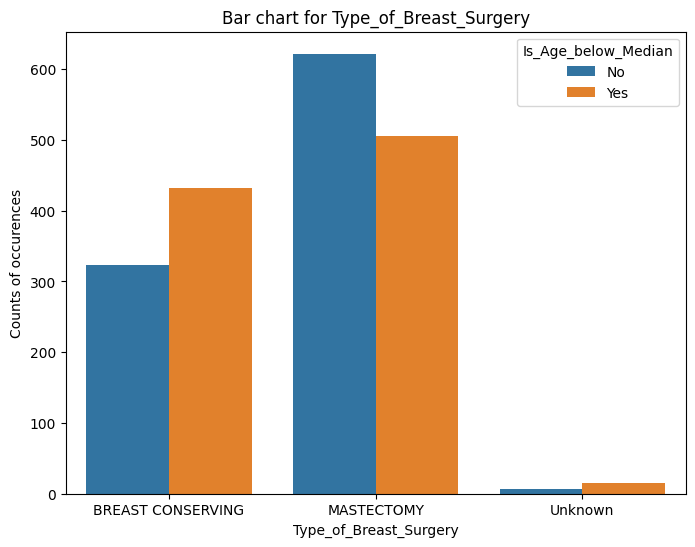

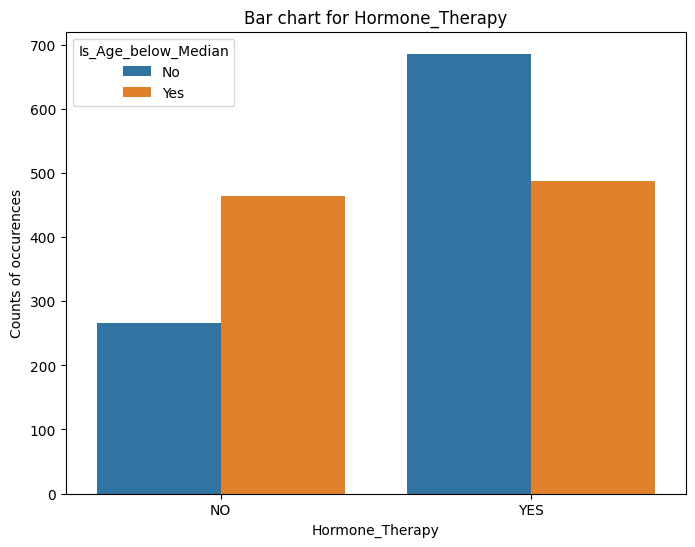

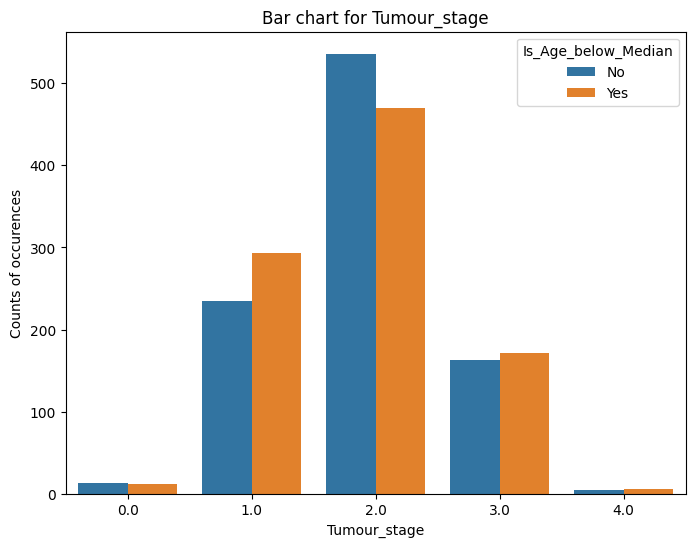

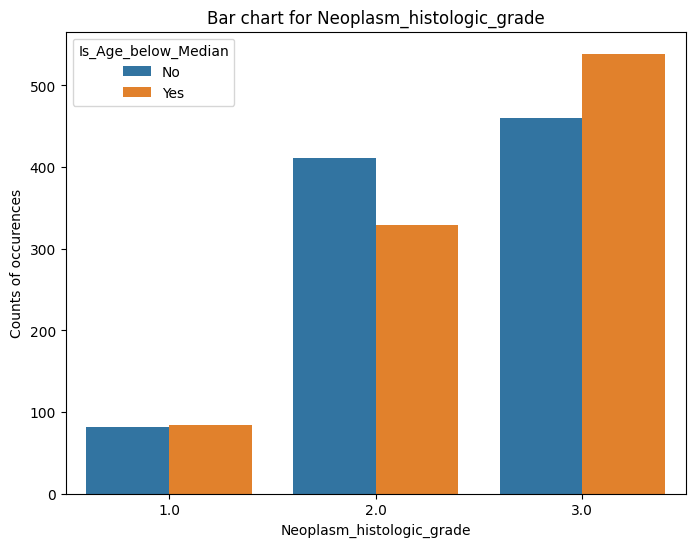

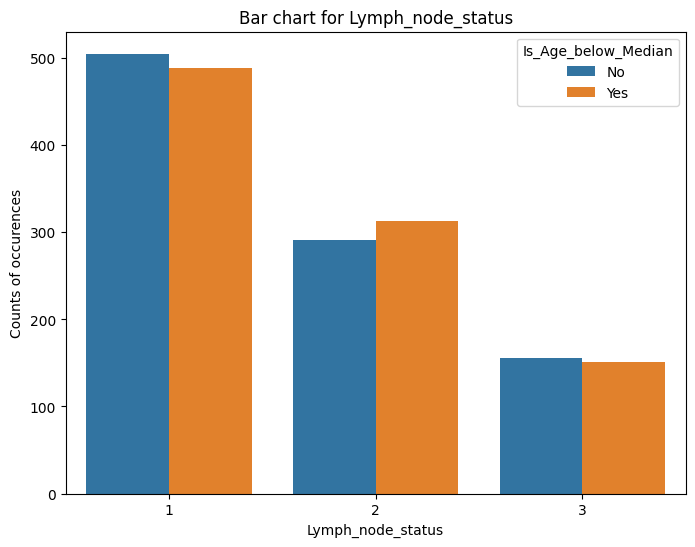

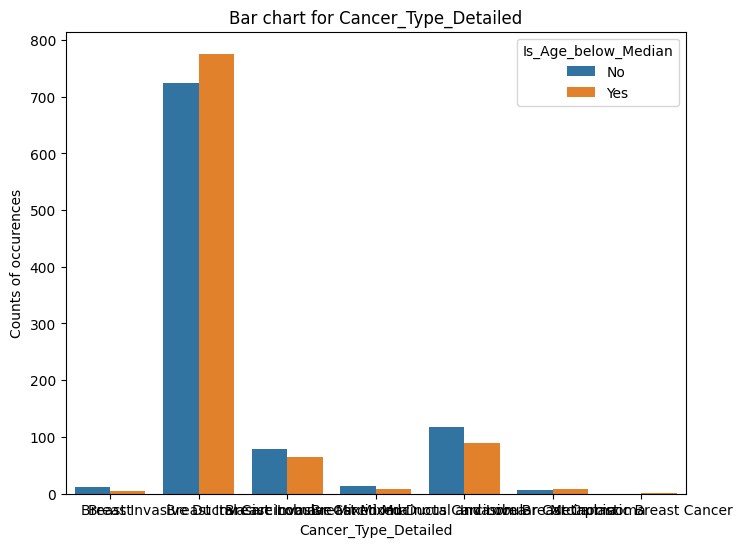

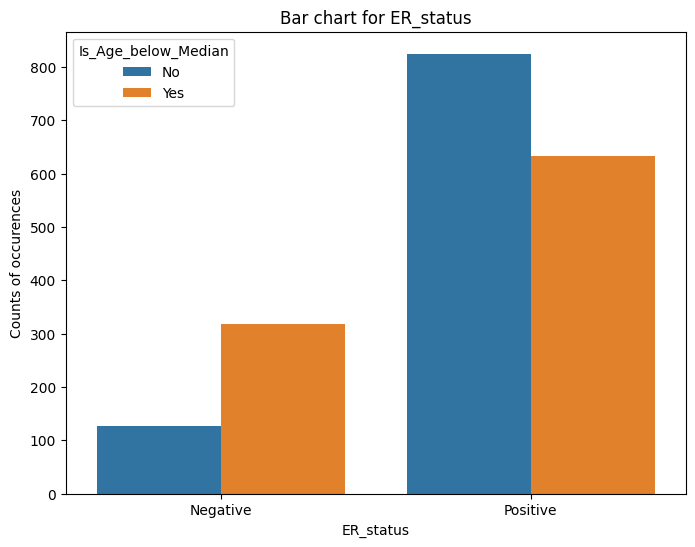

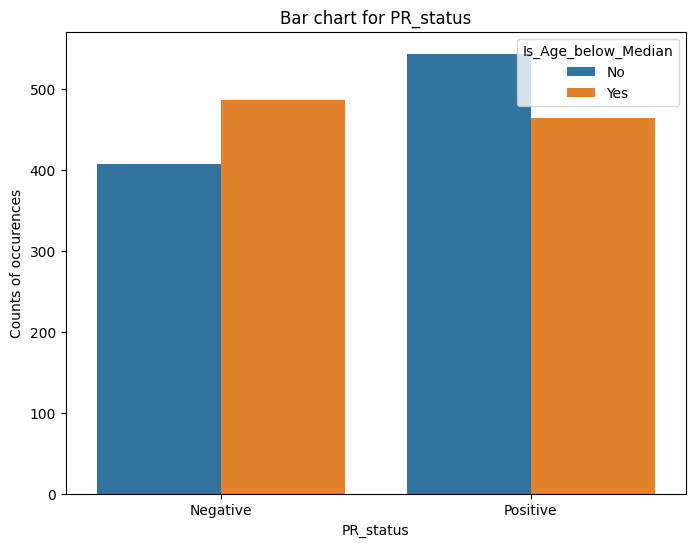

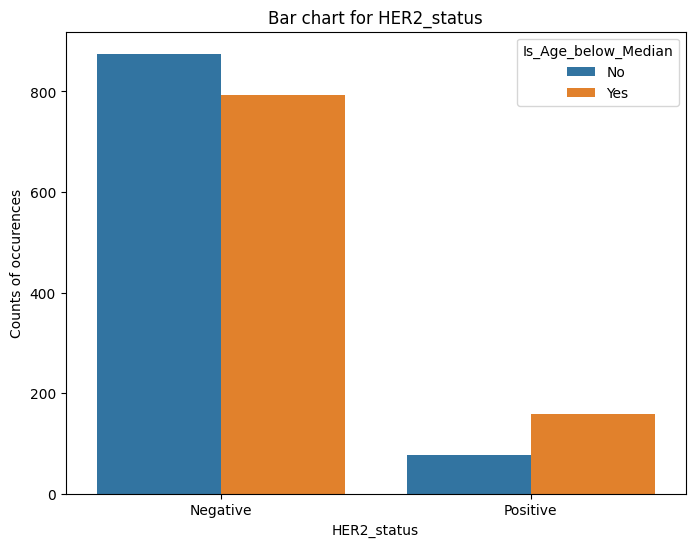

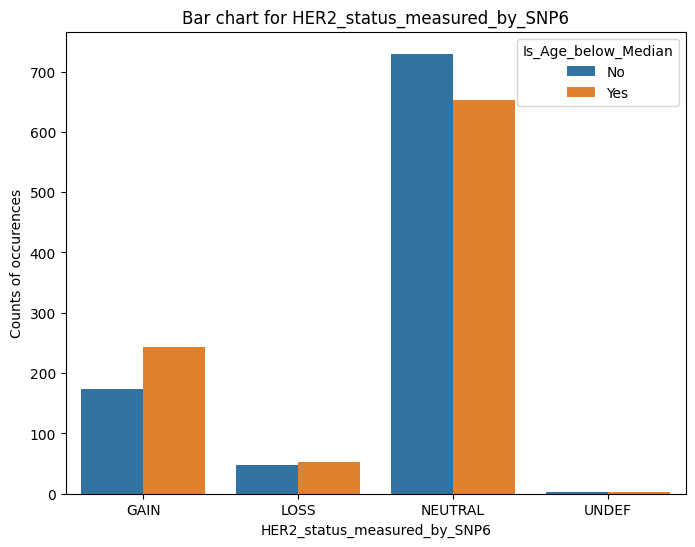

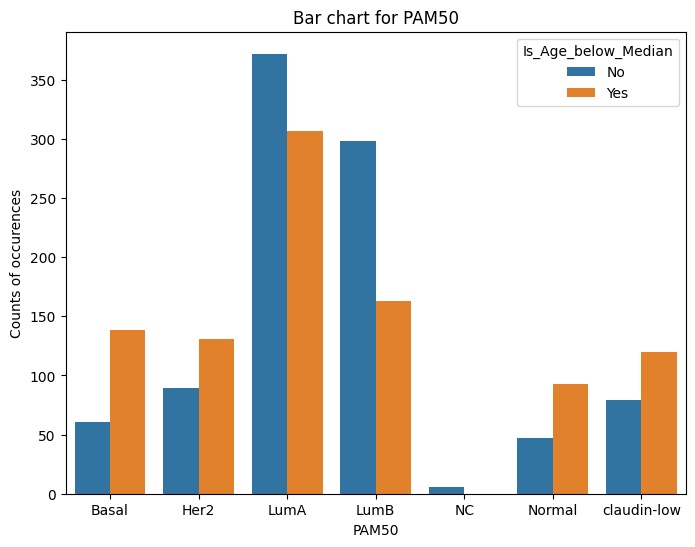

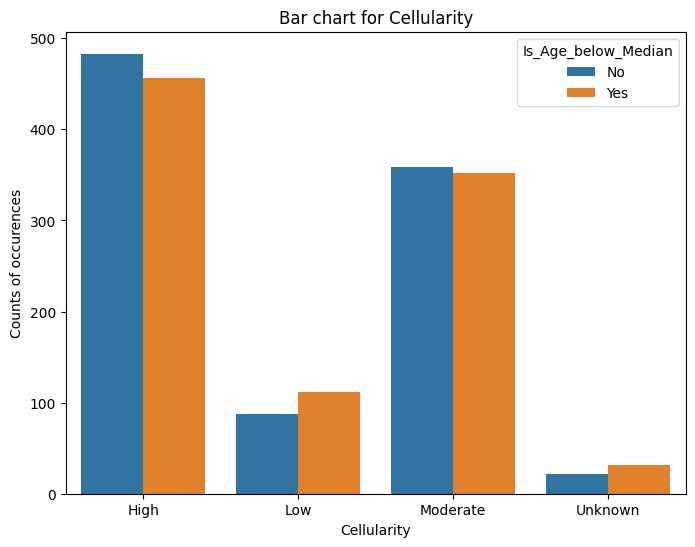

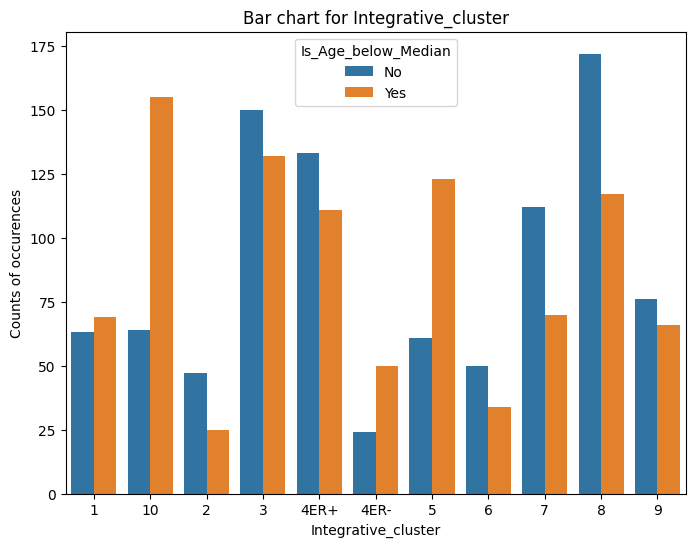

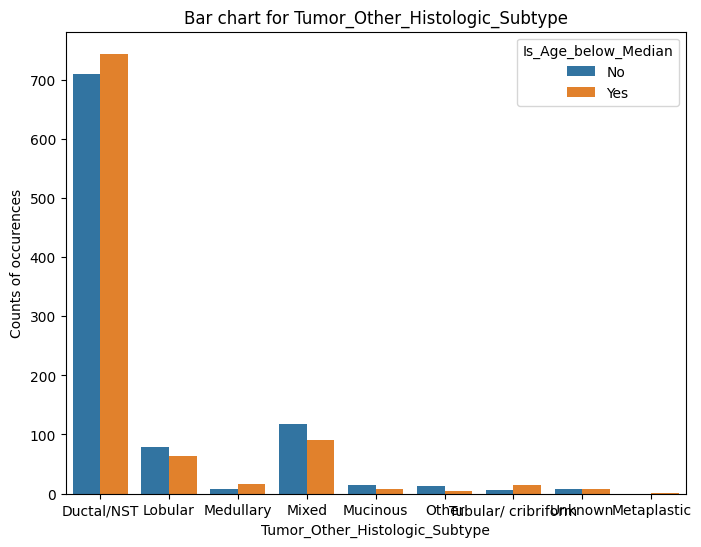

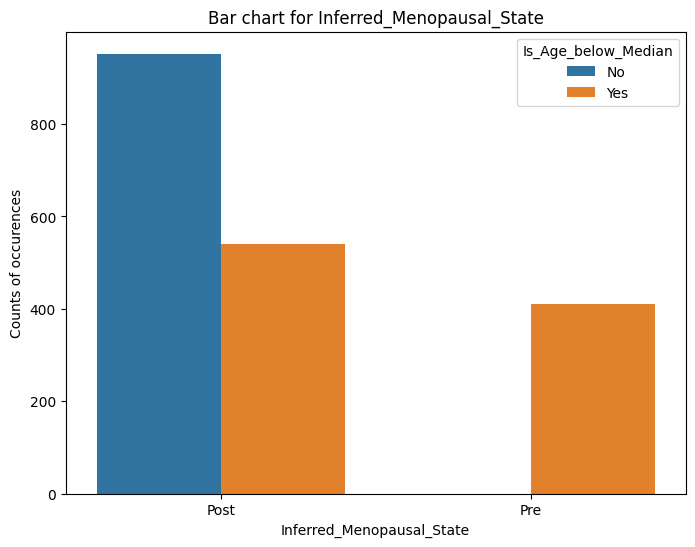

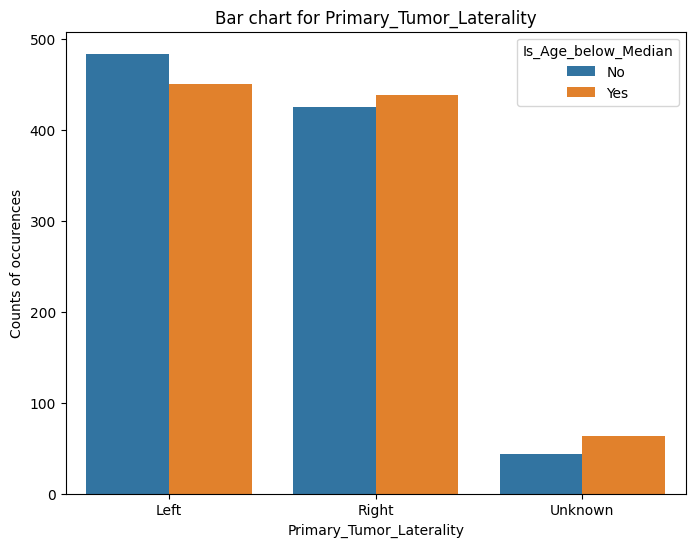

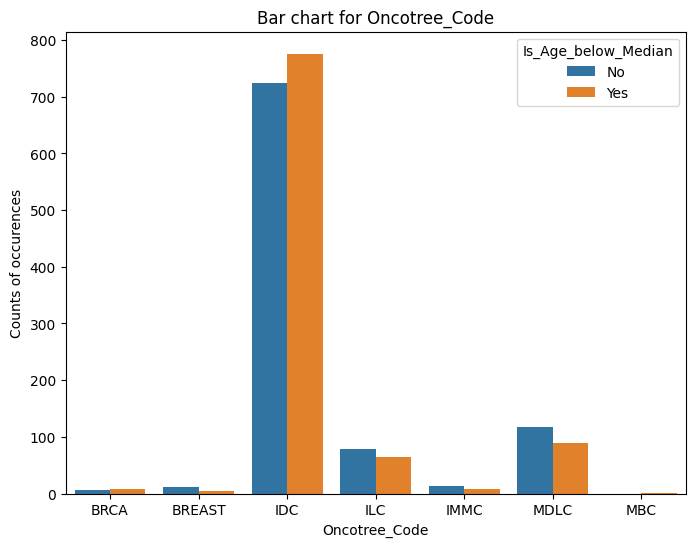

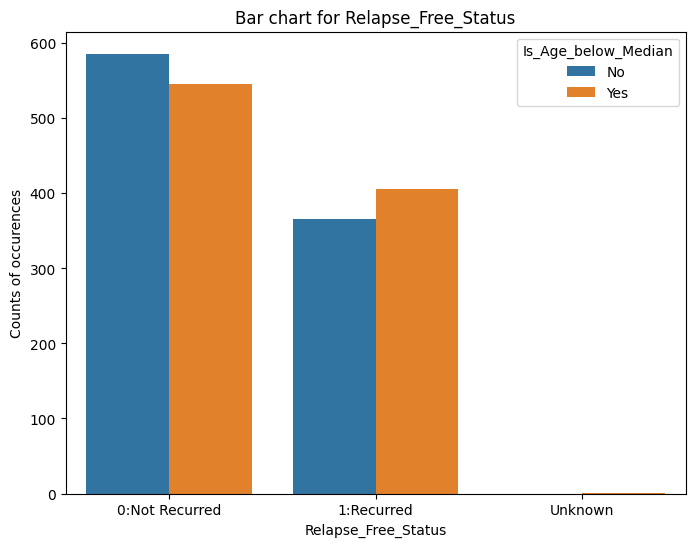

In [ ]:
for i in categorical_vars:
    # Calculate the number of occurrences of each category for each categorical variable
    count_data = df_cleaned.groupby(['Is_Age_below_Median', i]).size().reset_index(name='Count')

    # Create bar chart for the number of occurrences
    plt.figure(figsize=(8, 6))
    sns.barplot(x=i, y='Count', hue='Is_Age_below_Median', data=count_data)
    plt.title(f"Bar chart for {i}")
    plt.xlabel(i)
    plt.ylabel("Counts of occurences")
    plt.show()

**Findings:** We observed histograms representing various variables. Surprisingly, both groups exhibited similar distributions, suggesting comparable patterns in the data.
Additionally, when inspecting the boxplots, a noticeable trend emerged: the box position for the younger cohort consistently appeared lower. This implies that across the variables studied, the values tended to be weaker among the younger subset.

#### Cancer Type

*What are the differences between the cancer types?*

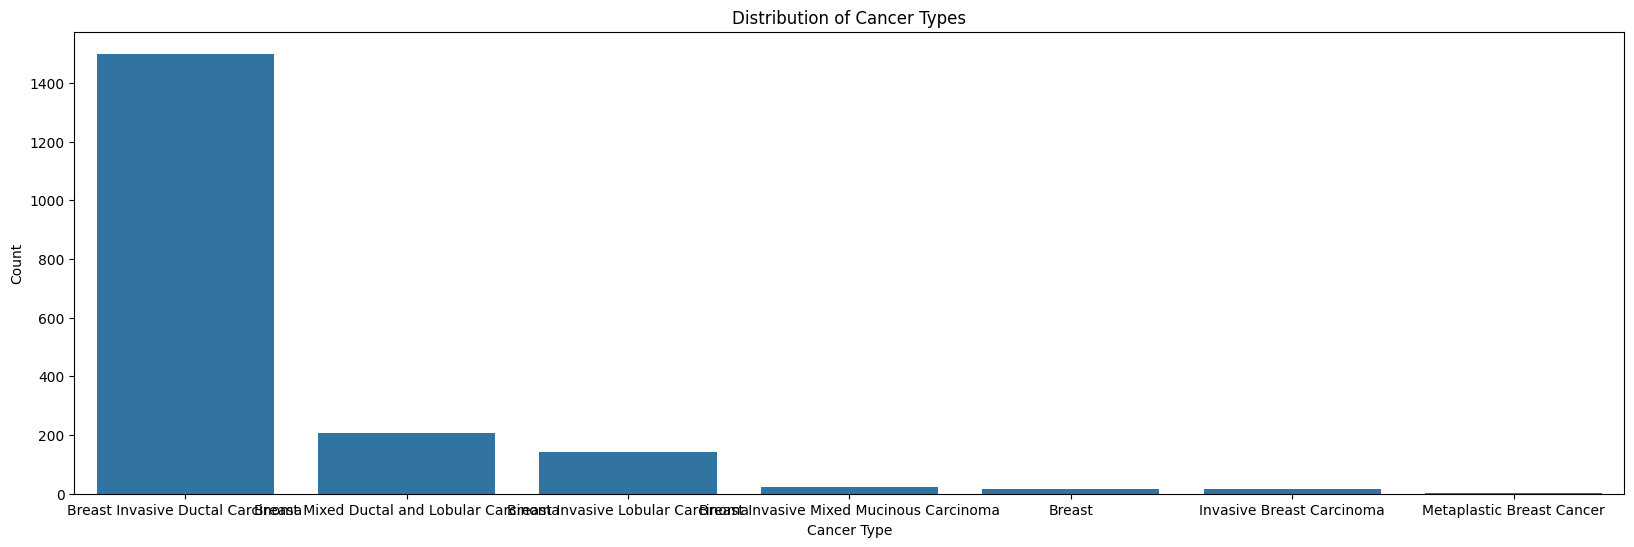

Cancer Type Distribution:
Breast Invasive Ductal Carcinoma             1500
Breast Mixed Ductal and Lobular Carcinoma     207
Breast Invasive Lobular Carcinoma             142
Breast Invasive Mixed Mucinous Carcinoma       22
Breast                                         17
Invasive Breast Carcinoma                      15
Metaplastic Breast Cancer                       1
Name: Cancer_Type_Detailed, dtype: int64


In [ ]:
# 3. Exploratory Data Analysis (EDA)
    # Univariate Analysis
        # Histogram of Cancer Type distribution
plt.figure(figsize=(20, 6))
sns.countplot(x='Cancer_Type_Detailed', data=df_cleaned)
plt.title('Distribution of Cancer Types')
plt.xlabel('Cancer Type')
plt.ylabel('Count')
plt.show()

cancer_type_counts = df_cleaned['Cancer_Type_Detailed'].value_counts()
print("Cancer Type Distribution:")
print(cancer_type_counts)

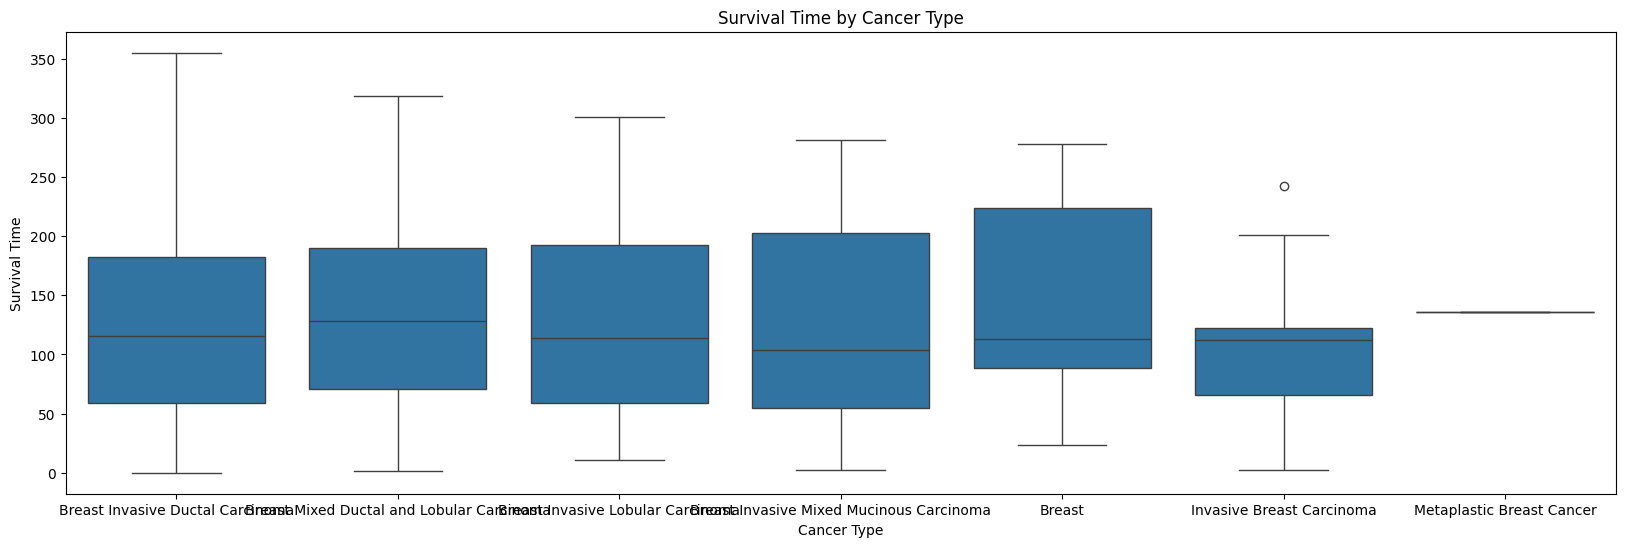


Survival Time Summary by Cancer Type:
                                            count        mean        std  \
Cancer_Type_Detailed                                                       
Breast                                       17.0  141.166667  82.813324   
Breast Invasive Ductal Carcinoma           1500.0  123.857422  76.087161   
Breast Invasive Lobular Carcinoma           142.0  125.638967  77.998761   
Breast Invasive Mixed Mucinous Carcinoma     22.0  124.953030  92.437673   
Breast Mixed Ductal and Lobular Carcinoma   207.0  134.163607  75.295613   
Invasive Breast Carcinoma                    15.0  103.160000  67.887575   
Metaplastic Breast Cancer                     1.0  136.066667        NaN   

                                                  min         25%         50%  \
Cancer_Type_Detailed                                                            
Breast                                      23.333333   88.333333  112.800000   
Breast Invasive Ductal Carcinoma 

In [ ]:
# Bivariate Analysis
    # Box plot of Survival Time vs. Cancer Type
plt.figure(figsize=(20, 6))
sns.boxplot(x='Cancer_Type_Detailed', y='Survival_time', data=df_cleaned)
plt.title('Survival Time by Cancer Type')
plt.xlabel('Cancer Type')
plt.ylabel('Survival Time')
plt.show()

survival_time_summary = df_cleaned.groupby('Cancer_Type_Detailed')['Survival_time'].describe()
print("\nSurvival Time Summary by Cancer Type:")
print(survival_time_summary)

**Findings:** The most prevalent type is Invasive Ductal Carcinoma, with 1500 cases. Following that, there are cases of Mixed Ductal and Lobular Carcinoma (207), Invasive Lobular Carcinoma (142), and Invasive Mixed Mucinous Carcinoma (22). Additionally, there are smaller numbers of cases categorized simply as "Breast" (17), Invasive Breast Carcinoma (15), and Metaplastic Breast Cancer (1). This diversity underscores the heterogeneity of breast cancer, highlighting the importance of accurate diagnosis and tailored treatment approaches.

The results of the bivariate analysis indicate the variability in survival times among different subtypes of breast cancer. Each subtype exhibits a different mean survival time, ranging from approximately 103 to 141 months, with standard deviations suggesting varying degrees of dispersion around the means. Additionally, the range of survival times within each subtype further underscores the heterogeneity of breast cancer. These findings emphasize the importance of accurate subtype classification and tailored treatment approaches to optimize patient outcomes. Furthermore, they suggest avenues for further research into the factors influencing survival outcomes across different breast cancer subtypes.

#### Therapy Methods

*What impact does the therapy method have on the surival rate of the patient?*

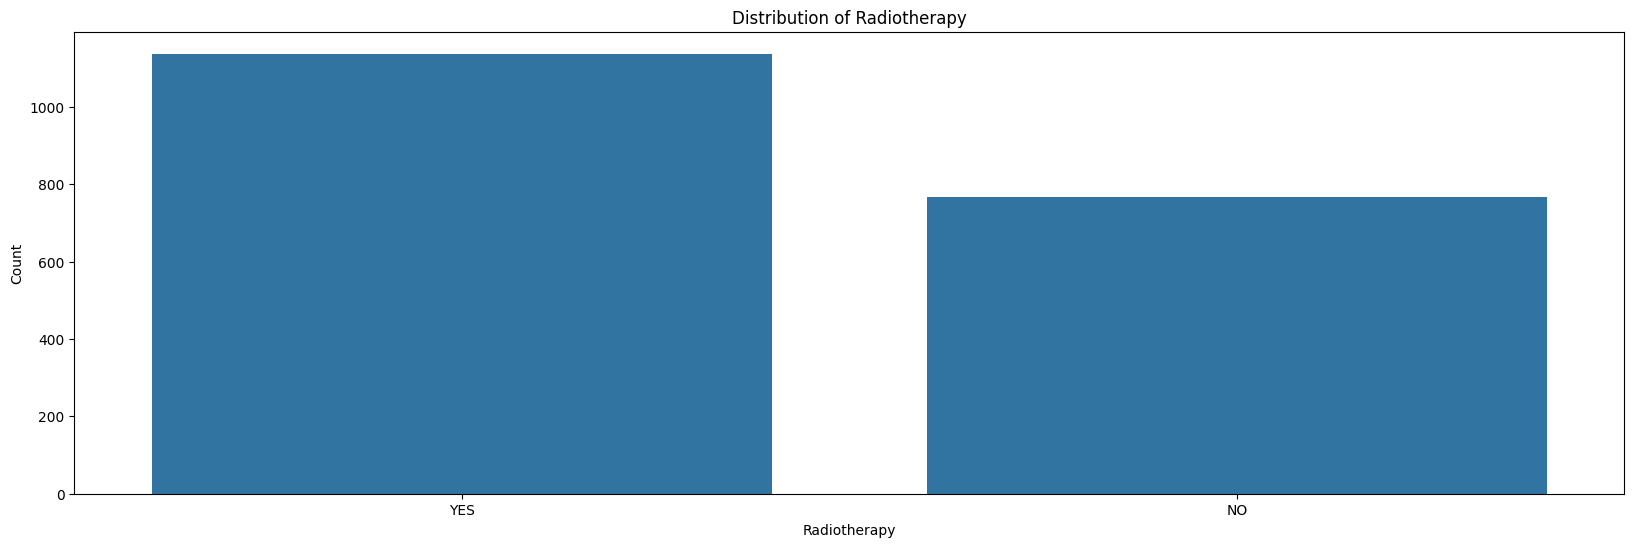

Radiotherapy Distribution:
YES    1137
NO      767
Name: Radiotherapy, dtype: int64


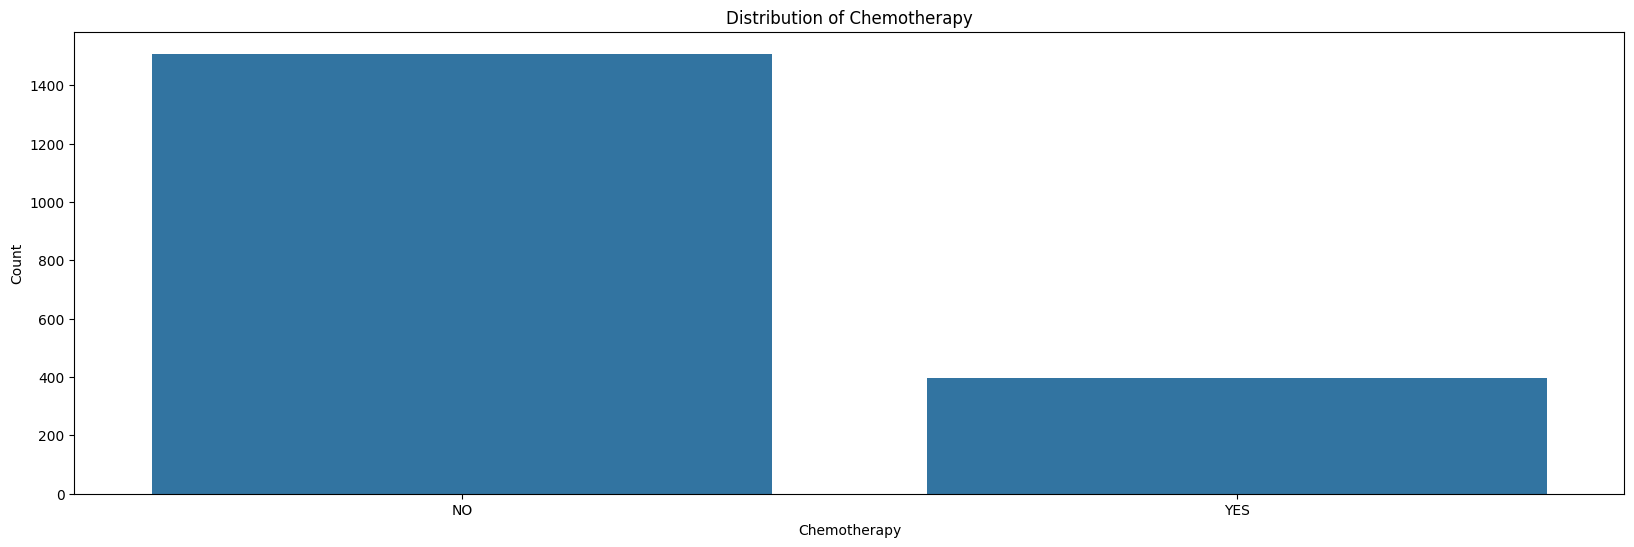

Chemotherapy Distribution:
NO     1508
YES     396
Name: Chemotherapy, dtype: int64


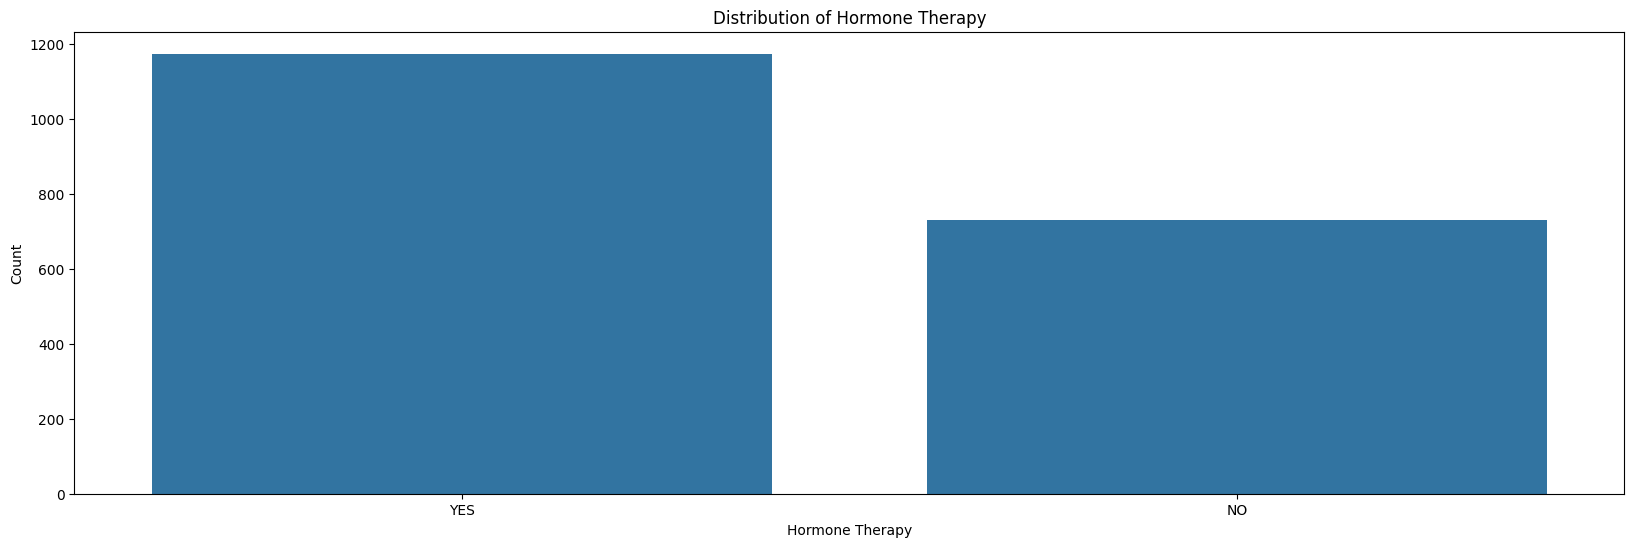

Hormone Therapy Distribution:
YES    1174
NO      730
Name: Hormone_Therapy, dtype: int64


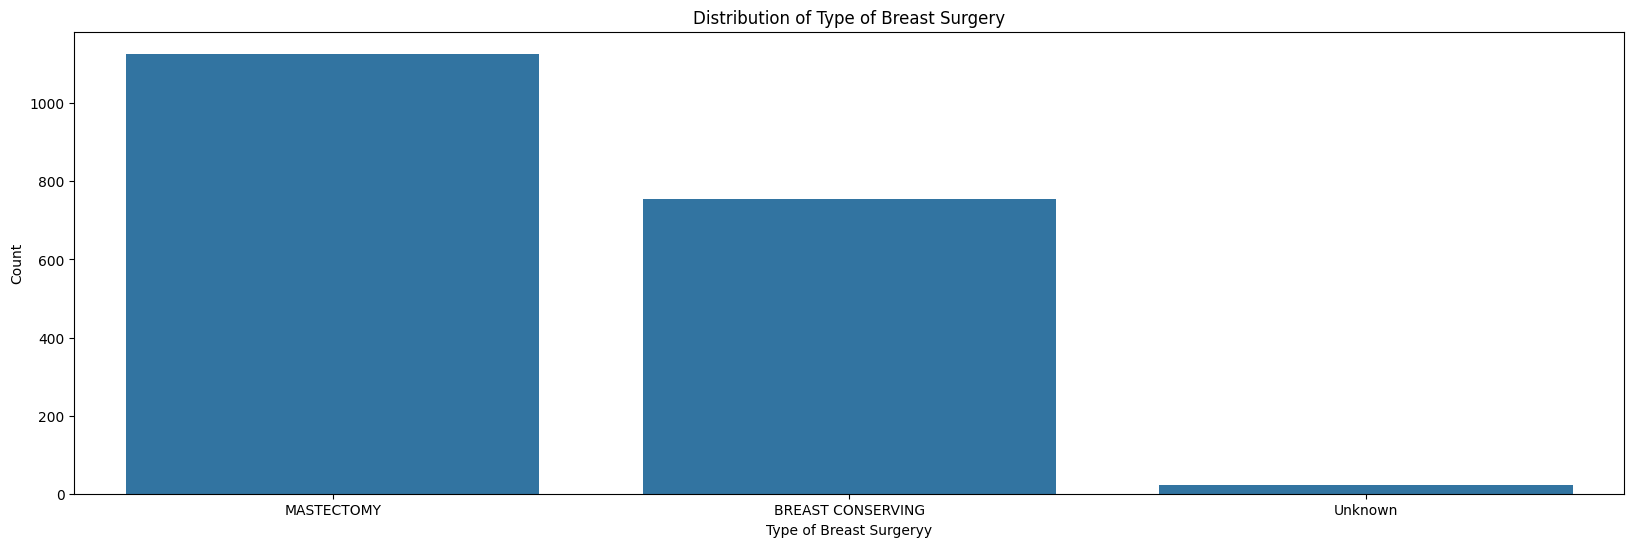

Type of Breast Surgery Distribution:
MASTECTOMY           1127
BREAST CONSERVING     755
Unknown                22
Name: Type_of_Breast_Surgery, dtype: int64


In [ ]:
# Univariate Analysis
    # Histogram of Therapy Methods distribution
plt.figure(figsize=(20, 6))
sns.countplot(x='Radiotherapy', data=df_cleaned)
plt.title('Distribution of Radiotherapy')
plt.xlabel('Radiotherapy')
plt.ylabel('Count')
plt.show()

cancer_type_counts = df_cleaned['Radiotherapy'].value_counts()
print("Radiotherapy Distribution:")
print(cancer_type_counts)

plt.figure(figsize=(20, 6))
sns.countplot(x='Chemotherapy', data=df_cleaned)
plt.title('Distribution of Chemotherapy')
plt.xlabel('Chemotherapy')
plt.ylabel('Count')
plt.show()

cancer_type_counts = df_cleaned['Chemotherapy'].value_counts()
print("Chemotherapy Distribution:")
print(cancer_type_counts)

plt.figure(figsize=(20, 6))
sns.countplot(x='Hormone_Therapy', data=df_cleaned)
plt.title('Distribution of Hormone Therapy')
plt.xlabel('Hormone Therapy')
plt.ylabel('Count')
plt.show()

cancer_type_counts = df_cleaned['Hormone_Therapy'].value_counts()
print("Hormone Therapy Distribution:")
print(cancer_type_counts)

plt.figure(figsize=(20, 6))
sns.countplot(x='Type_of_Breast_Surgery', data=df_cleaned)
plt.title('Distribution of Type of Breast Surgery')
plt.xlabel('Type of Breast Surgeryy')
plt.ylabel('Count')
plt.show()

cancer_type_counts = df_cleaned['Type_of_Breast_Surgery'].value_counts()
print("Type of Breast Surgery Distribution:")
print(cancer_type_counts)

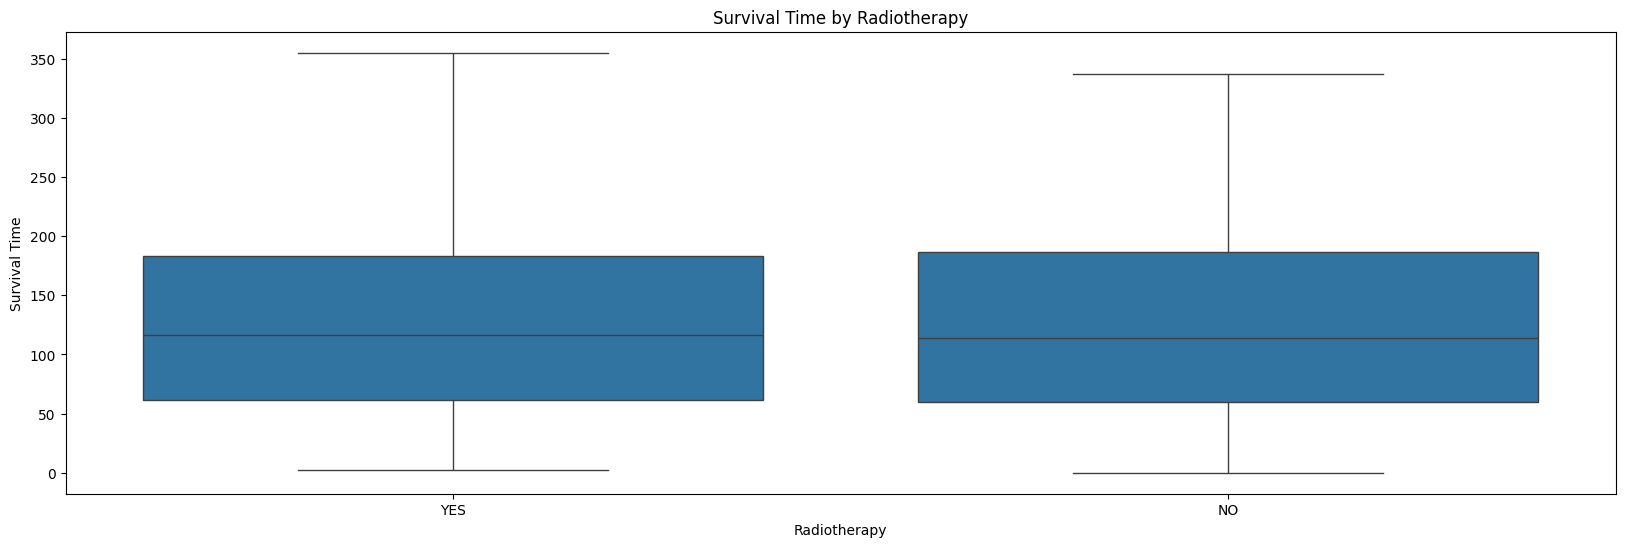


Survival Time Summary by Radiotherapy:
               count        mean        std  min        25%         50%  \
Radiotherapy                                                              
NO             767.0  125.662321  77.962948  0.0  60.200000  113.666667   
YES           1137.0  124.756376  75.247839  2.0  61.333333  116.633333   

                     75%         max  
Radiotherapy                          
NO            186.616667  337.033333  
YES           182.933333  355.200000  
Frequency Table for Radiotherapy and Vital Status:
Vital_status  Died of Disease  Died of Other Causes  Living  Unknown
Radiotherapy                                                        
NO                        246                   250     271        0
YES                       376                   230     530        1


In [ ]:
# Bivariate Analysis
    # Box plot of Survival Time vs. Therapy Method
plt.figure(figsize=(20, 6))
sns.boxplot(x='Radiotherapy', y='Survival_time', data=df_cleaned)
plt.title('Survival Time by Radiotherapy')
plt.xlabel('Radiotherapy')
plt.ylabel('Survival Time')
plt.show()

survival_time_summary = df_cleaned.groupby('Radiotherapy')['Survival_time'].describe()
print("\nSurvival Time Summary by Radiotherapy:")
print(survival_time_summary)

# Create a frequency table for the 'Radiotherapy' variable
frequency_table = pd.crosstab(index=df_cleaned['Radiotherapy'], columns=df_cleaned['Vital_status'])

# Print the frequency table
print("Frequency Table for Radiotherapy and Vital Status:")
print(frequency_table)

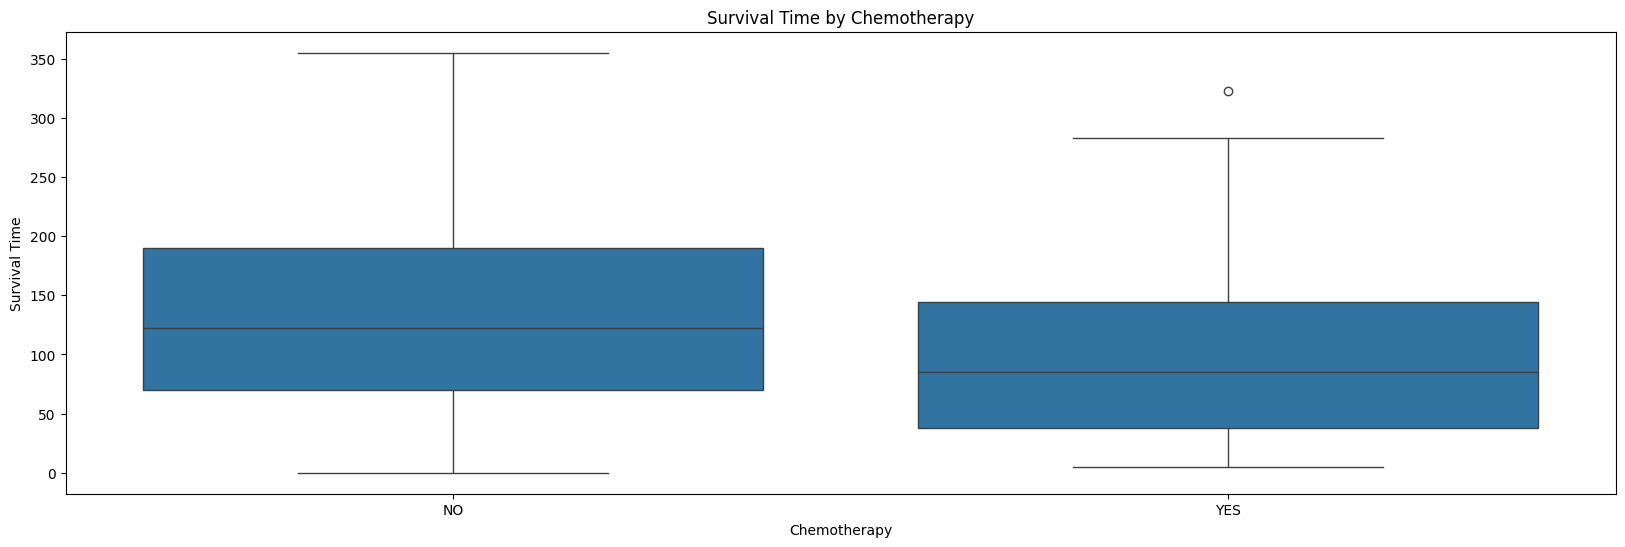


Survival Time Summary by Chemotherapy:
               count        mean        std       min        25%     50%  \
Chemotherapy                                                               
NO            1508.0  131.376503  75.964521  0.000000  70.000000  122.30   
YES            396.0  101.301094  73.063046  5.066667  38.108333   85.35   

                     75%         max  
Chemotherapy                          
NO            190.116667  355.200000  
YES           144.691667  322.833333  
Frequency Table for Chemotherapy and Survival Status:
Vital_status  Died of Disease  Died of Other Causes  Living  Unknown
Chemotherapy                                                        
NO                        433                   457     617        1
YES                       189                    23     184        0


In [ ]:
plt.figure(figsize=(20, 6))
sns.boxplot(x='Chemotherapy', y='Survival_time', data=df_cleaned)
plt.title('Survival Time by Chemotherapy')
plt.xlabel('Chemotherapy')
plt.ylabel('Survival Time')
plt.show()

survival_time_summary = df_cleaned.groupby('Chemotherapy')['Survival_time'].describe()
print("\nSurvival Time Summary by Chemotherapy:")
print(survival_time_summary)

# Create a frequency table for the 'Chemotherapy' variable
frequency_table = pd.crosstab(index=df_cleaned['Chemotherapy'], columns=df_cleaned['Vital_status'])

# Print the frequency table
print("Frequency Table for Chemotherapy and Survival Status:")
print(frequency_table)

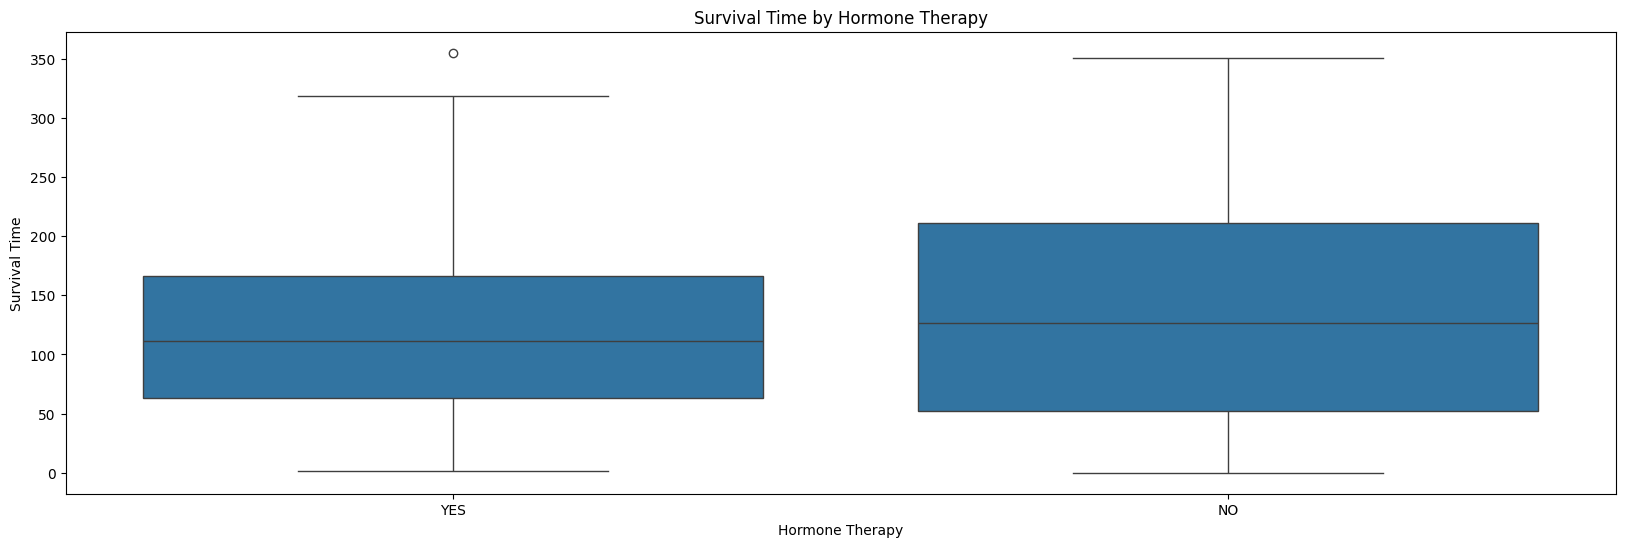


Survival Time Summary by Hormone Therapy:
                  count        mean        std       min        25%  \
Hormone_Therapy                                                       
NO                730.0  135.359087  87.166915  0.000000  52.091667   
YES              1174.0  118.755423  68.009781  1.266667  63.500000   

                        50%         75%    max  
Hormone_Therapy                                 
NO               126.966667  210.966667  351.0  
YES              111.666667  166.508333  355.2  
Frequency Table for Hormone Therapy and Survival Status:
Vital_status     Died of Disease  Died of Other Causes  Living  Unknown
Hormone_Therapy                                                        
NO                           247                   161     321        1
YES                          375                   319     480        0


In [ ]:
plt.figure(figsize=(20, 6))
sns.boxplot(x='Hormone_Therapy', y='Survival_time', data=df_cleaned)
plt.title('Survival Time by Hormone Therapy')
plt.xlabel('Hormone Therapy')
plt.ylabel('Survival Time')
plt.show()

survival_time_summary = df_cleaned.groupby('Hormone_Therapy')['Survival_time'].describe()
print("\nSurvival Time Summary by Hormone Therapy:")
print(survival_time_summary)

# Create a frequency table for the 'Hormonetherapy' variable
frequency_table = pd.crosstab(index=df['Hormone_Therapy'], columns=df_cleaned['Vital_status'])

# Print the frequency table
print("Frequency Table for Hormone Therapy and Survival Status:")
print(frequency_table)

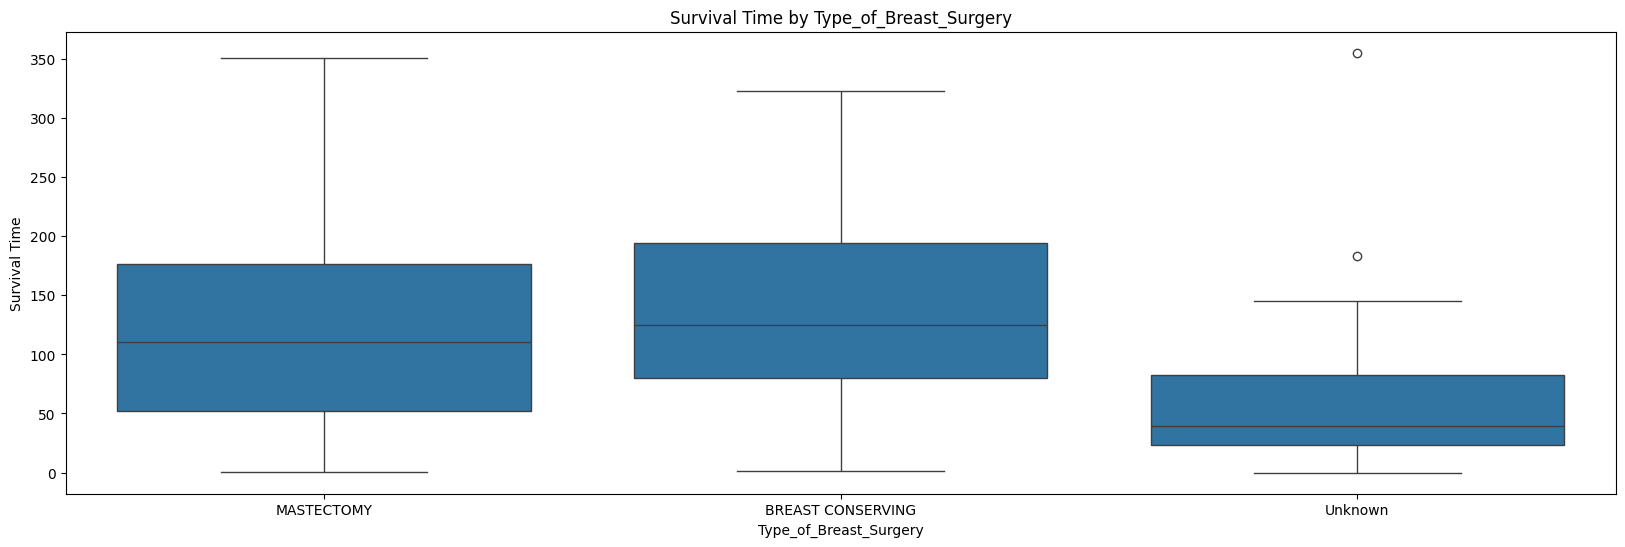


Survival Time Summary by Type_of_Breast_Surgery:
                         count        mean        std       min        25%  \
Type_of_Breast_Surgery                                                       
BREAST CONSERVING        755.0  134.761104  73.932203  1.266667  80.100000   
MASTECTOMY              1127.0  119.795001  76.865215  0.100000  52.016667   
Unknown                   22.0   67.154545  81.209974  0.000000  23.025000   

                               50%         75%         max  
Type_of_Breast_Surgery                                      
BREAST CONSERVING       124.766667  193.950000  322.833333  
MASTECTOMY              110.100000  176.366667  351.000000  
Unknown                  39.083333   82.183333  355.200000  
Frequency Table for Type_of_Breast_Surgery and Survival Status:
Vital_status            Died of Disease  Died of Other Causes  Living  Unknown
Type_of_Breast_Surgery                                                        
BREAST CONSERVING               

In [ ]:
plt.figure(figsize=(20, 6))
sns.boxplot(x='Type_of_Breast_Surgery', y='Survival_time', data=df_cleaned)
plt.title('Survival Time by Type_of_Breast_Surgery')
plt.xlabel('Type_of_Breast_Surgery')
plt.ylabel('Survival Time')
plt.show()

survival_time_summary = df_cleaned.groupby('Type_of_Breast_Surgery')['Survival_time'].describe()
print("\nSurvival Time Summary by Type_of_Breast_Surgery:")
print(survival_time_summary)

# Create a frequency table for the 'Hormonetherapy' variable
frequency_table = pd.crosstab(index=df['Type_of_Breast_Surgery'], columns=df_cleaned['Vital_status'])

# Print the frequency table
print("Frequency Table for Type_of_Breast_Surgery and Survival Status:")
print(frequency_table)

(Findings beschreiben --> Xenia)

In [ ]:
# Multivariate Analysis
    # Scatter plot of Survival Rate vs. Therapy Method

# Create a frequency table for multiple variables using crosstab
frequency_table1 = pd.crosstab(index=[df_cleaned['Radiotherapy'], df_cleaned['Chemotherapy'], df_cleaned['Hormone_Therapy'], df_cleaned['Type_of_Breast_Surgery']],
                              columns=df_cleaned['Vital_status'])


    # Create a frequency table for multiple variables using crosstab
frequency_table2 = pd.crosstab(index=[df_cleaned['Radiotherapy'], df_cleaned['Chemotherapy'], df_cleaned['Hormone_Therapy'], df_cleaned['Type_of_Breast_Surgery']],
                              columns=df_cleaned['Vital_status'],
                              margins=True,
                              normalize= 'all')
# Print the frequency table
print("\nFrequency Table for Radiotherapy, Chemotherapy, Hormone Therapy, Type_of_Breast_Surgery and Survival_status:")
print(frequency_table1)

print("\nFrequency Table for Radiotherapy, Chemotherapy, Hormone Therapy and Survival_status (Percentage):")
print(frequency_table2)

survival_time_by_chemotherapy_radiotherapy = df.groupby(['Chemotherapy', 'Radiotherapy', 'Hormone_Therapy', 'Type_of_Breast_Surgery'])['Survival_time'].agg(['mean', 'median'])
print("\nSurvival Time Summary by Chemotherapy, Type_of_Breast_Surgery and Radiotherapy:")
print(survival_time_by_chemotherapy_radiotherapy)

frequency_table3 = frequency_table1['Living'] - frequency_table1['Died of Disease']

print("\nDifference between Living and Died of Desease:")
print(frequency_table3)



Frequency Table for Radiotherapy, Chemotherapy, Hormone Therapy, Type_of_Breast_Surgery and Survival_status:
Vital_status                                                      Died of Disease  \
Radiotherapy Chemotherapy Hormone_Therapy Type_of_Breast_Surgery                    
NO           NO           NO              BREAST CONSERVING                     5   
                                          MASTECTOMY                           75   
                                          Unknown                               2   
                          YES             BREAST CONSERVING                     7   
                                          MASTECTOMY                          114   
                                          Unknown                               0   
             YES          NO              BREAST CONSERVING                     3   
                                          MASTECTOMY                           21   
                                        

**Findings:** The distribution of treatment modalities and types of breast surgery among the studied population reveals notable patterns:

- Radiotherapy Distribution: Among the individuals included in the study, 1137 opted for radiotherapy, while 767 did not. This suggests that radiotherapy was a commonly chosen treatment modality.

- Chemotherapy Distribution: In the study group, 396 individuals received chemotherapy, while 1508 did not. While chemotherapy was utilized, it was less frequently opted for compared to radiotherapy.

- Hormone Therapy Distribution: Hormone therapy was administered to 1174 individuals, with 730 opting out. This indicates a prevalent use of hormone therapy among the studied population.

- Type of Breast Surgery Distribution: Among the cases with known surgical interventions, 1127 underwent mastectomy, while 755 chose breast-conserving surgery. Additionally, 22 cases had an unknown type of surgery. This suggests that mastectomy was the more common surgical approach, although a significant number of individuals opted for breast-conserving surgery as well.

The variations in survival times based on treatment modalities and types of breast surgery suggest that patients who received chemotherapy and hormone therapy alongside breast-conserving surgery tended to have shorter survival times compared to those who underwent mastectomy.The comparison between living and deceased patients based on treatment modalities and types of breast surgery reveals varying degrees of difference in survival outcomes, emphasizing the impact of treatment choices on disease prognosis.

These findings collectively indicate a preference for radiotherapy and hormone therapy among the treatment modalities studied. Additionally, while mastectomy was more common, breast-conserving surgery was also a considerable choice, highlighting the importance of diverse treatment options in breast cancer management. In conclusion, these results underscore the complexity of breast cancer treatment decisions and their impact on patient survival, emphasizing the need for personalized treatment strategies tailored to individual patient characteristics and preferences.

In [ ]:
# Contingency table for Chi-square test
contingency_table = pd.crosstab(df_cleaned['Chemotherapy'], df_cleaned['Survival_status'])

# Perform chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-square test results:")
print(f"Chi2 statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies table:")
print(expected)

Chi-square test results:
Chi2 statistic: 3.7389561632643087
P-value: 0.053157643797375365
Degrees of freedom: 1
Expected frequencies table:
[[873.59453782 634.40546218]
 [229.40546218 166.59453782]]


In [ ]:
# Contingency table for Chi-square test
contingency_table = pd.crosstab(df_cleaned['Radiotherapy'], df_cleaned['Survival_status'])

# Perform chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-square test results:")
print(f"Chi2 statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies table:")
print(expected)

Chi-square test results:
Chi2 statistic: 23.45834704265917
P-value: 1.2764768402887305e-06
Degrees of freedom: 1
Expected frequencies table:
[[444.3282563 322.6717437]
 [658.6717437 478.3282563]]


In [ ]:
# Contingency table for Chi-square test
contingency_table = pd.crosstab(df_cleaned['Hormone_Therapy'], df_cleaned['Hormone_Therapy'])

# Perform chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-square test results:")
print(f"Chi2 statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies table:")
print(expected)

Chi-square test results:
Chi2 statistic: 1899.77232444037
P-value: 0.0
Degrees of freedom: 1
Expected frequencies table:
[[279.88445378 450.11554622]
 [450.11554622 723.88445378]]


In [ ]:
# Contingency table for Chi-square test
contingency_table = pd.crosstab(df_cleaned['Type_of_Breast_Surgery'], df_cleaned['Type_of_Breast_Surgery'])

# Perform chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-square test results:")
print(f"Chi2 statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies table:")
print(expected)

Chi-square test results:
Chi2 statistic: 3808.000000000001
P-value: 0.0
Degrees of freedom: 4
Expected frequencies table:
[[2.99382878e+02 4.46893382e+02 8.72373950e+00]
 [4.46893382e+02 6.67084559e+02 1.30220588e+01]
 [8.72373950e+00 1.30220588e+01 2.54201681e-01]]


(Findings beschreiben --> Xenia)

(Summary der Erkenntnisse und Überleitung zum Modelling-Part)

<hr style="border:2px solid gray"> <!-- Thick horizontal line -->

<a id='data-pre-processing'></a>
# Data Pre-Processing


In this section, the focus lies on preparing the dataset specifically for predictive modeling tasks. This involves several key steps: **encoding categorical variables**, **ensuring all variables are on a similar scale to prevent bias towards larger scales**, **selecting relevant features that contribute most to predictive performance**, and **addressing imbalances in the dataset, particularly in classification tasks, to avoid bias towards the majority class**. Overall, the objective of this section is to ensure the dataset is suitably structured and cleaned to facilitate accurate and effective predictive modeling.

In [ ]:
# Recalculate Integrative clusters (object -> int)

df_cleaned["Integrative_cluster"] = df_cleaned["Integrative_cluster"].replace({"1": 0, "2": 1, "3": 2, "4ER-": 3, "4ER+": 4}).astype(int)

In [ ]:
# Encode all categorical variables

df_cleaned_SAFE = df_cleaned.copy()

# list of categorical variables
categorical_vars = ['Survival_status', 'Vital_status', 'Chemotherapy', 'Radiotherapy', 'Type_of_Breast_Surgery', 'Hormone_Therapy', 'Cancer_Type_Detailed',
                    'ER_status', 'PR_status', 'HER2_status', 'HER2_status_measured_by_SNP6', 'PAM50', 'Cellularity', 'Tumor_Other_Histologic_Subtype', 'Inferred_Menopausal_State',
                    'Primary_Tumor_Laterality', 'Oncotree_Code', 'Relapse_Free_Status', 'Is_Age_below_Median']

label_encoder = LabelEncoder()
for column in categorical_vars:
    df_cleaned_SAFE[column + '_encoded'] = label_encoder.fit_transform(df_cleaned_SAFE[column])

df_cleaned_SAFE.head(3)

Patient_ID  Cohort  Age_at_diagnosis  Survival_time Survival_status  \
0    MB-0000       1             75.65     140.500000          LIVING   
1    MB-0002       1             43.19      84.633333          LIVING   
2    MB-0005       1             48.87     163.700000        DECEASED   

      Vital_status Chemotherapy Radiotherapy  Tumour_size  Tumour_stage  \
0           Living           NO          YES         22.0           2.0   
1           Living           NO          YES         10.0           1.0   
2  Died of Disease          YES           NO         15.0           2.0   

   Neoplasm_histologic_grade  Lymph_nodes_examined_positive  \
0                        3.0                             10   
1                        3.0                              0   
2                        2.0                              1   

   Lymph_node_status ER_status PR_status HER2_status  \
0                  3  Positive  Negative    Negative   
1                  1  Positive  Positive    Negative   
2                  2  Positive  Positive    Negative   

  HER2_status_measured_by_SNP6        PAM50  Nottingham_prognostic_index  \
0                      NEUTRAL  claudin-low                        6.044   
1                      NEUTRAL         LumA                        4.020   
2                      NEUTRAL         LumB                        4.030   

  Cellularity  Integrative_cluster  Mutation_count       ESR1     ERBB2  \
0     Unknown                    4             5.0   8.929817  9.333972   
1        High                    4             2.0  10.047059  9.729606   
2        High                    2             2.0  10.041281  9.725825   

        PGR      TP53    PIK3CA      GATA3      FOXA1       MLPH  \
0  5.680501  6.338739  5.704157   6.932146   7.953794   9.729728   
1  7.505424  6.192507  5.757727  11.251197  11.843989  12.536570   
2  7.376123  6.404516  6.751566   9.289758  11.698169  10.306115   

  Type_of_Breast_Surgery              Cancer_Type_Detailed  \
0             MASTECTOMY  Breast Invasive Ductal Carcinoma   
1      BREAST CONSERVING  Breast Invasive Ductal Carcinoma   
2             MASTECTOMY  Breast Invasive Ductal Carcinoma   

  Tumor_Other_Histologic_Subtype Hormone_Therapy Inferred_Menopausal_State  \
0                     Ductal/NST             YES                      Post   
1                     Ductal/NST             YES                       Pre   
2                     Ductal/NST             YES                       Pre   

  Primary_Tumor_Laterality Oncotree_Code  Replapse_Free_Status_Months  \
0                    Right           IDC                       138.65   
1                    Right           IDC                        83.52   
2                    Right           IDC                       151.28   

  Relapse_Free_Status  TMB_nonsynonymous Is_Age_below_Median  \
0      0:Not Recurred           0.000000                  No   
1      0:Not Recurred           2.615035                 Yes   
2          1:Recurred           2.615035                 Yes   

   Survival_status_encoded  Vital_status_encoded  Chemotherapy_encoded  \
0                        1                     2                     0   
1                        1                     2                     0   
2                        0                     0                     1   

   Radiotherapy_encoded  Type_of_Breast_Surgery_encoded  \
0                     1                               1   
1                     1                               0   
2                     0                               1   

   Hormone_Therapy_encoded  Cancer_Type_Detailed_encoded  ER_status_encoded  \
0                        1                             1                  1   
1                        1                             1                  1   
2                        1                             1                  1   

   PR_status_encoded  HER2_status_encoded  \
0                  0                    0  

In [ ]:
label_encoder = LabelEncoder()
for column in categorical_vars:
    df_cleaned[column] = label_encoder.fit_transform(df_cleaned[column])

df_cleaned.head(3)

Patient_ID  Cohort  Age_at_diagnosis  Survival_time  Survival_status  \
0    MB-0000       1             75.65     140.500000                1   
1    MB-0002       1             43.19      84.633333                1   
2    MB-0005       1             48.87     163.700000                0   

   Vital_status  Chemotherapy  Radiotherapy  Tumour_size  Tumour_stage  \
0             2             0             1         22.0           2.0   
1             2             0             1         10.0           1.0   
2             0             1             0         15.0           2.0   

   Neoplasm_histologic_grade  Lymph_nodes_examined_positive  \
0                        3.0                             10   
1                        3.0                              0   
2                        2.0                              1   

   Lymph_node_status  ER_status  PR_status  HER2_status  \
0                  3          1          0            0   
1                  1          1          1            0   
2                  2          1          1            0   

   HER2_status_measured_by_SNP6  PAM50  Nottingham_prognostic_index  \
0                             2      6                        6.044   
1                             2      2                        4.020   
2                             2      3                        4.030   

   Cellularity  Integrative_cluster  Mutation_count       ESR1     ERBB2  \
0            3                    4             5.0   8.929817  9.333972   
1            0                    4             2.0  10.047059  9.729606   
2            0                    2             2.0  10.041281  9.725825   

        PGR      TP53    PIK3CA      GATA3      FOXA1       MLPH  \
0  5.680501  6.338739  5.704157   6.932146   7.953794   9.729728   
1  7.505424  6.192507  5.757727  11.251197  11.843989  12.536570   
2  7.376123  6.404516  6.751566   9.289758  11.698169  10.306115   

   Type_of_Breast_Surgery  Cancer_Type_Detailed  \
0                       1                     1   
1                       0                     1   
2                       1                     1   

   Tumor_Other_Histologic_Subtype  Hormone_Therapy  Inferred_Menopausal_State  \
0                               0                1                          0   
1                               0                1                          1   
2                               0                1                          1   

   Primary_Tumor_Laterality  Oncotree_Code  Replapse_Free_Status_Months  \
0                         1              2                       138.65   
1                         1              2                        83.52   
2                         1              2                       151.28   

   Relapse_Free_Status  TMB_nonsynonymous  Is_Age_below_Median  
0                    0           0.000000                    0  
1                    0           2.615035                    1  
2                    1           2.615035                    1

In [ ]:
# drop Patient_ID
#df_cleaned = df_cleaned.drop(columns=["Patient_ID"])

# Z-scales
#scaler = StandardScaler()
#scaled_gene_data = scaler.fit_transform(df_cleaned)

# Überprüfen der aktualisierten DataFrame
#df_cleaned.head()

In [ ]:
# Extract columns with gene expressions
gene_columns = ['ESR1', 'PGR', 'TP53', 'ERBB2', 'PIK3CA', 'GATA3', 'FOXA1', 'MLPH']
gene_data = df_cleaned[gene_columns]

# Z-scales for gene expressions
scaler = StandardScaler()
scaled_gene_data = scaler.fit_transform(gene_data)

# replace original values
df_cleaned[gene_columns] = scaled_gene_data

# Überprüfen der aktualisierten DataFrame
df_cleaned.head()

Patient_ID  Cohort  Age_at_diagnosis  Survival_time  Survival_status  \
0    MB-0000       1             75.65     140.500000                1   
1    MB-0002       1             43.19      84.633333                1   
2    MB-0005       1             48.87     163.700000                0   
3    MB-0006       1             47.68     164.933333                1   
4    MB-0008       1             76.97      41.366667                0   

   Vital_status  Chemotherapy  Radiotherapy  Tumour_size  Tumour_stage  \
0             2             0             1         22.0           2.0   
1             2             0             1         10.0           1.0   
2             0             1             0         15.0           2.0   
3             2             1             1         25.0           2.0   
4             0             1             1         40.0           2.0   

   Neoplasm_histologic_grade  Lymph_nodes_examined_positive  \
0                        3.0                             10   
1                        3.0                              0   
2                        2.0                              1   
3                        2.0                              3   
4                        3.0                              8   

   Lymph_node_status  ER_status  PR_status  HER2_status  \
0                  3          1          0            0   
1                  1          1          1            0   
2                  2          1          1            0   
3                  2          1          1            0   
4                  3          1          1            0   

   HER2_status_measured_by_SNP6  PAM50  Nottingham_prognostic_index  \
0                             2      6                        6.044   
1                             2      2                        4.020   
2                             2      3                        4.030   
3                             2      3                        4.050   
4                             2      3                        6.080   

   Cellularity  Integrative_cluster  Mutation_count      ESR1     ERBB2  \
0            3                    4             5.0 -0.317826 -1.054819   
1            0                    4             2.0  0.205898 -0.763269   
2            0                    2             2.0  0.203189 -0.766055   
3            2                    9             1.0  0.373541 -0.317159   
4            0                    9             2.0  0.782254 -0.596238   

        PGR      TP53    PIK3CA     GATA3     FOXA1      MLPH  \
0 -0.545464  0.350391 -0.754534 -1.711287 -1.623160 -0.967722   
1  1.242619 -0.013589 -0.602544  1.163786  0.594965  0.695974   
2  1.115929  0.514114  2.217209 -0.141889  0.511822 -0.626081   
3  0.566757  1.670843  3.543957 -0.555961  0.606021 -0.527649   
4  1.071934  0.348430 -0.432050  0.144365  0.470105  0.473932   

   Type_of_Breast_Surgery  Cancer_Type_Detailed  \
0                       1                     1   
1                       0                     1   
2                       1                     1   
3                       1                     4   
4                       1                     4   

   Tumor_Other_Histologic_Subtype  Hormone_Therapy  Inferred_Menopausal_State  \
0                               0                1                          0   
1                               0                1                          1   
2                               0                1                          1   
3                               4                1                          1   
4                               4                1                          0   

   Primary_Tumor_Laterality  Oncotree_Code  Replapse_Free_Status_Months  \
0                         1              2                       138.65   
1                         1              2                        83.52   
2                         1              2                       151.28   
3              

In [ ]:
# drop Patient_ID
df_cleaned = df_cleaned.drop(columns=["Patient_ID"])

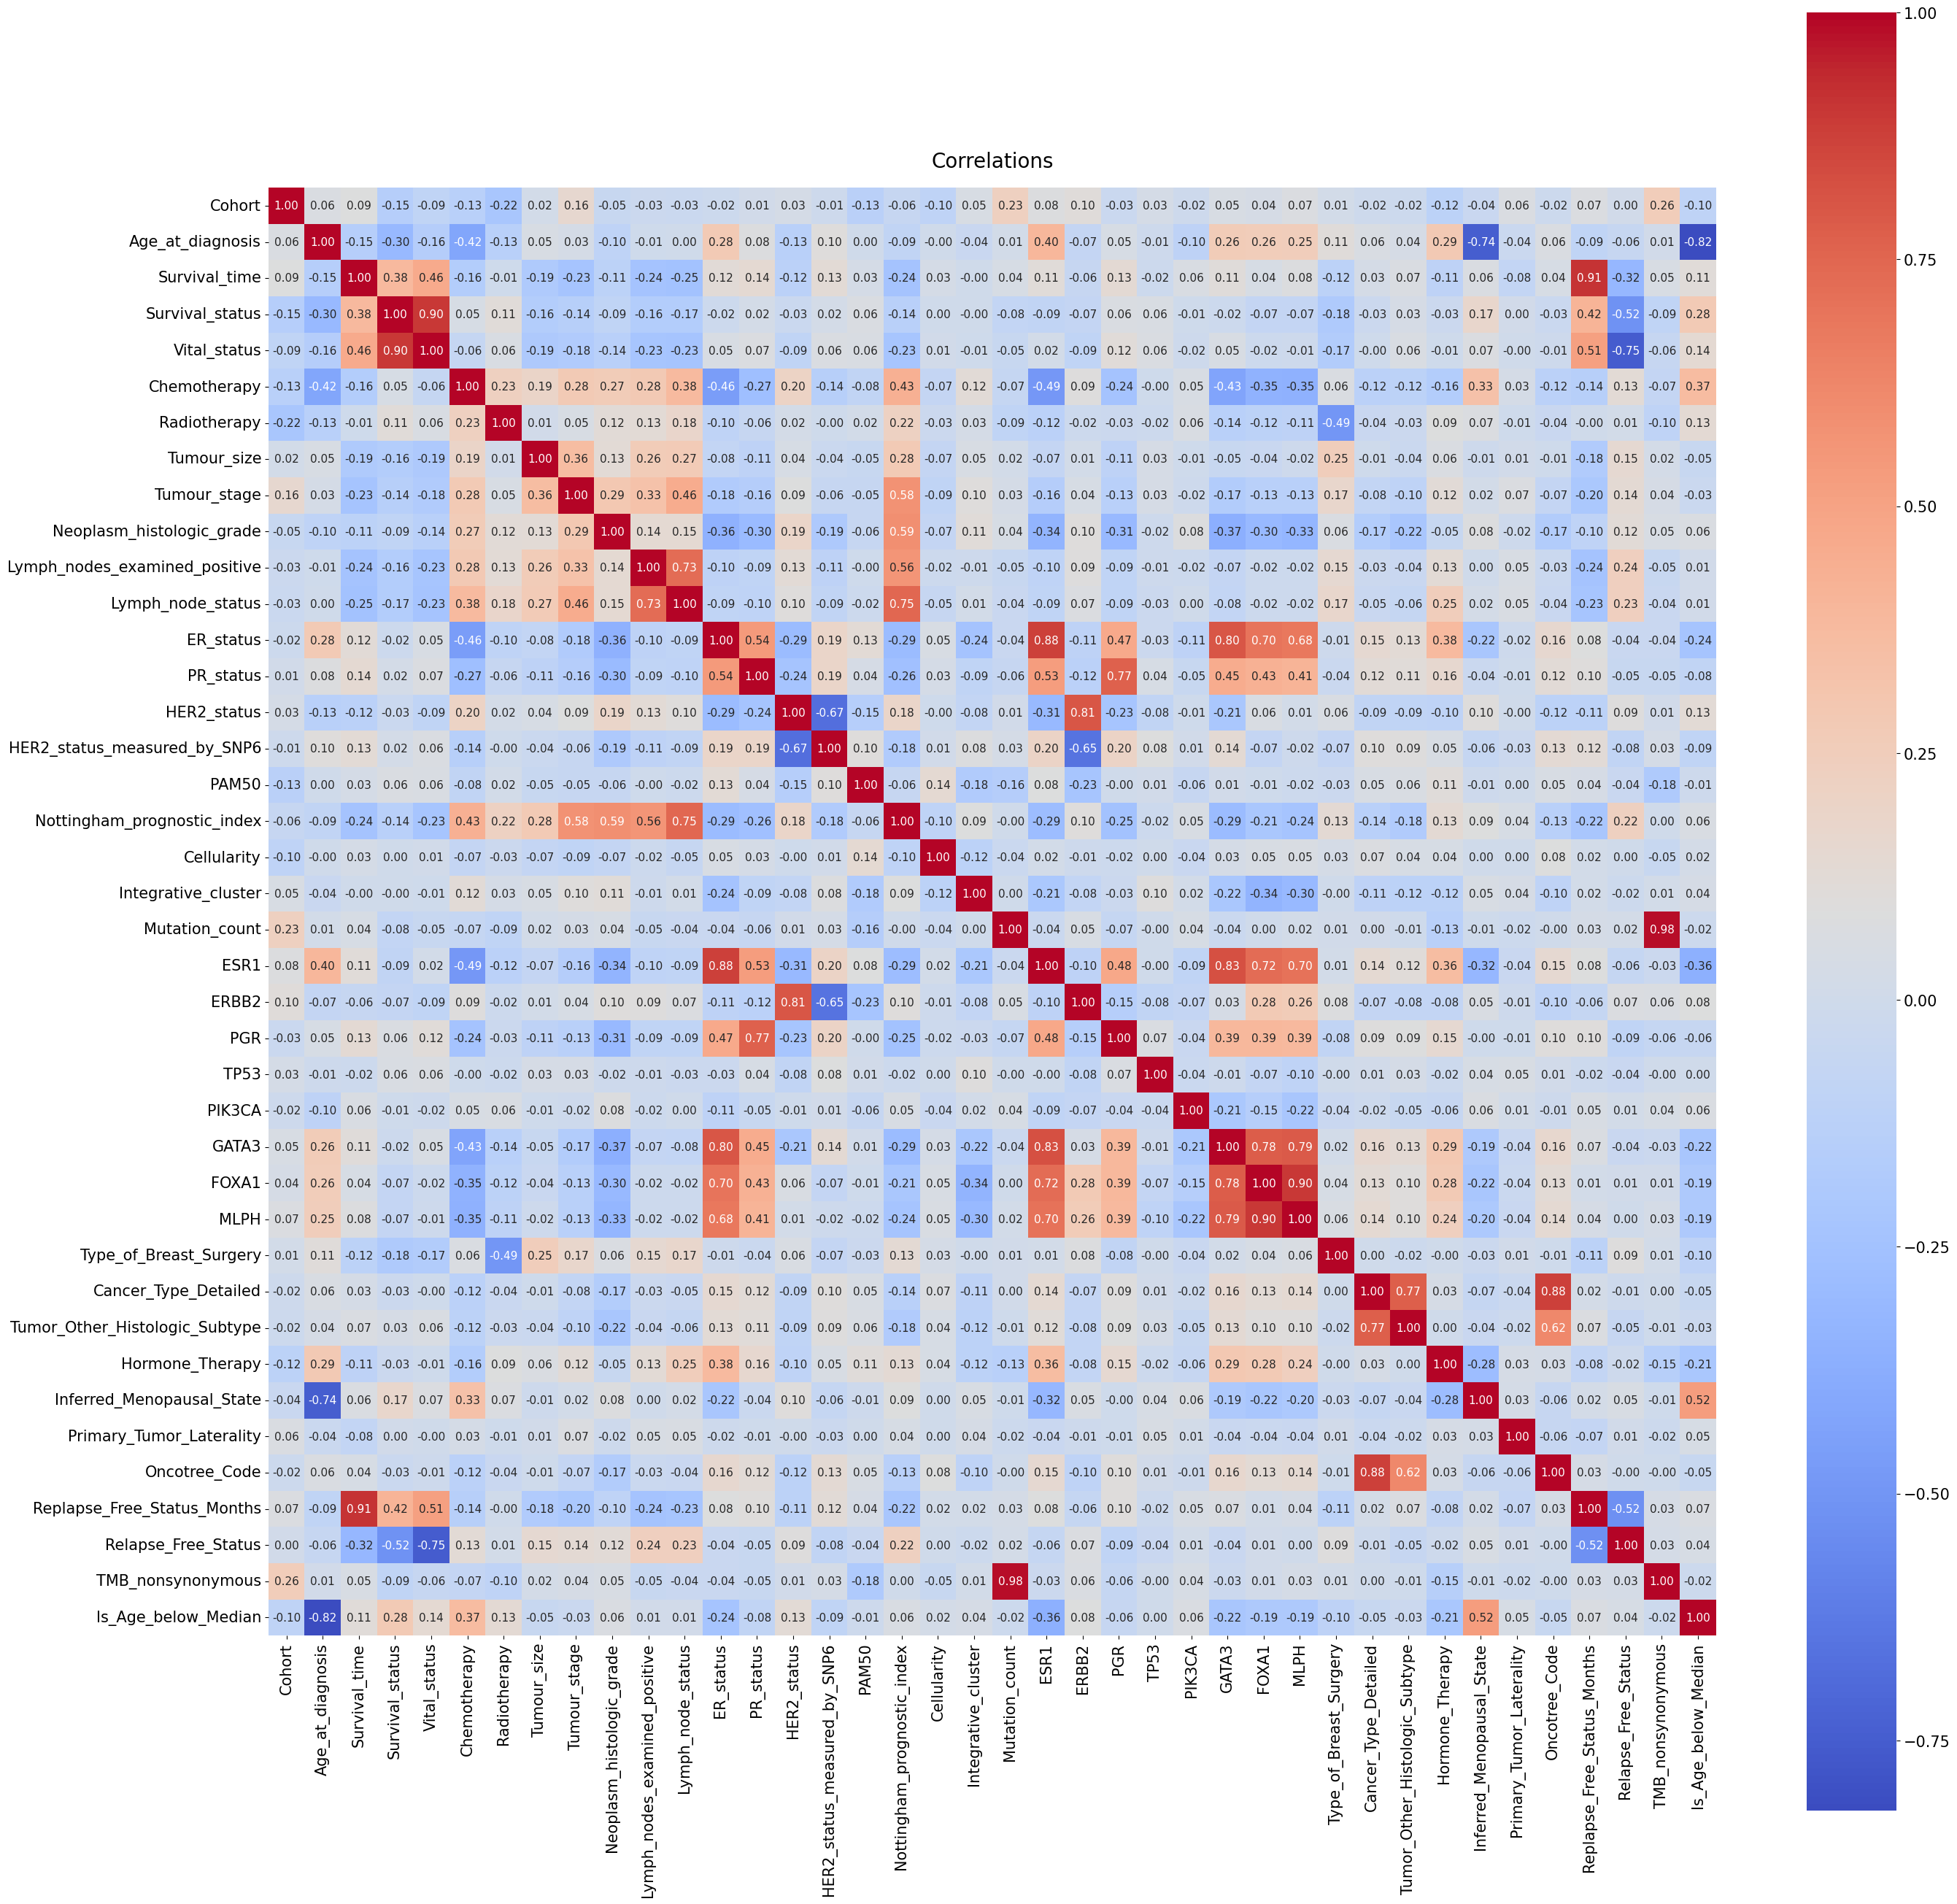

In [ ]:
fig = plt.figure(figsize=(32, 32), dpi=100)

ax = sns.heatmap(df_cleaned.corr(), annot=True, square=True, cmap='coolwarm', annot_kws={'size': 11},  fmt='.2f')
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=15)

plt.tick_params(axis='x', labelsize=15, rotation=90)
plt.tick_params(axis='y', labelsize=15, rotation=0)
plt.title('Correlations', size=20, pad=20)

plt.show()

Now that all columns contain numerical data, correlations among them can be computed. Darker colors within the correlation matrix indicate strong correlation, implying that one of the correlated columns should be dropped as they are (highly) interrelated.

We will keep age instead of the variables "Is_Age_below_Median" and "Inferred_Menopausal_State" as it provides the most information, being discrete.
"Survival_time", "survival_status", "Relapse_Free_Status_Months", and "Relapse_Free_Status" will be dropped due to their correlations with the dependent variable "Vital_status".
"Lymph_node_status" will be dropped as it is an aggregate of "Lymph_node_examined_postitive", which contains more detailed information.
"Nottingham prognostic index" will be removed as it already considers tumor size and lymph node status.
"HER2_status_measured_by_SNP6" will be dropped due to unknown values, favoring the retention of "HER2_status".
"TMB_nonsynonymous" will be removed as it is derived from "mutation_count".
"Tumor_Other_Histologic_Subtype" and "Oncotree_Code" will be dropped due to redundancy with "Tumour_type_detailed".

In [ ]:
# Drop columns that are highly correlated to other columns

drop_columns = ['TMB_nonsynonymous', 'Oncotree_Code', 'Tumor_Other_Histologic_Subtype', 'HER2_status_measured_by_SNP6', 'Is_Age_below_Median', 'Inferred_Menopausal_State', 'Survival_status', 'Survival_time', 'Relapse_Free_Status', 'Lymph_node_status', 'Replapse_Free_Status_Months', 'Nottingham_prognostic_index']

In [ ]:
filtered_data_num = df_cleaned.copy()

In [ ]:
filtered_data_num.drop(columns=drop_columns, inplace=True)

In [ ]:
pca_genes = filtered_data_num[gene_columns]

pca = PCA()
pca.fit(pca_genes)
print("Eigenvalues:")
print(pca.explained_variance_)

Eigenvalues:
[3.67953242 1.29425055 1.0240801  0.88646401 0.63653305 0.23777456
 0.15015453 0.09541468]


In [ ]:
pca = PCA(n_components=3)

pca.fit(pca_genes)

# Transformiere den Datensatz mit PCA
X_pca = pca.transform(pca_genes)

# Ausgabe der transformierten Daten
#print("original data:")
#print(pca_genes)
#print("\ntransformed set after pca:")
#print(X_pca)


pca_columns = ['gene_pca_1', 'gene_pca_2', 'gene_pca_3']
df_pca = pd.DataFrame(X_pca, columns=pca_columns)

filtered_data_num=filtered_data_num.join(df_pca)

In [ ]:
filtered_data_num

Cohort  Age_at_diagnosis  Vital_status  Chemotherapy  Radiotherapy  \
0          1             75.65             2             0             1   
1          1             43.19             2             0             1   
2          1             48.87             0             1             0   
3          1             47.68             2             1             1   
4          1             76.97             0             1             1   
...      ...               ...           ...           ...           ...   
1899       4             43.10             2             0             1   
1900       4             42.88             0             0             1   
1901       4             62.90             0             0             1   
1902       4             61.16             1             0             0   
1903       4             60.02             1             0             1   

      Tumour_size  Tumour_stage  Neoplasm_histologic_grade  \
0            22.0           2.0                        3.0   
1            10.0           1.0                        3.0   
2            15.0           2.0                        2.0   
3            25.0           2.0                        2.0   
4            40.0           2.0                        3.0   
...           ...           ...                        ...   
1899         25.0           3.0                        3.0   
1900         20.0           3.0                        3.0   
1901         25.0           3.0                        3.0   
1902         25.0           2.0                        2.0   
1903         20.0           3.0                        3.0   

      Lymph_nodes_examined_positive  ER_status  PR_status  HER2_status  PAM50  \
0                                10          1          0            0      6   
1                                 0          1          1            0      2   
2                                 1          1          1            0      3   
3                                 3          1          1            0      3   
4                                 8          1          1            0      3   
...                             ...        ...        ...          ...    ...   
1899                              1          1          1            0      2   
1900                              1          1          0            1      3   
1901                             45          1          1            0      3   
1902                             12          1          1            0      3   
1903                              1          1          0            0      3   

      Cellularity  Integrative_cluster  Mutation_count      ESR1     ERBB2  \
0               3                    4             5.0 -0.317826 -1.054819   
1               0                    4             2.0  0.205898 -0.763269   
2               0                    2             2.0  0.203189 -0.766055   
3               2                    9             1.0  0.373541 -0.317159   
4               0                    9             2.0  0.782254 -0.596238   
...           ...                  ...             ...       ...       ...   
1899            0                    2             4.0 -0.007776 -0.611779   
1900            0                    5             6.0  0.059140  2.201671   
1901            0                    0             4.0  0.677541 -0.395573   
1902            2                    0            15.0  0.678439 -0.643164   
1903            0                   10             3.0  0.510321 -0.396150   

           PGR      TP53    PIK3CA     GATA3     FOXA1      MLPH  \
0    -0.545464  0.350391 -0.754534 -1.711287 -1.623160 -0.967722   
1     1.242619 -0.013589 -0.602544  1.163786  0.594965  0.695974   
2     1.115929  0.514114  2.217209 -0.141889  0.511822 -0.626081   
3     0.566757  1.670843  3.543957 -0.555961  0.606021 -0.527649   
4     1.071934  0.348430 -0.432050  0.144365  0.470105  0.473932   
...        ...       ...      

In [ ]:
filtered_data_num=filtered_data_num.drop(columns={'ESR1', 'PGR', 'TP53', 'ERBB2', 'PIK3CA', 'GATA3', 'FOXA1', 'MLPH'})

In [ ]:
filtered_data_num.head(3)

Cohort  Age_at_diagnosis  Vital_status  Chemotherapy  Radiotherapy  \
0       1             75.65             2             0             1   
1       1             43.19             2             0             1   
2       1             48.87             0             1             0   

   Tumour_size  Tumour_stage  Neoplasm_histologic_grade  \
0         22.0           2.0                        3.0   
1         10.0           1.0                        3.0   
2         15.0           2.0                        2.0   

   Lymph_nodes_examined_positive  ER_status  PR_status  HER2_status  PAM50  \
0                             10          1          0            0      6   
1                              0          1          1            0      2   
2                              1          1          1            0      3   

   Cellularity  Integrative_cluster  Mutation_count  Type_of_Breast_Surgery  \
0            3                    4             5.0                       1   
1            0                    4             2.0                       0   
2            0                    2             2.0                       1   

   Cancer_Type_Detailed  Hormone_Therapy  Primary_Tumor_Laterality  \
0                     1                1                         1   
1                     1                1                         1   
2                     1                1                         1   

   gene_pca_1  gene_pca_2  gene_pca_3  
0    2.353349   -0.824443   -0.765704  
1   -1.644419   -0.869195   -0.212495  
2    0.053995   -1.659927    1.454350

In [ ]:
print(df_cleaned_SAFE["Vital_status"].unique())
print(df_cleaned["Vital_status"].unique())

['Living' 'Died of Disease' 'Died of Other Causes' 'Unknown']
[2 0 1 3]


In [ ]:
# Filter for individuals who have status 'Living' (encoded as 2) or 'Died of Disease' (encoded as 0)

filtered_data_num = filtered_data_num[filtered_data_num['Vital_status'].isin([0, 2])]

filtered_data_num=filtered_data_num.reset_index(drop=True)

In [ ]:
filtered_data_num["Vital_status"] = filtered_data_num["Vital_status"].replace({2: 0, 0: 1})

In [ ]:
filtered_data_num

Cohort  Age_at_diagnosis  Vital_status  Chemotherapy  Radiotherapy  \
0          1             75.65             0             0             1   
1          1             43.19             0             0             1   
2          1             48.87             1             1             0   
3          1             47.68             0             1             1   
4          1             76.97             1             1             1   
...      ...               ...           ...           ...           ...   
1418       4             56.90             0             0             0   
1419       4             59.20             1             0             0   
1420       4             43.10             0             0             1   
1421       4             42.88             1             0             1   
1422       4             62.90             1             0             1   

      Tumour_size  Tumour_stage  Neoplasm_histologic_grade  \
0            22.0           2.0                        3.0   
1            10.0           1.0                        3.0   
2            15.0           2.0                        2.0   
3            25.0           2.0                        2.0   
4            40.0           2.0                        3.0   
...           ...           ...                        ...   
1418         45.0           3.0                        3.0   
1419         15.0           2.0                        2.0   
1420         25.0           3.0                        3.0   
1421         20.0           3.0                        3.0   
1422         25.0           3.0                        3.0   

      Lymph_nodes_examined_positive  ER_status  PR_status  HER2_status  PAM50  \
0                                10          1          0            0      6   
1                                 0          1          1            0      2   
2                                 1          1          1            0      3   
3                                 3          1          1            0      3   
4                                 8          1          1            0      3   
...                             ...        ...        ...          ...    ...   
1418                              1          1          1            0      2   
1419                              1          1          1            0      3   
1420                              1          1          1            0      2   
1421                              1          1          0            1      3   
1422                             45          1          1            0      3   

      Cellularity  Integrative_cluster  Mutation_count  \
0               3                    4             5.0   
1               0                    4             2.0   
2               0                    2             2.0   
3               2                    9             1.0   
4               0                    9             2.0   
...           ...                  ...             ...   
1418            0                    2             5.0   
1419            0                    0             2.0   
1420            0                    2             4.0   
1421            0                    5             6.0   
1422            0                    0             4.0   

      Type_of_Breast_Surgery  Cancer_Type_Detailed  Hormone_Therapy  \
0                          1                     1                1   
1                          0                     1                1   
2                          1                     1                1   
3                          1                     4                1   
4                          1                     4                1   
...                      ...                   ...              ...   
1418                       1                     1                1   
1419                       1                     1                1   
1420                       0           

In [ ]:
print(filtered_data_num.shape)
print(df_cleaned.shape)

(1423, 23)
(1904, 40)


1,423 patients and 23 variables are left for the analysis.

<hr style="border:2px solid gray"> <!-- Thick horizontal line -->


<a id='predictive-modelling'></a>
# Predictive Modelling


In this section, our objective was to forecast patient survival time through the examination of various statistical and machine-learning techniques. The dataset contains two events that can serve as the dependent variable: survival, denoted by the vital status, and relapse, denoted by the relapse-free status. We designated the vital status as the dependent variable and concentrated on patients who either survived or succumbed to cancer, as outlined in the previous "pre-processing" section. Due to a relatively balanced distribution in each category, we did not need to address imbalances during pre-processing or modeling phases. The alternative variable for prediction could have been the relapse-free status. However, this variable includes the category "unknown," which led us to proceed with the vital status instead. We opted for models suited for regression tasks, assessing their performance, and fine-tuning their hyperparameters. Cross-validation ensured reliability, while ensemble methods bolstered accuracy. Additionally, we conducted an analysis of feature importance to interpret the models effectively. Our aim was to develop precise predictive models capable of informing clinical decisions and ultimately enhancing patient outcomes.

Many methods and metrics exist for evaluation purposes as each comes with different advantages and disadvantages. We used accuracy, precision, recall, and the F1-score to evaluate the models and to assess which model predicts the outcome of patients' survival best.
Accuracy quantifies the proportion of predictions where the model was correct. It is calculated by dividing the number of correct predictions by the number of all predictions, i.e., Accuracy=(TP+TN)/(TP+TN+FP+FN). It thus represents the rate of correct findings (James et al., 2013). However, if the number of positive and negative labels differs significantly, accuracy is a very inaccurate metric and can lead to misunderstanding and false optimism (Olczak et al., 2021). Especially in a setting, where the dataset is characterized by imbalances, it is particularly dangerous to rely on accuracy only.
Recall, sensitivity, or the True Positive Rate (TPR) measures a machine’s ability to correctly detect positive instances by dividing the number of TP by the sum of TN and TN: TPR=TP/(TP+FN). However, the TPR can be misused and thus unusable if a majority of instances are classified as positive, resulting in a high value of sensitivity but at the same time a high number of FP (Olczak et al., 2021).
Precision, also known as the Positive Prediction Value (PPV), quantifies the proportion of truly positive outcomes in a set of instances that were labeled as positive by the machine: PPV=TP/(TP+FP). The Negative Prediction Value (NPV) does the same for negative instances. Both metrics allow for assessing a condition’s probability. Precision stands in tension with recall, i.e., an improvement of one metric will result in a decrease in the other. Therefore, to fully evaluate the effectiveness of a model, both the TPR and the PPV must be calculated. The recall-precision curve puts both measures against each other and helps visualize this tradeoff and assess the ability of a machine to separate between groups. The NPV, recall, and precision are robust to class imbalances as they are determined without accounting for the TNs (Olczak et al., 2021).
The F1-Score or Dice Score accounts for both, precision and recall, and provides their harmonic mean: F1=2*(precision*recall)/(precision+recall). As the F1-score is grounded on precision and recall, this measure is robust to imbalanced classes and thus of high relevance in the clinical setting.

In [ ]:
#Find out the frequency of each unique value in the 'Vital_status' column
Frequency = filtered_data_num['Vital_status'].value_counts()

print("Frequency of Unique Values:")
print(Frequency)


Frequency of Unique Values:
0    801
1    622
Name: Vital_status, dtype: int64


In [ ]:
# Split the dataset into training and testing sets
X = filtered_data_num.drop(columns=['Vital_status'])
y = filtered_data_num['Vital_status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (1138, 22) (1138,)
Testing set shape: (285, 22) (285,)


### Random Forrest

In [ ]:
# Instantiate the RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the model on the training data
rf_classifier.fit(X_train, y_train)

# Predict on the test data
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.6491228070175439


In [ ]:
rf_classifier = RandomForestClassifier(random_state=42)


#  Carrying out the cross-validation
cv_scores = cross_val_score(rf_classifier, X_train, y_train, cv=5)

# Output of the average cross-validation accuracy
print("average cross-validation accuracy:", cv_scores.mean())


average cross-validation accuracy: 0.685412319344617


In [ ]:
# Calculation of Precision
precision = precision_score(y_test, y_pred, average='weighted')

# Calculation of Recall
recall = recall_score(y_test, y_pred, average='weighted')

# Calculation of F1-Score
f1 = f1_score(y_test, y_pred, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)


Precision: 0.6442138493025503
Recall: 0.6491228070175439
F1-Score: 0.6434002060136361


In [ ]:
# Define the parameter space
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)

# Initialize Grid-Search
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

# Execute Grid-Search
grid_search.fit(X_train, y_train)

# Output of the best parameter set
print("Best Parameter:", grid_search.best_params_)


Best Parameter: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}


In [ ]:
# Instantiate the RandomForestClassifier with the best parameters
best_rf_classifier = RandomForestClassifier(max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=100, random_state=42)

# Train the model on the training data
best_rf_classifier.fit(X_train, y_train)

# Predict on the test data
y_pred_best = best_rf_classifier.predict(X_test)

# Evaluate the model
accuracy_best = accuracy_score(y_test, y_pred_best)
print("Accuracy with best parameters:", accuracy_best)


Accuracy with best parameters: 0.6596491228070176


In [ ]:
# Calculation of Precision
precision = precision_score(y_test, y_pred_best, average='weighted')

# Calculation of Recall
recall = recall_score(y_test, y_pred_best, average='weighted')

# Calculation of F1-Score
f1 = f1_score(y_test, y_pred_best, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)


Precision: 0.6560841840948889
Recall: 0.6596491228070176
F1-Score: 0.6564761350802379


In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 8, 16]
}


# Initialize the RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)

# Initialize Grid-Search
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

# Execute Grid-Search
grid_search.fit(X_train, y_train)

# Output of the best parameter set
print("Best Parameter:", grid_search.best_params_)

# Use of the best hyperparameters to train and evaluate the model
best_rf_classifier = grid_search.best_estimator_
y_pred_best = best_rf_classifier.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_best)
print("Accuracy with best Parameters:", accuracy_best)


Best Parameter: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 15, 'n_estimators': 400}
Accuracy with best Parameters: 0.6736842105263158


In [ ]:
# Define the parameter space with continuous intervals
param_dist = {
    'n_estimators': randint(100, 1000),  # Random number of trees between 100 and 1000
    'max_depth': [None] + list(range(10, 100)),  # Random depth between 10 and 100, plus no limit
    'min_samples_split': uniform(0.1, 0.9),  # Random split size between 0.1 and 1.0
    'min_samples_leaf': uniform(0.1, 0.5)  # Random sheet size between 0.1 and 0.6
}

# Initialize the RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)

# Initialize the RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf_classifier, param_distributions=param_dist, n_iter=100, cv=5, random_state=42)

# Execute the RandomizedSearchCV
random_search.fit(X_train, y_train)

# Output of the best parameter set
print("Best Parameter:", random_search.best_params_)


Best Parameter: {'max_depth': 96, 'min_samples_leaf': 0.10703991135754223, 'min_samples_split': 0.27895816367992465, 'n_estimators': 491}


In [ ]:
# Initialize the RandomForestClassifier with the best parameters
best_rf_classifier = RandomForestClassifier(max_depth=96,
                                             min_samples_leaf=0.10703991135754223,
                                             min_samples_split=0.27895816367992465,
                                             n_estimators=491,
                                             random_state=42)

# Train the model with the training data
best_rf_classifier.fit(X_train, y_train)

# Predictions on the test data
y_pred_best = best_rf_classifier.predict(X_test)

# Evaluation of the model
accuracy_best = accuracy_score(y_test, y_pred_best)
print("Accuracy with best Parameters:", accuracy_best)


Accuracy with best Parameters: 0.656140350877193


In [ ]:
# Calculation of Precision
precision = precision_score(y_test, y_pred_best, average='weighted')

# Calculation of Recall
recall = recall_score(y_test, y_pred_best, average='weighted')

# Calculation of F1-Score
f1 = f1_score(y_test, y_pred_best, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Precision: 0.6533628916153856
Recall: 0.656140350877193
F1-Score: 0.6407828654719018


In [ ]:
# Initialize the RandomForestClassifier with the best parameters
best_rf_classifier = RandomForestClassifier(max_depth=17,
                                             min_samples_leaf=0.0079831261101071,
                                             min_samples_split=0.1078044430599341,
                                             n_estimators=191,
                                             random_state=42)

# Carry out the cross-validation
cv_scores = cross_val_score(best_rf_classifier, X_train, y_train, cv=5)

# Output of the average cross-validation accuracy
print("Average cross-validation accuracy:", cv_scores.mean())


Average cross-validation accuracy: 0.6898098771156966


In [ ]:
# Define the parameter space for the new optimization
param_dist = {
    'min_samples_leaf': uniform(0.001, 0.5),  # Random sheet size between 5% and 50%
    'min_samples_split': uniform(0.005, 0.5)  # Random distribution size between 5% and 50%
}

# Initialize the RandomForestClassifier with the best parameters found so far
rf_classifier = RandomForestClassifier(max_depth=17,
                                       n_estimators=191,
                                       random_state=42)

# Initialize the RandomizedSearchCV for the new optimization
random_search = RandomizedSearchCV(estimator=rf_classifier,
                                   param_distributions=param_dist,
                                   n_iter=100,
                                   cv=5,
                                   random_state=42)

# Execute the RandomizedSearchCV for re-optimization
random_search.fit(X_train, y_train)

# Output of the best parameter set for re-optimization
print("Best Parameter:", random_search.best_params_)


Best Parameter: {'min_samples_leaf': 0.013709563372047595, 'min_samples_split': 0.05894571349665222}


In [ ]:
# Initialize the RandomForestClassifier with the best parameters
best_rf_classifier = RandomForestClassifier(max_depth=17,
                                             min_samples_leaf=0.013709563372047595,
                                             min_samples_split=0.05894571349665222,
                                             n_estimators=191,
                                             random_state=42)

# Carry out the cross-validation
cv_scores = cross_val_score(best_rf_classifier, X_train, y_train, cv=5)

# Output of the average cross-validation accuracy
print("Average cross-validation accuracy:", cv_scores.mean())

# Train the model with the training dates
best_rf_classifier.fit(X_train, y_train)

# Predictions on the test data
y_pred_best = best_rf_classifier.predict(X_test)

# Calculation of Precision
precision = precision_score(y_test, y_pred_best, average='weighted')

# Calculation of recall
recall = recall_score(y_test, y_pred_best, average='weighted')

# Calculation of F1 score
f1 = f1_score(y_test, y_pred_best, average='weighted')

# Output of the performance metrics
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)


Average cross-validation accuracy: 0.7003477857639695
Precision: 0.6735376970191298
Recall: 0.6771929824561403
F1-Score: 0.6719281895325454


In [ ]:
# Instantiate the RandomForestClassifier with the best parameters
best_rf_classifier = RandomForestClassifier(max_depth=17, min_samples_leaf=0.013709563372047595, min_samples_split=0.05894571349665222, n_estimators=191, random_state=42)

# Train the model on the training data
best_rf_classifier.fit(X_train, y_train)

# Predict on the test data
y_pred_best = best_rf_classifier.predict(X_test)

# Evaluate the model
accuracy_best = accuracy_score(y_test, y_pred_best)
print("Accuracy with best parameters:", accuracy_best)


Accuracy with best parameters: 0.6771929824561403


In [ ]:
# Carry out the cross-validation
cv_scores = cross_val_score(best_rf_classifier, X_train, y_train, cv=5)

# Output of the average cross-validation accuracy
print("Durchschnittliche Kreuzvalidierungsgenauigkeit:", cv_scores.mean())

# Train the model with the training data
best_rf_classifier.fit(X_train, y_train)

# Predictions on the test data
y_pred_best = best_rf_classifier.predict(X_test)

# Calculation of Precision
precision = precision_score(y_test, y_pred_best, average='weighted')

# Calculation of Recall
recall = recall_score(y_test, y_pred_best, average='weighted')

# Calculation of F1-Score
f1 = f1_score(y_test, y_pred_best, average='weighted')

# Output of the performance metrics
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)



Durchschnittliche Kreuzvalidierungsgenauigkeit: 0.7003477857639695
Precision: 0.6735376970191298
Recall: 0.6771929824561403
F1-Score: 0.6719281895325454


### Logistic Regression

In [ ]:

# Creating and training the logistic regression model
log_reg = LogisticRegression(max_iter=1000)  # Increase max_iter if convergence warnings occur
log_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = log_reg.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the logistic regression model:", accuracy)


Accuracy of the logistic regression model: 0.6175438596491228


In [ ]:
# Define the model
model = LogisticRegression(solver='saga', max_iter=10000)

# Defining the hyperparameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l1', 'l2'],  # Regularization type
}

# Create the grid search object
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')

# Train the model with Grid Search
grid_search.fit(X_train, y_train)

# Output of the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'C': 0.01, 'penalty': 'l2'}


In [ ]:
# Create the model with the best hyperparameters
optimized_model = LogisticRegression(C=0.01, penalty='l2', solver='saga', max_iter=10000)

# Train the model on the training data
optimized_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_optimized = optimized_model.predict(X_test)

# Evaluate the accuracy of the optimized model
accuracy_optimized = accuracy_score(y_test, y_pred_optimized)
print("Accuracy of the optimized logistic regression model:", accuracy_optimized)


Accuracy of the optimized logistic regression model: 0.6070175438596491


In [ ]:
# Create the SVM model with the RBF kernel
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale')

svm_model.fit(X_train, y_train)

SVC()

In [ ]:
# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the SVM model:", accuracy)

Accuracy of the SVM model: 0.6421052631578947


In [ ]:
# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization strength
    'gamma': ['scale', 'auto', 0.01, 0.1, 1],  # Kernel coefficient
    'kernel': ['rbf', 'linear']  # Kernel type
}

# Create the grid search object
grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy')

# Train the model with Grid Search
grid_search.fit(X_train, y_train)

# Output of the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}


In [ ]:
# Create the SVM model with the best hyperparameters
optimized_svm_model = SVC(C=0.1, gamma='scale', kernel='linear')

# Train the model on the training data
optimized_svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_optimized = optimized_svm_model.predict(X_test)

# Evaluate the accuracy of the optimized model
accuracy_optimized = accuracy_score(y_test, y_pred_optimized)
print("Accuracy of the optimized SVM model:", accuracy_optimized)


Accuracy of the optimized SVM model: 0.6210526315789474


### Gradient Boosting Classifier and GBoost Classifier

In [ ]:
## Gradient Boosting Classifier
gb_clf = GradientBoostingClassifier(random_state=42)
gb_clf.fit(X_train, y_train)
gb_y_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_y_pred)
print("Gradient Boosting Classifier Accuracy:", gb_accuracy)

# XGBoost Classifier
xgb_clf = XGBClassifier(random_state=42)
xgb_clf.fit(X_train, y_train)
xgb_y_pred = xgb_clf.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_y_pred)
print("XGBoost Classifier Accuracy:", xgb_accuracy)


Gradient Boosting Classifier Accuracy: 0.6385964912280702
XGBoost Classifier Accuracy: 0.6421052631578947


In [ ]:
# Gradient Boosting Classifier
gb_clf = GradientBoostingClassifier(random_state=42)
gb_clf.fit(X_train, y_train)
gb_y_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_y_pred)
gb_precision = precision_score(y_test, gb_y_pred)
gb_recall = recall_score(y_test, gb_y_pred)
gb_f1 = f1_score(y_test, gb_y_pred)
print("Gradient Boosting Classifier Metrics:")
print("Accuracy:", gb_accuracy)
print("Precision:", gb_precision)
print("Recall:", gb_recall)
print("F1 Score:", gb_f1)

# XGBoost Classifier
xgb_clf = XGBClassifier(random_state=42)
xgb_clf.fit(X_train, y_train)
xgb_y_pred = xgb_clf.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_y_pred)
xgb_precision = precision_score(y_test, xgb_y_pred)
xgb_recall = recall_score(y_test, xgb_y_pred)
xgb_f1 = f1_score(y_test, xgb_y_pred)
print("\nXGBoost Classifier Metrics:")
print("Accuracy:", xgb_accuracy)
print("Precision:", xgb_precision)
print("Recall:", xgb_recall)
print("F1 Score:", xgb_f1)


Gradient Boosting Classifier Metrics:
Accuracy: 0.6385964912280702
Precision: 0.5775862068965517
Recall: 0.5537190082644629
F1 Score: 0.5654008438818565

XGBoost Classifier Metrics:
Accuracy: 0.6421052631578947
Precision: 0.5811965811965812
Recall: 0.5619834710743802
F1 Score: 0.5714285714285715


In [ ]:
# Definition of the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

# Initialization of the grid search
grid_search = GridSearchCV(GradientBoostingClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')

# Executing the grid search on the training data
grid_search.fit(X_train, y_train)

# Output of the best hyperparameter combination and accuracy
print("Best hyperparameter combination:", grid_search.best_params_)
print("Accuracy with the best hyperparameters:", grid_search.best_score_)


Best hyperparameter combination: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Accuracy with the best hyperparameters: 0.6827575546796507


In [ ]:
# Initialization of the gradient boosting classifier with the best hyperparameters
best_gb_clf = GradientBoostingClassifier(learning_rate=0.1, max_depth=3, n_estimators=100, random_state=42)

# Train the model on the training data
best_gb_clf.fit(X_train, y_train)

# Predictions on the test data
best_gb_y_pred = best_gb_clf.predict(X_test)

# Calculation of the accuracy on the test data
best_gb_accuracy = accuracy_score(y_test, best_gb_y_pred)
print("Accuracy of the gradient boosting classifier with the best hyperparameters:", best_gb_accuracy)


Accuracy of the gradient boosting classifier with the best hyperparameters: 0.6385964912280702


In [ ]:
# Initialization of the gradient boosting classifier with the best hyperparameters
best_gb_clf = GradientBoostingClassifier(learning_rate=0.1, max_depth=3, n_estimators=100, random_state=42)

# Cross-validation for accuracy
cv_accuracy = cross_val_score(best_gb_clf, X_train, y_train, cv=5, scoring='accuracy')

# Train the model on the training data
best_gb_clf.fit(X_train, y_train)

# Predictions on the test data
best_gb_y_pred = best_gb_clf.predict(X_test)

# Calculation of the metrics on the test data
best_gb_accuracy = accuracy_score(y_test, best_gb_y_pred)
best_gb_precision = precision_score(y_test, best_gb_y_pred)
best_gb_recall = recall_score(y_test, best_gb_y_pred)
best_gb_f1 = f1_score(y_test, best_gb_y_pred)

# Output of the results
print("Cross-validation Accuracy:", cv_accuracy.mean())
print("Accuracy of the gradient boosting classifier with the best hyperparameters:", best_gb_accuracy)
print("Precision of the gradient boosting classifier with the best hyperparameters:", best_gb_precision)
print("Recall of the gradient boosting classifier with the best hyperparameters:", best_gb_recall)
print("F1 Score of the gradient boosting classifier with the best hyperparameters:", best_gb_f1)


Cross-validation Accuracy: 0.6827575546796507
Accuracy of the gradient boosting classifier with the best hyperparameters: 0.6385964912280702
Precision of the gradient boosting classifier with the best hyperparameters: 0.5775862068965517
Recall of the gradient boosting classifier with the best hyperparameters: 0.5537190082644629
F1 Score of the gradient boosting classifier with the best hyperparameters: 0.5654008438818565


In [ ]:
# Defining of the parameters
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2]
}

# Initialize the grid search algorithm
grid_search = GridSearchCV(estimator=XGBClassifier(random_state=42), param_grid=param_grid, cv=5, scoring='accuracy')

# Perform the grid search
grid_search.fit(X_train, y_train)

# Best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameter for XGBoost:", best_params)
print("Best Score for XGBoost:", best_score)


Best Parameter for XGBoost: {'colsample_bytree': 1.0, 'gamma': 0.2, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 1, 'subsample': 1.0}
Best Score for XGBoost: 0.7056186722312389


In [ ]:
# Cross-validation Accuracy
print("Cross-validation Accuracy:", grid_search.best_score_)

# Create the gradient boosting classifier with the best hyperparameters
best_xgb_clf = XGBClassifier(random_state=42, **grid_search.best_params_)
best_xgb_clf.fit(X_train, y_train)

# Predictions on the test data
y_pred = best_xgb_clf.predict(X_test)

# Accuracy, precision, recall, F1 score of the gradient boosting classifier with the best hyperparameters
best_gb_accuracy = accuracy_score(y_test, y_pred)
best_gb_precision = precision_score(y_test, y_pred)
best_gb_recall = recall_score(y_test, y_pred)
best_gb_f1 = f1_score(y_test, y_pred)

print("Accuracy of the XGBoost classifier with the best hyperparameters:", best_gb_accuracy)
print("Precision of the XGBoost Classifier with the best hyperparameters:", best_gb_precision)
print("Recall of the XGBoost Classifier with the best hyperparameters:", best_gb_recall)
print("F1 Score of the XGBoost Classifier with the best hyperparameters:", best_gb_f1)


Cross-validation Accuracy: 0.7056186722312389
Accuracy of the XGBoost classifier with the best hyperparameters: 0.6771929824561403
Precision of the XGBoost Classifier with the best hyperparameters: 0.6283185840707964
Recall of the XGBoost Classifier with the best hyperparameters: 0.5867768595041323
F1 Score of the XGBoost Classifier with the best hyperparameters: 0.6068376068376069


In [ ]:
feature_importance = best_xgb_clf.feature_importances_

In [ ]:
feature_importance

In [ ]:
feature_names = X_train.columns

for feature_name, importance in zip(feature_names, feature_importance):
    print(f"Feature: {feature_name}, Importance: {importance}")

Feature: Cohort, Importance: 0.06535916030406952
Feature: Age_at_diagnosis, Importance: 0.05710985139012337
Feature: Chemotherapy, Importance: 0.03518196567893028
Feature: Radiotherapy, Importance: 0.0389619804918766
Feature: Tumour_size, Importance: 0.08866766095161438
Feature: Tumour_stage, Importance: 0.06542449444532394
Feature: Neoplasm_histologic_grade, Importance: 0.07559875398874283
Feature: Lymph_nodes_examined_positive, Importance: 0.10193311423063278
Feature: ER_status, Importance: 0.019405357539653778
Feature: PR_status, Importance: 0.04115361347794533
Feature: HER2_status, Importance: 0.0
Feature: PAM50, Importance: 0.04593079537153244
Feature: Cellularity, Importance: 0.030330130830407143
Feature: Integrative_cluster, Importance: 0.04230319708585739
Feature: Mutation_count, Importance: 0.03430260717868805
Feature: Type_of_Breast_Surgery, Importance: 0.0536104291677475
Feature: Cancer_Type_Detailed, Importance: 0.02873656339943409
Feature: Hormone_Therapy, Importance: 0.02

<hr style="border:2px solid gray"> <!-- Thick horizontal line -->

# Resources

Curtis, C., et al. (2012). METABRIC Study: Molecular Taxonomy of Breast Cancer International Consortium. cBioPortal for Cancer Genomics. Retrieved from https://www.cbioportal.org/study/summary?id=brca_metabric

Dietrich et al. (2023). TNM-Klassifikation. DocCheck Flexikon. Retrieved from https://flexikon.doccheck.com/de/TNM-Klassifikation#:~:text=1.-,Definition,allf%C3%A4lliger%20Metastasen%20(M)%20an on 17th March 2024

Gottfried. (2022). Marker bei Brustkrebs. Journal Onkologie. Retrieved from https://www.journalonko.de/thema/lesen/marker_brustkrebs#:~:text=HER2%2DRezeptor,uPA%2FPAI%2D1%2DStatus on 17th March 2023

James, G., Witten, D., Hastie, T. and Tibshirani, R. (2013) An Introduction to Statistical Learning, New York, NY, Springer New York.

Kensler et al. (2019). PAM50 Molecular Intrinsic Subtypes in the Nurses' Health Study Cohorts. Cancer epidemiology, biomarkers & prevention: a publication of the American Association for Cancer Research, cosponsored by the American Society of Preventive Oncology, 28(4), 798–806. https://doi.org/10.1158/1055-9965.EPI-18-0863

Mukherjee, et al. (2018). Associations between genomic stratification of breast cancer and centrally reviewed tumour pathology in the METABRIC cohort. npj Breast Cancer 4, 5. https://doi.org/10.1038/s41523-018-0056-8

Olczak, J., Pavlopoulos, J., Prijs, J., Ijpma, F. F. A., Doornberg, J. N., Lundström, C., Hedlund, J. and Gordon, M. (2021) ‘Presenting artificial intelligence, deep learning, and machine learning studies to clinicians and healthcare stakeholders: an introductory reference with a guideline and a Clinical AI Research (CAIR) checklist proposal’, Acta orthopaedica, vol. 92, no. 5, pp. 513–525.

semacu. (2021). 202101-data-science-python [GitHub Repository, data directory]. Retrieved from https://github.com/semacu/202101-data-science-python/tree/main/data